# Testing Regularization on CIFAR10 with DDNet

Here I use models trained on CIFAR10 using DDNet (as implemented in Hoffman 2019) using all the different regularization techniques I have implemented: No Regularization, L1, L2, Elastic Net, Soft SVB, Hard SVB, Jacobian, Jacobian Determinant, Dropout, Confidence Penalty, Label Smoothing, Noise Injection to Inputs and Noise Injection to Weights. On these models, I use all of the different visualization techniques I have implemented: Training and Test Loss Curves, Weight Distributions (for L1, L2 and Elastic Net), Feature Map Visualizations, Uncertainty Estimates (for Confidence Penalty and Label Smoothing), T-SNE and PCA of Activations, Saliency Maps and Occlusion Sensitivity. As there are so many this notebook is quite messy, but it works as a reference point to see how any specific regularization method effects the different visualizations. For a short description of each regularization and visualization techniques, see the readme file.

The CIFAR10 data consists of color images of objects in ten categories. The images are 32x32x3 in dimensions. I preprocess the data as in Hoffman 2019 by normalizing using mean 0.5 and std 0.5. The batch size is 100. The model optimizes using SGD with momentum p = 0.9, and standard cross-entropy loss. Model parameters are initialized using Glorot initialization (See Glorot & Bengio 2010), expect for SVB regularization which uses orthogonal initialization. The learning rate starts at 0.1, and is reduced to 0.01 and 0.001 1/3 and 2/3s into training, respectively. The models are trained for 100 epochs.

### Imports and Model Loading

In [1]:
import jupyter_black
import torch
from torchsummary import summary

from data_generators import data_loader_CIFAR10
from model_classes import DDNet
from tools import ModelInfo
from plotting_tools import (
    plot_results,
    plot_reg_results,
    plot_weight_distributions,
    plot_activation_maps,
    plot_max_predicted_scores,
    plot_activations_pca,
    plot_activations_tsne,
    plot_saliency_maps,
    plot_occlusion_sensitivity,
)

jupyter_black.load()

In [2]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Loading CIFAR10 dataset
train_loader, test_loader = data_loader_CIFAR10()
summary_model = DDNet().to(device)
summary(summary_model, (3, 32, 32))

Files already downloaded and verified
Files already downloaded and verified
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 30, 30]           1,792
            Conv2d-2           [-1, 64, 28, 28]          36,928
         MaxPool2d-3           [-1, 64, 14, 14]               0
            Conv2d-4          [-1, 128, 12, 12]          73,856
            Conv2d-5          [-1, 128, 10, 10]         147,584
         MaxPool2d-6            [-1, 128, 5, 5]               0
            Linear-7                  [-1, 256]         819,456
           Dropout-8                  [-1, 256]               0
            Linear-9                  [-1, 256]          65,792
          Dropout-10                  [-1, 256]               0
           Linear-11                   [-1, 10]           2,570
Total params: 1,147,978
Trainable params: 1,147,978
Non-trainable params: 0
---------------

In [4]:
# Load models
dataset = "cifar10"
model_names = [
    "model_no_reg",
    "model_l1",
    "model_l2",
    "model_l1_l2",
    "model_svb",
    "model_soft_svb",
    "model_jacobi_reg",
    "model_jacobi_det_reg",
    "model_dropout",
    "model_conf_penalty",
    "model_label_smoothing",
    "model_noise_inject_inputs",
    "model_noise_inject_weights",
]
models = {name: ModelInfo(name, dataset) for name in model_names}

### No regularization

#### Plot of Losses and Accuracies

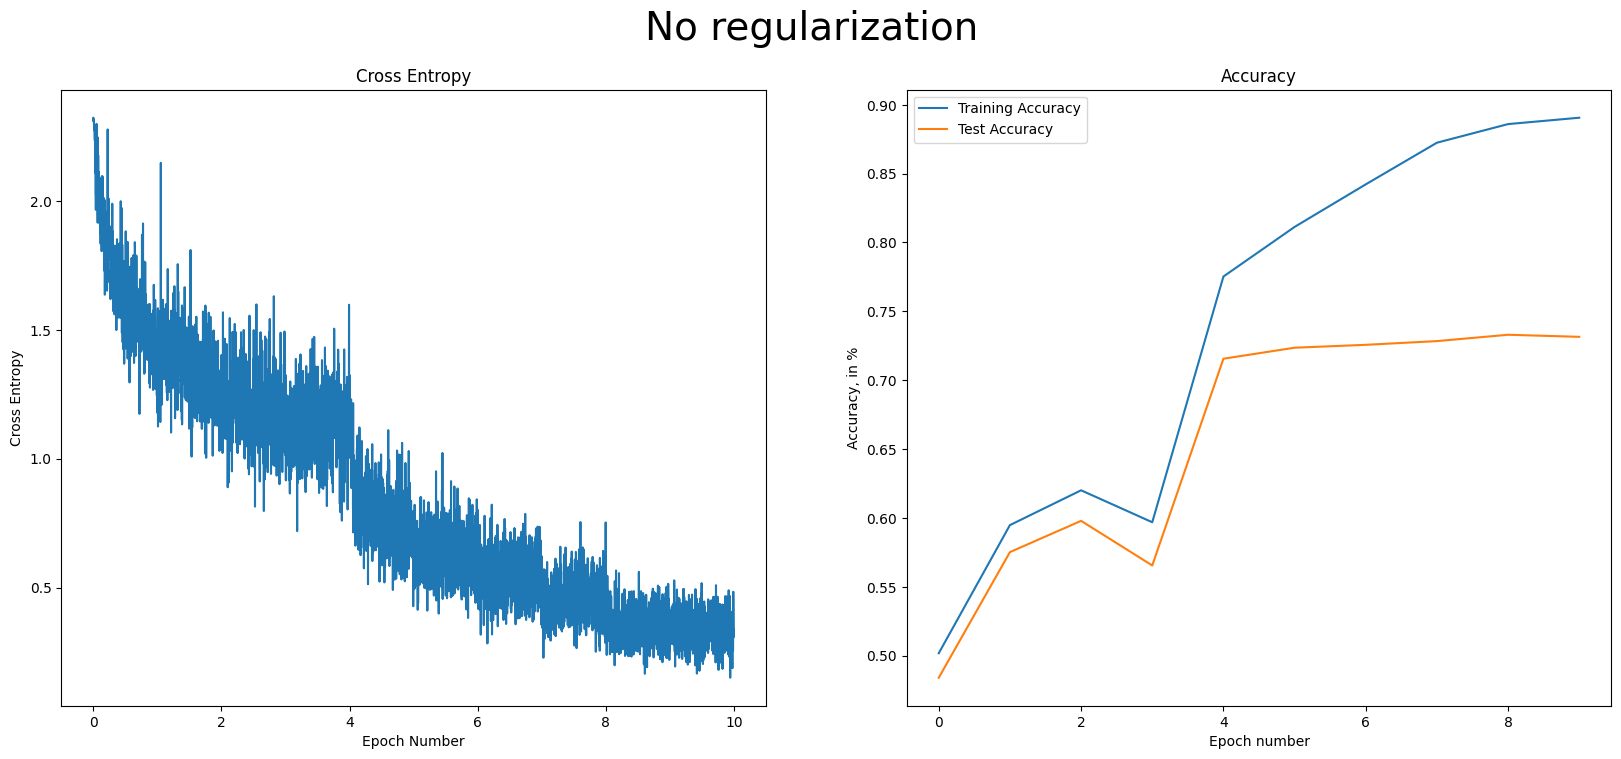

In [5]:
plot_results(models, model_name="model_no_reg", title="No regularization")

#### Plots of Activation Maps

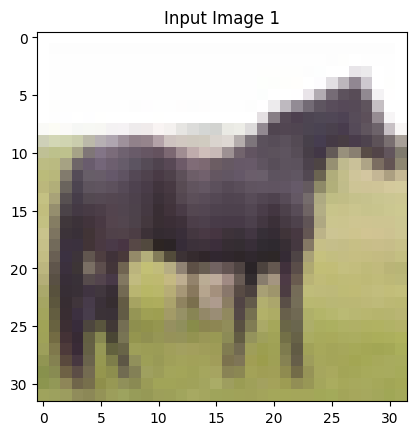

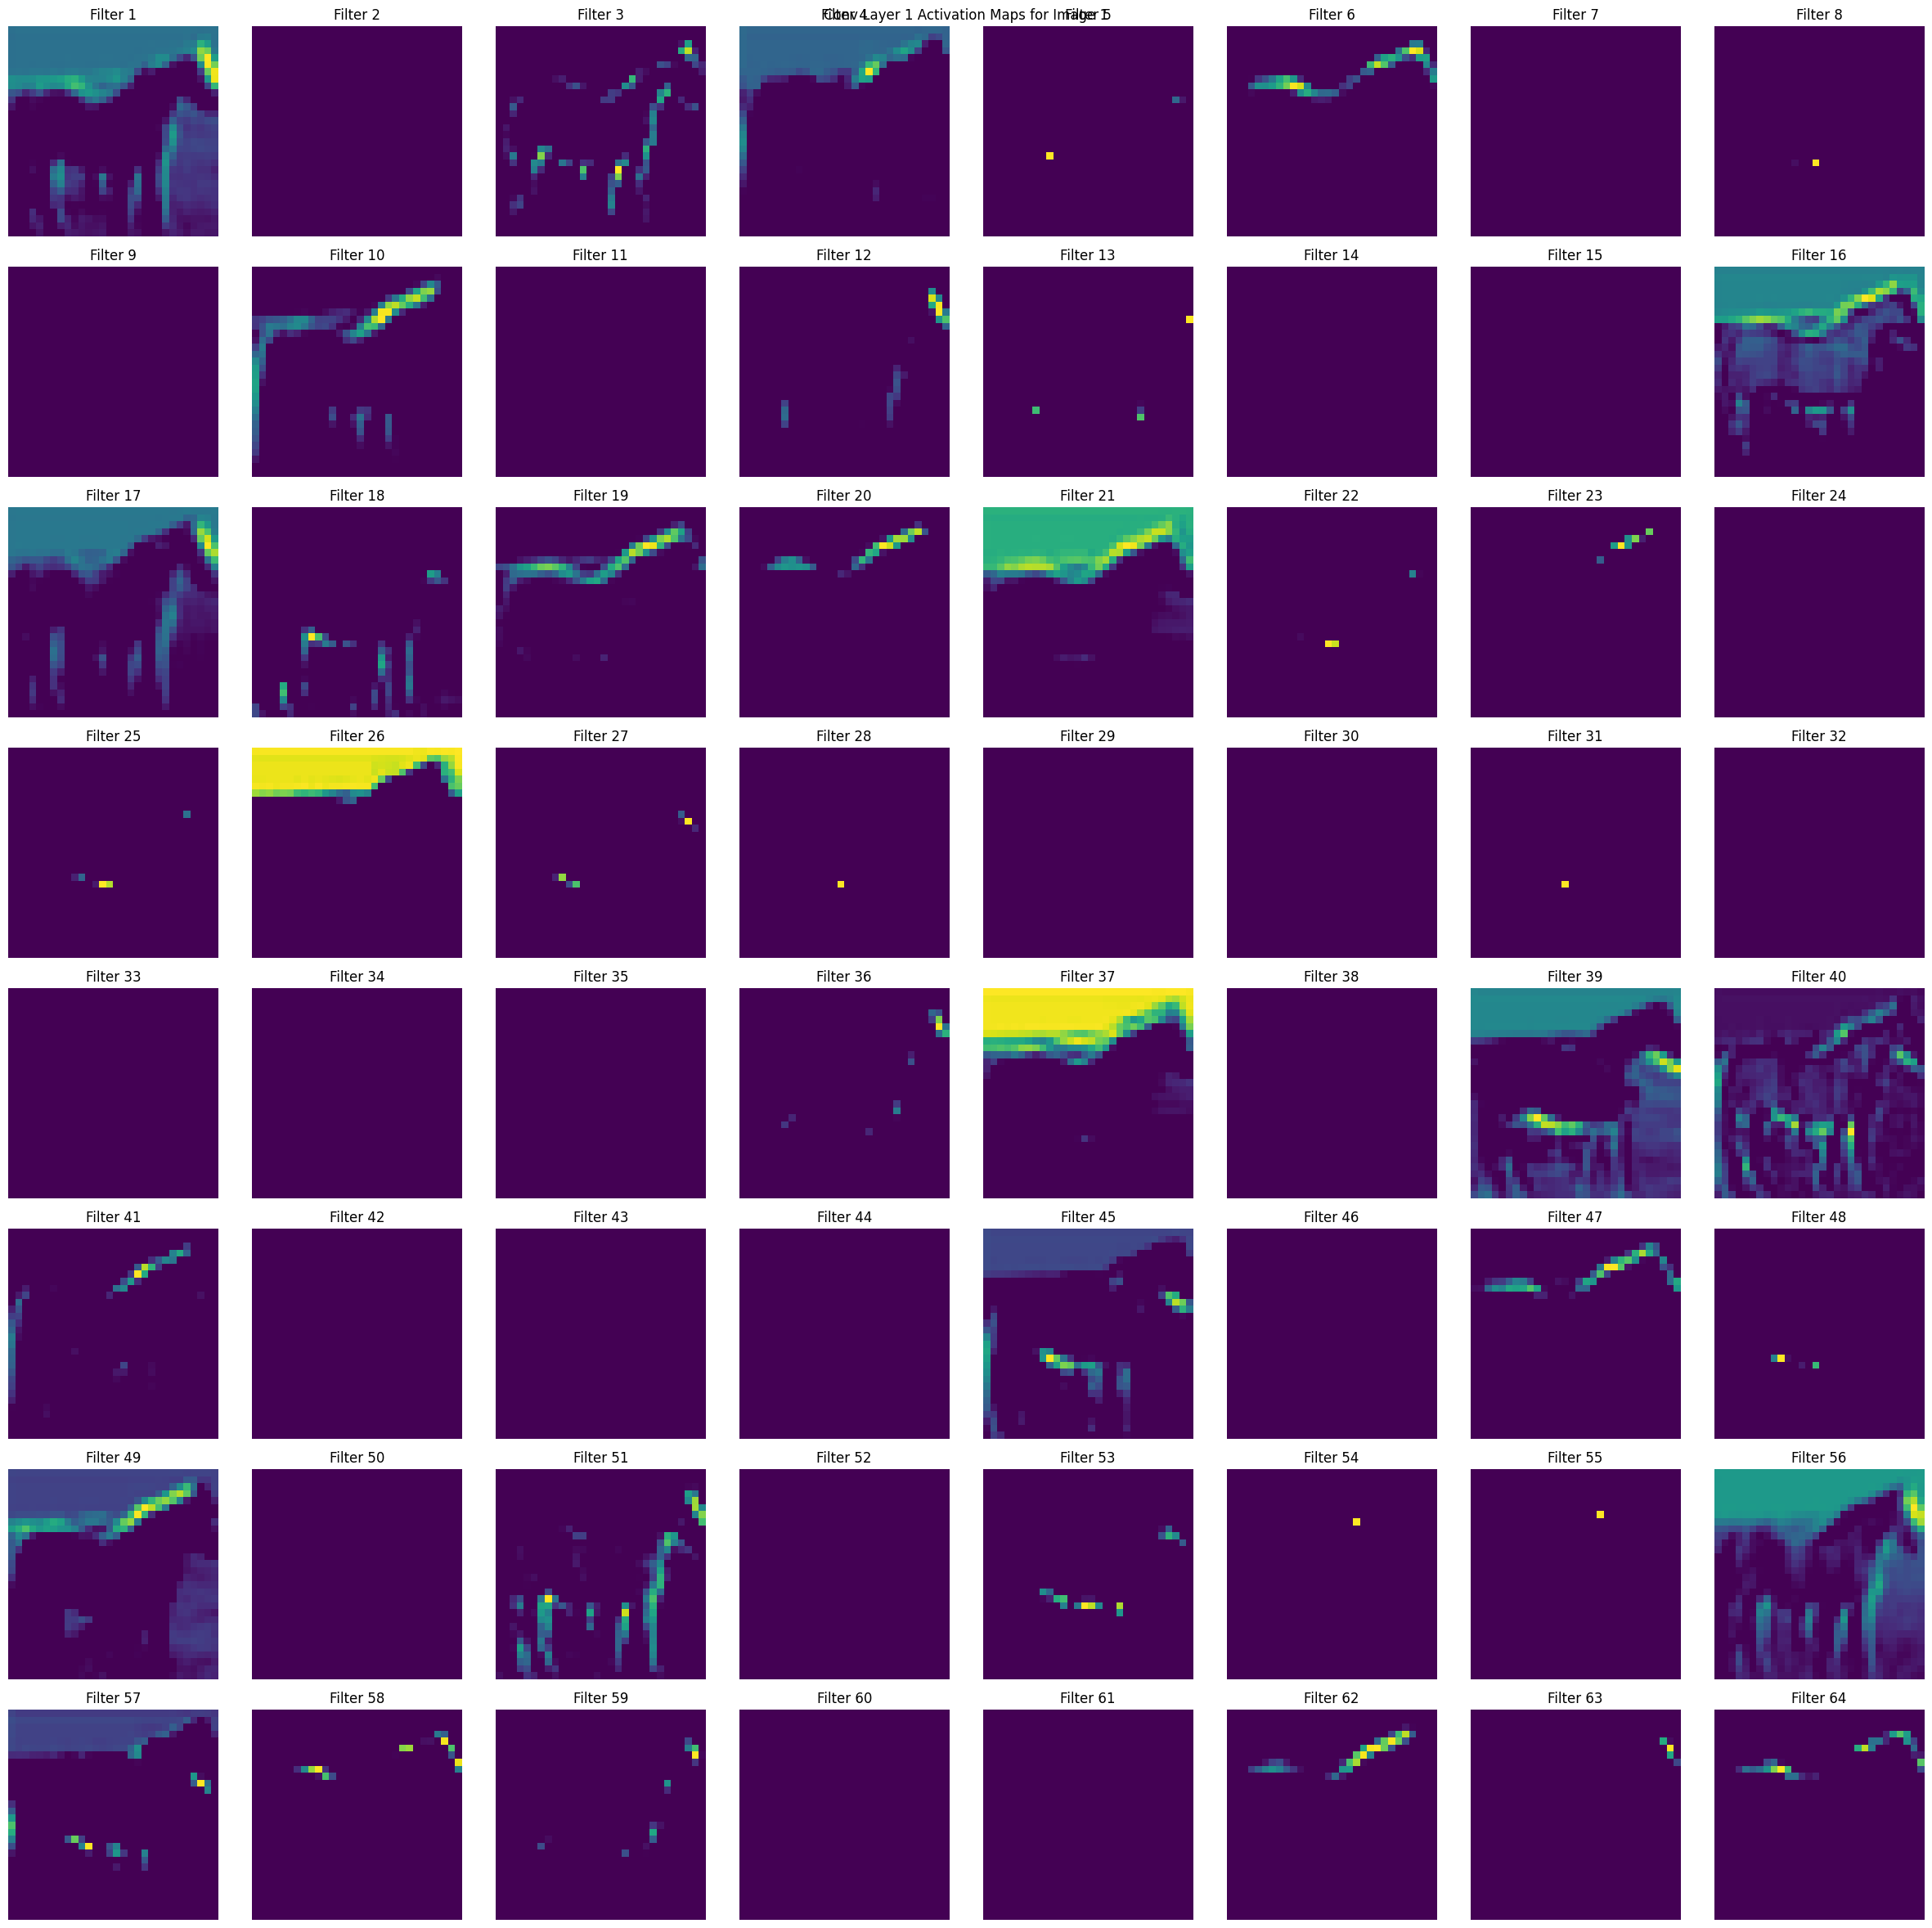

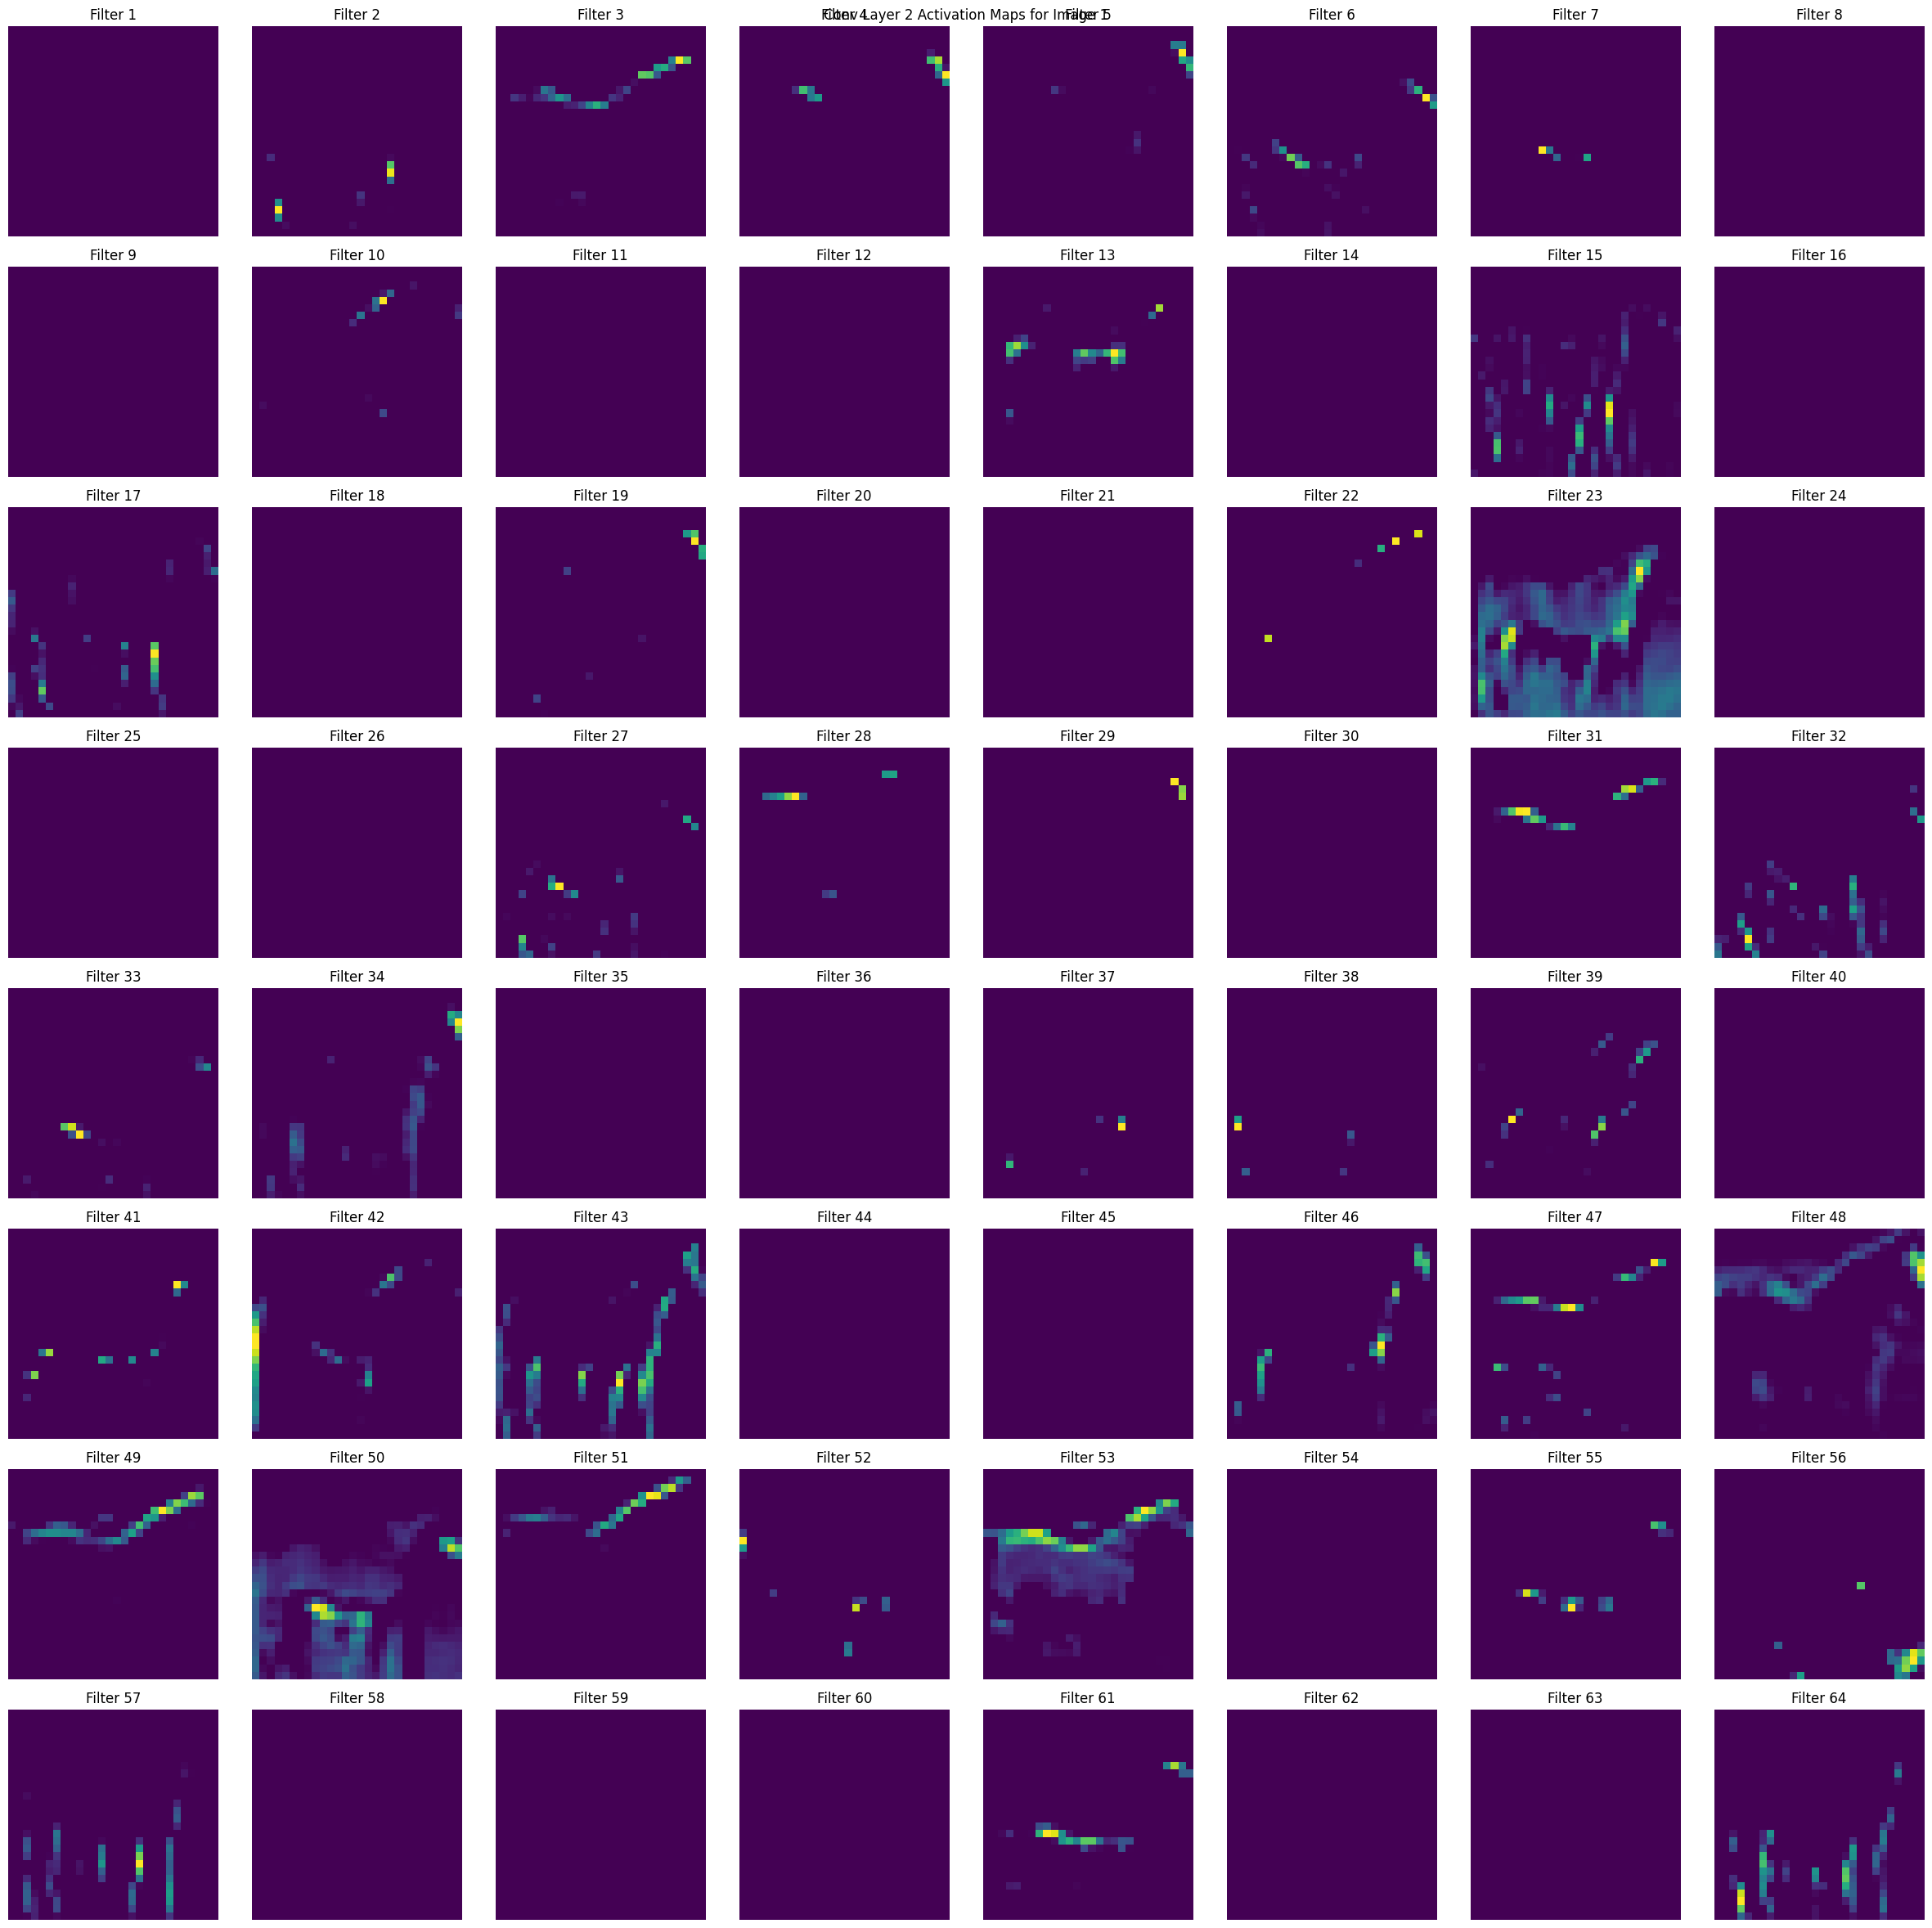

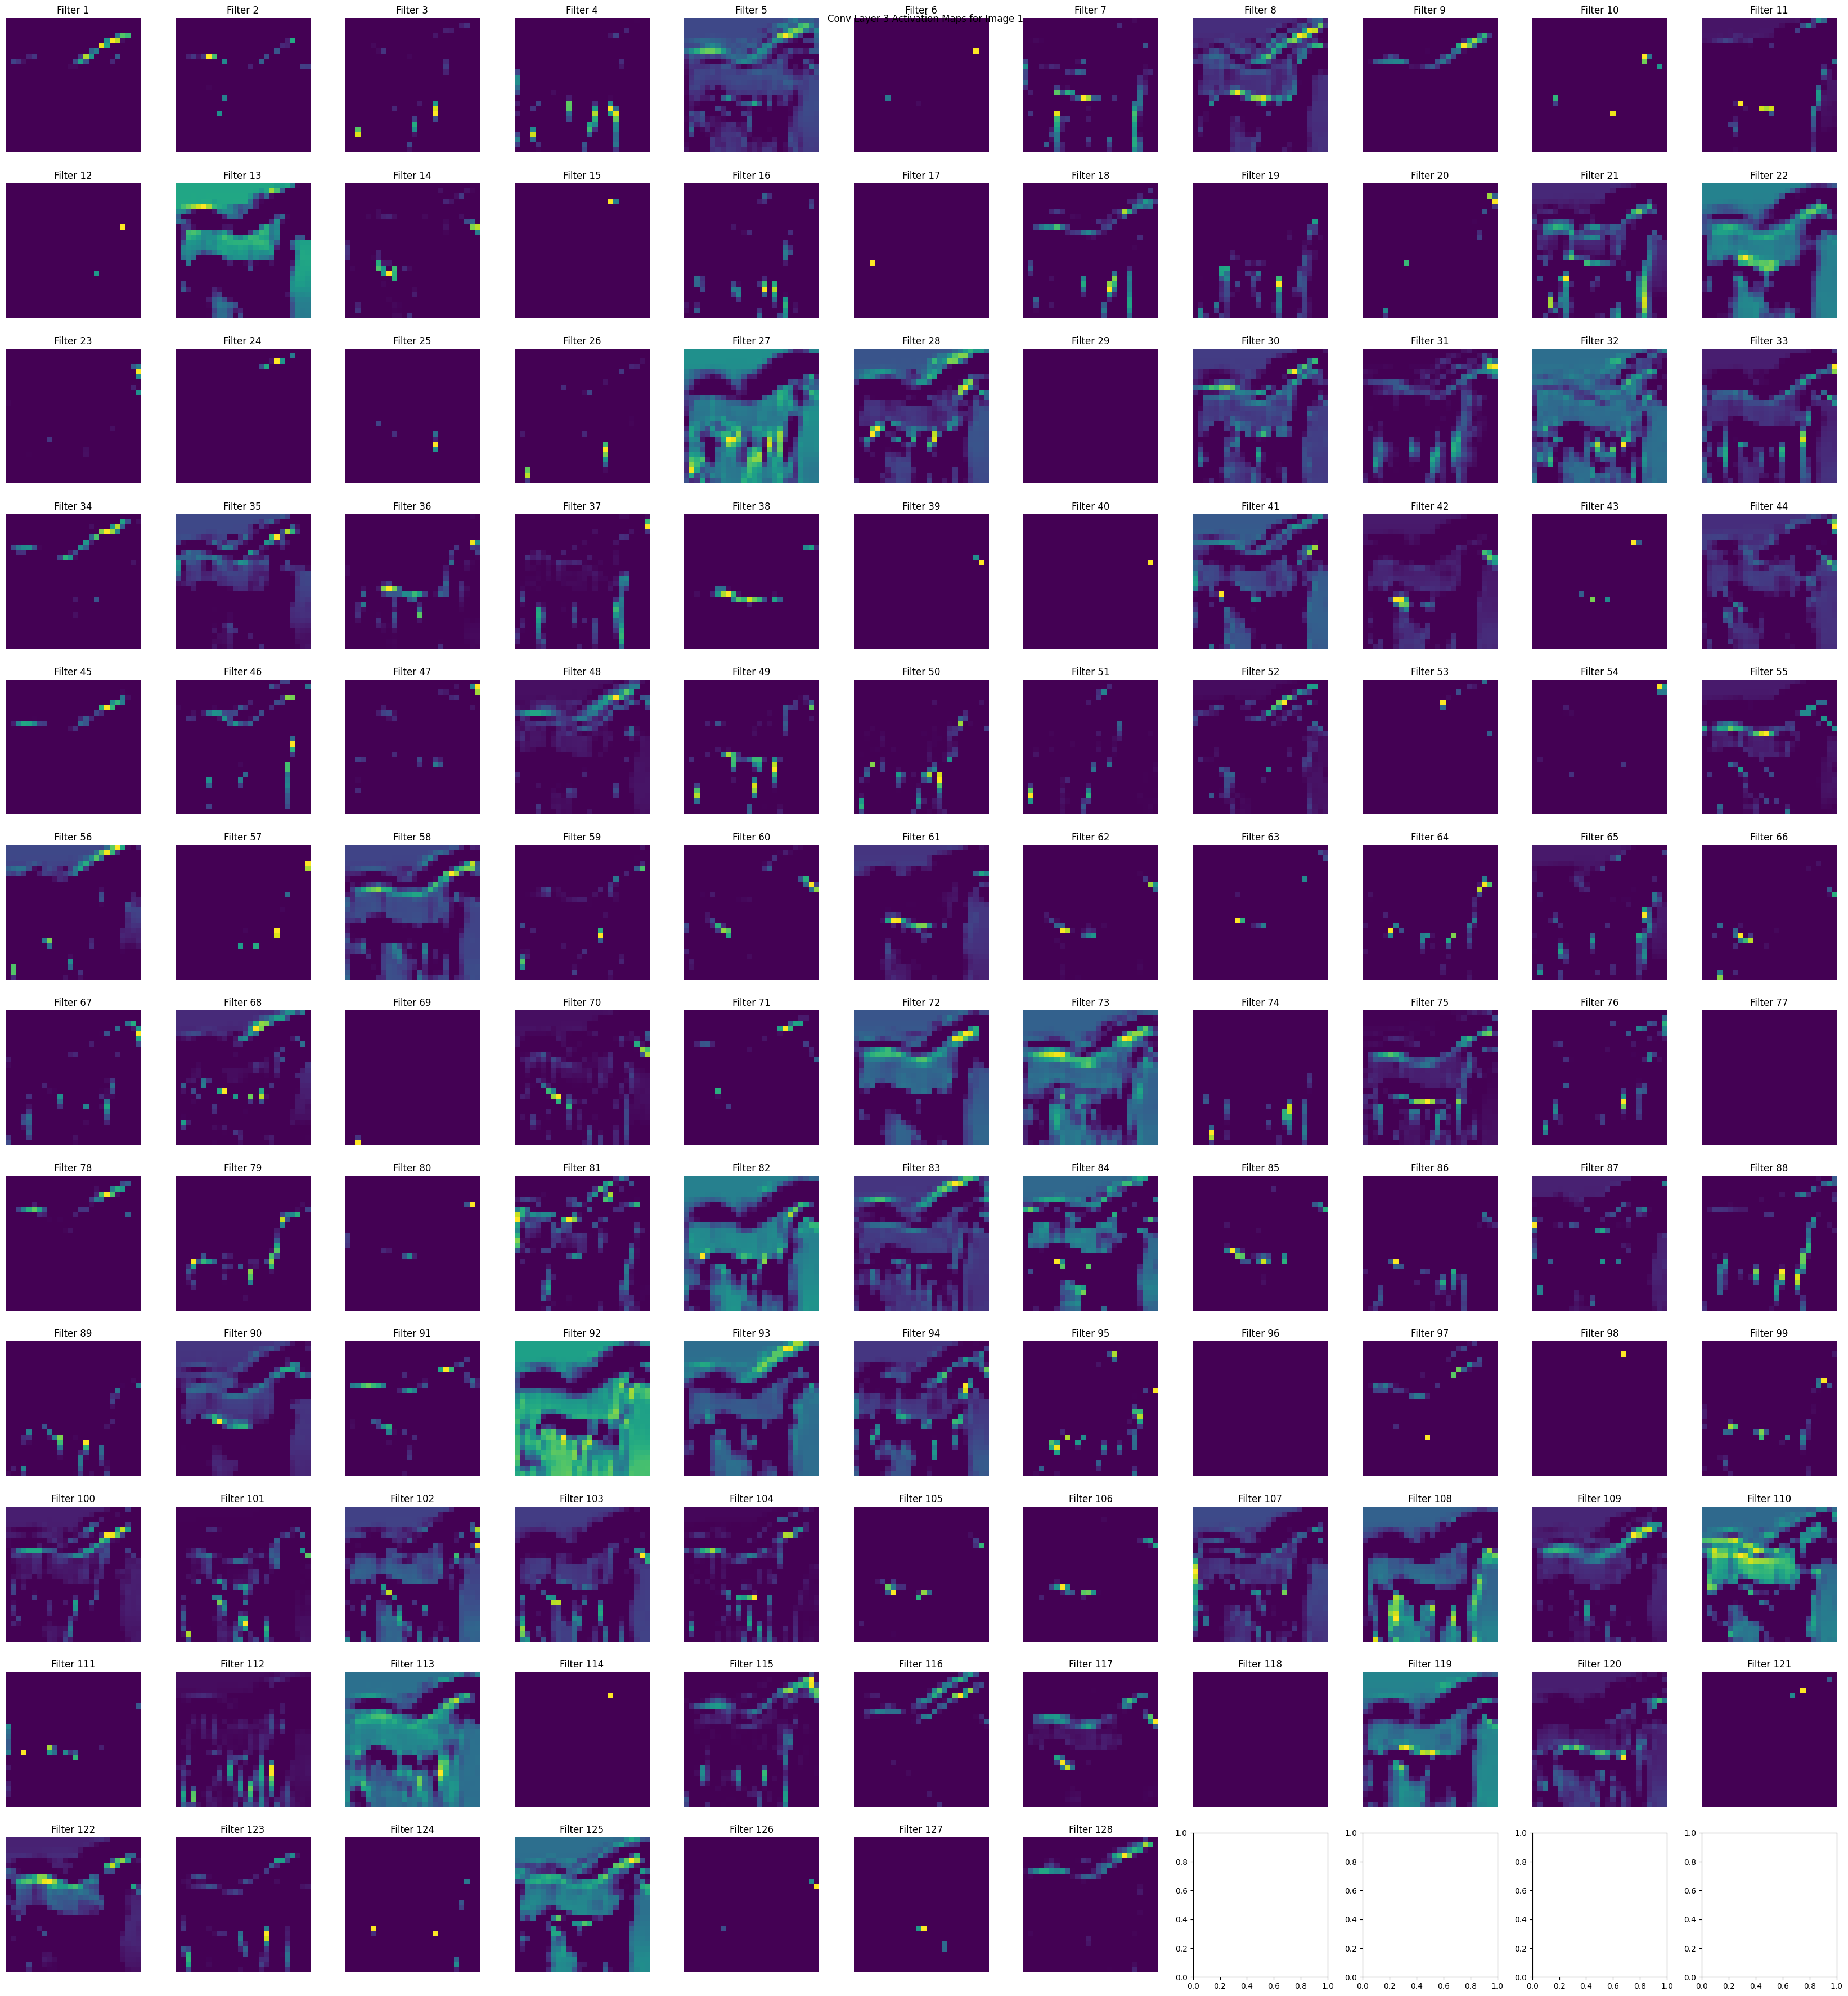

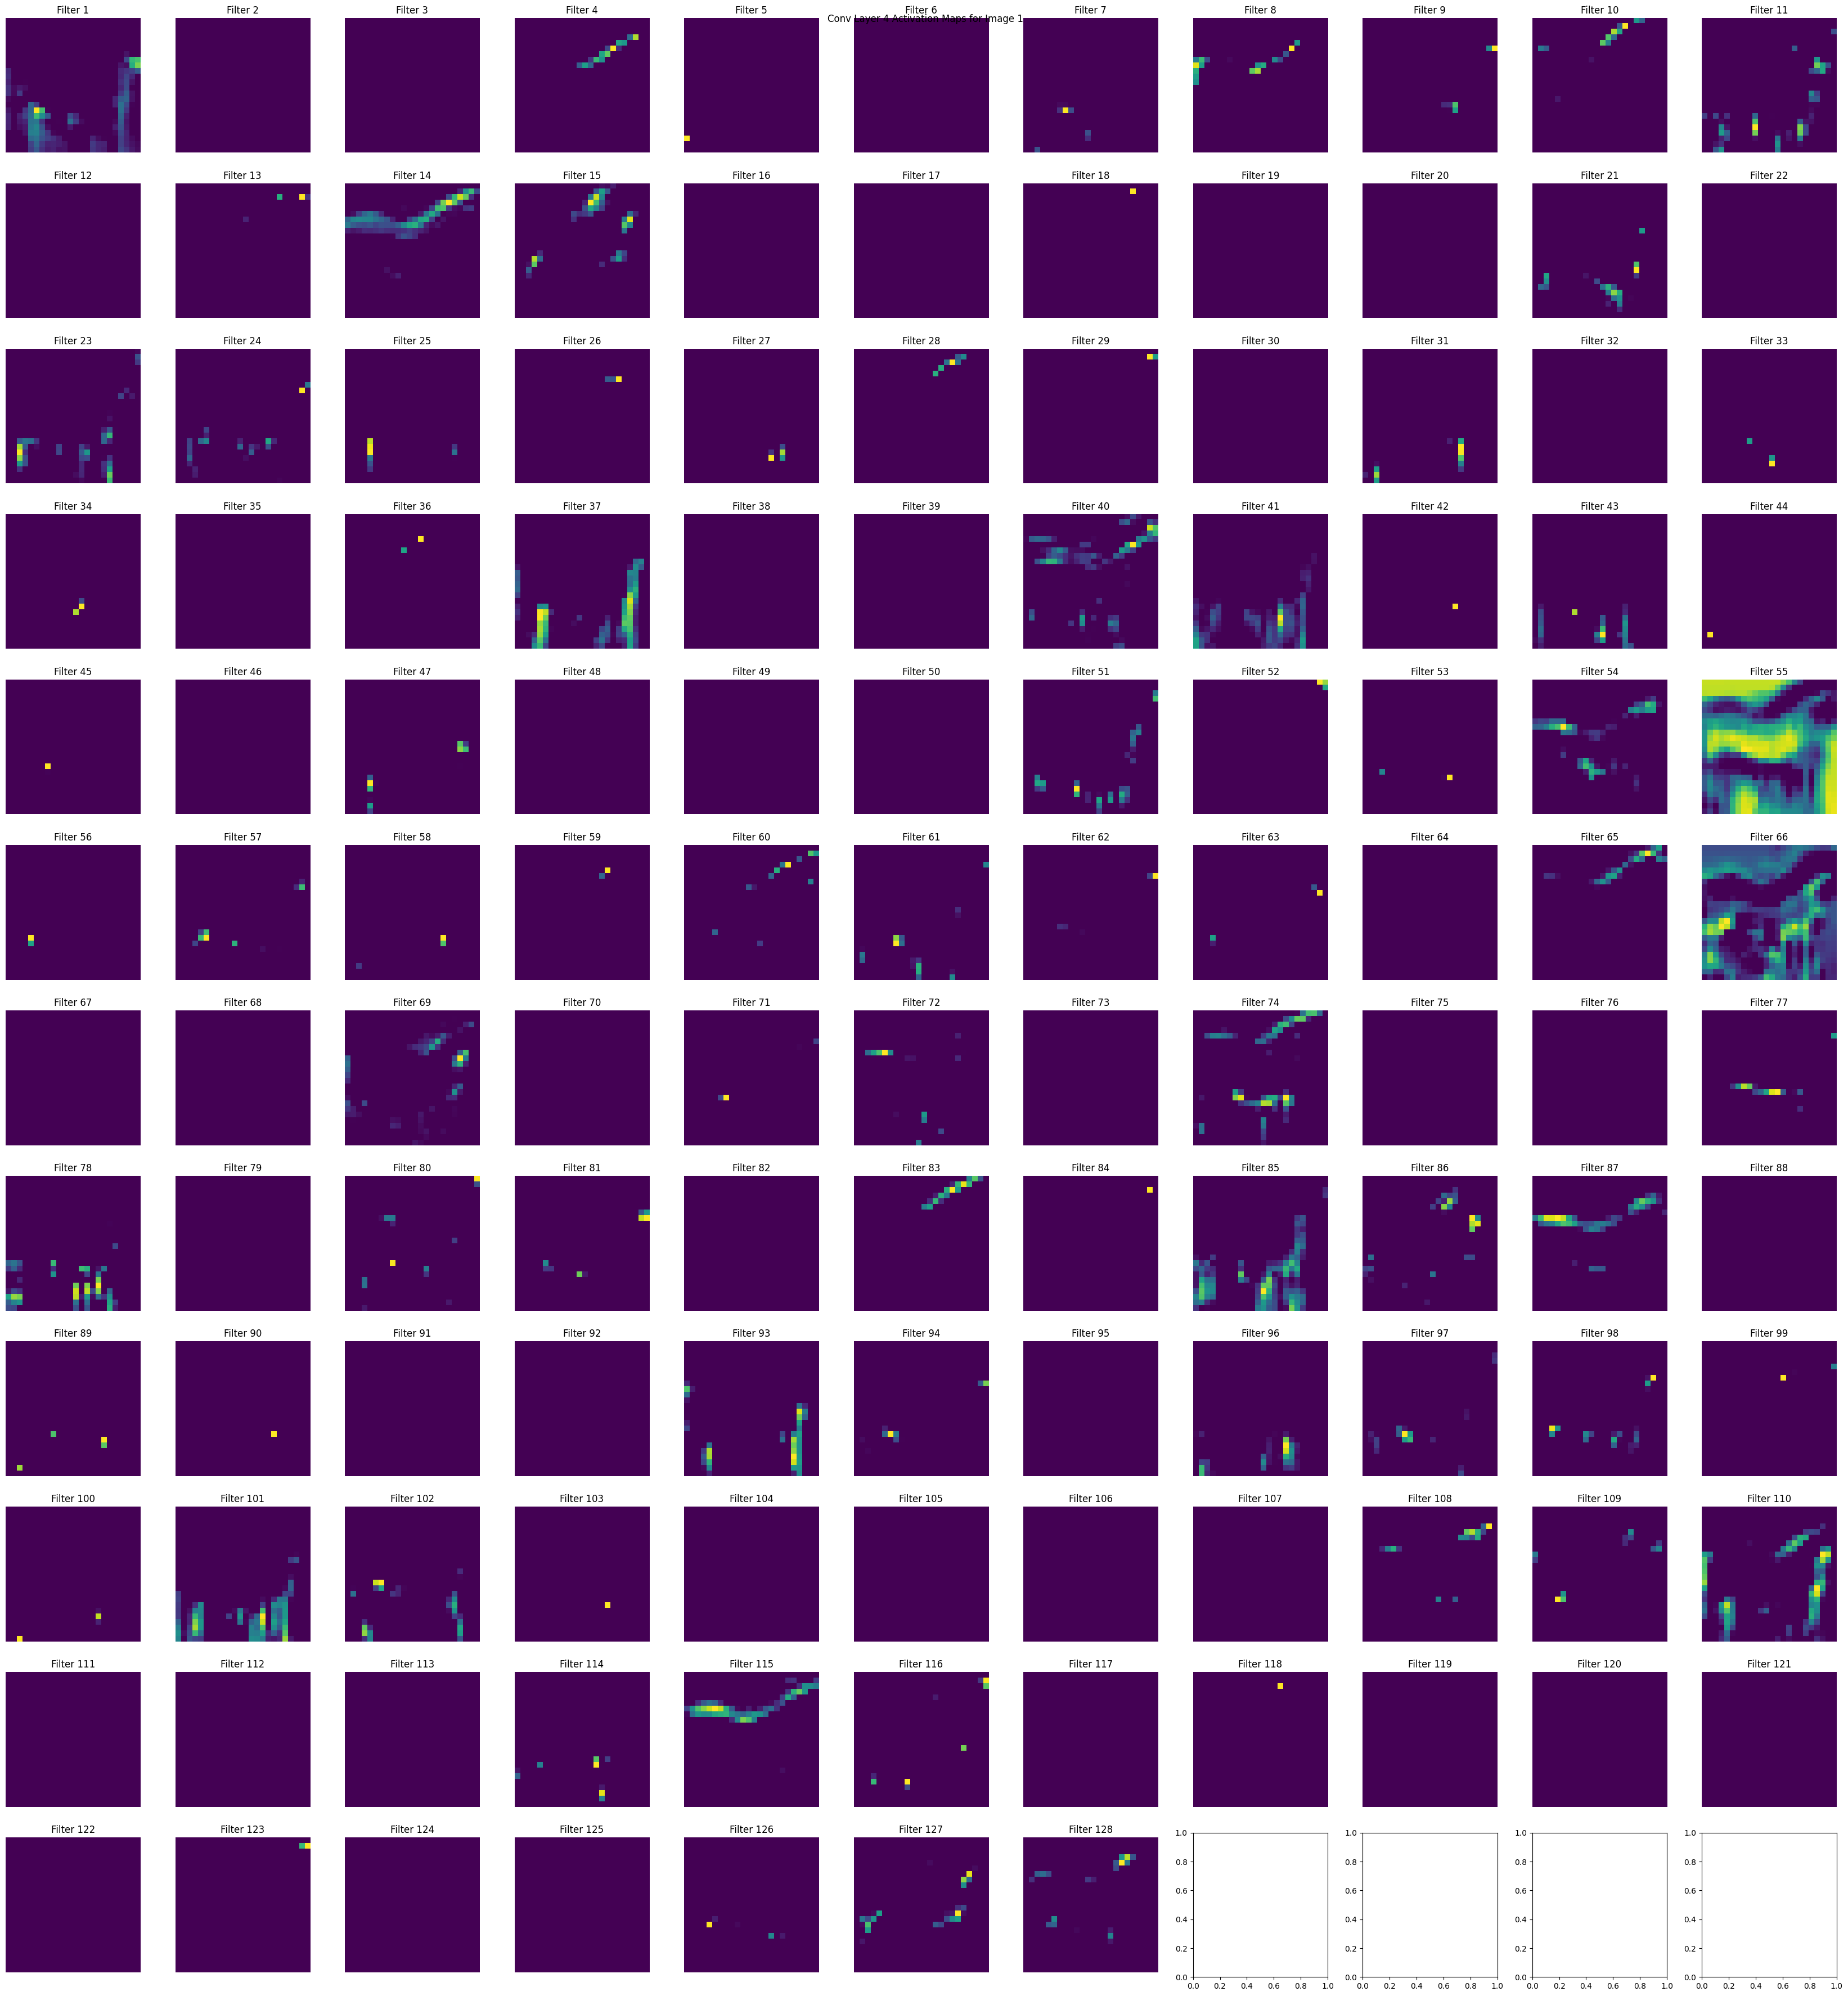

In [6]:
plot_activation_maps(
    models["model_no_reg"].model, train_loader, num_images=1, dataset="cifar10"
)

#### Plot of PCA of Activations

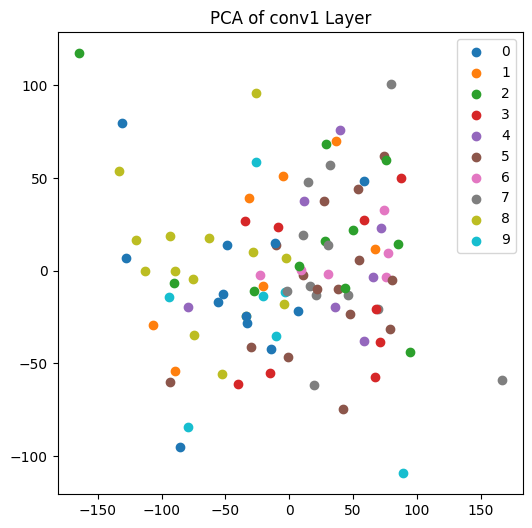

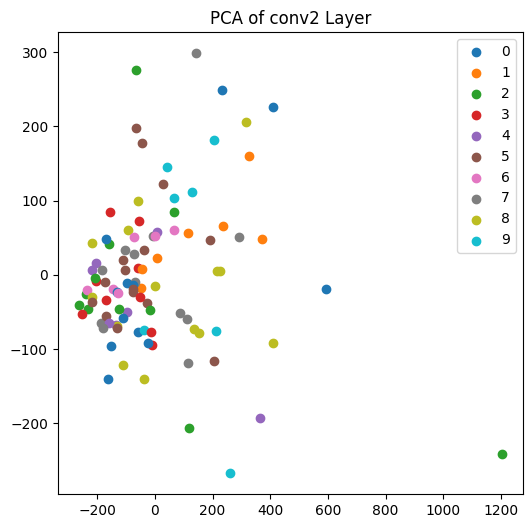

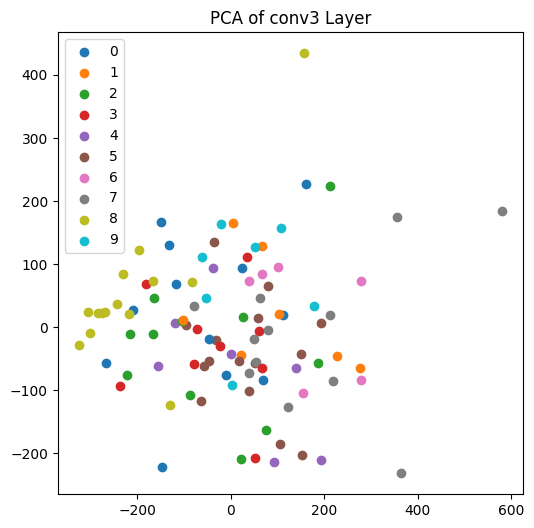

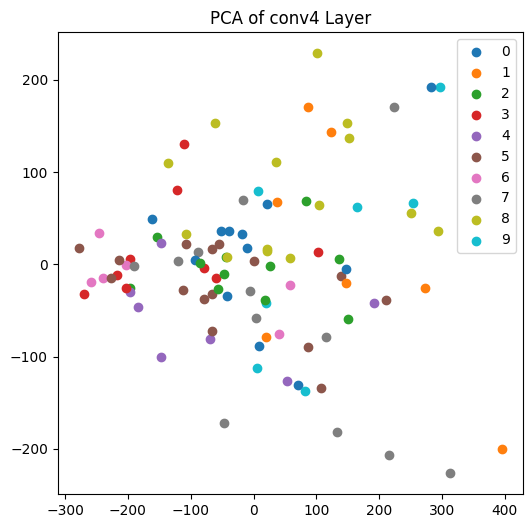

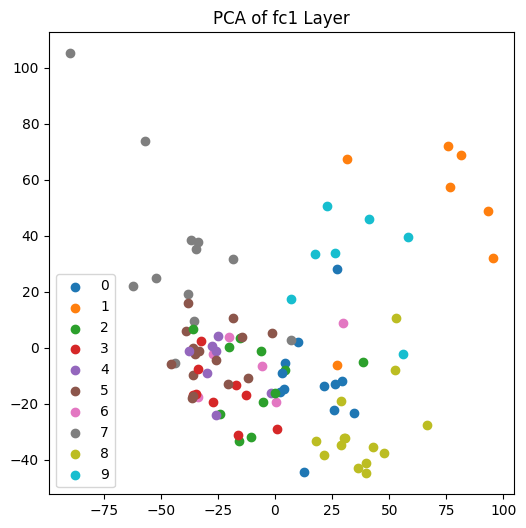

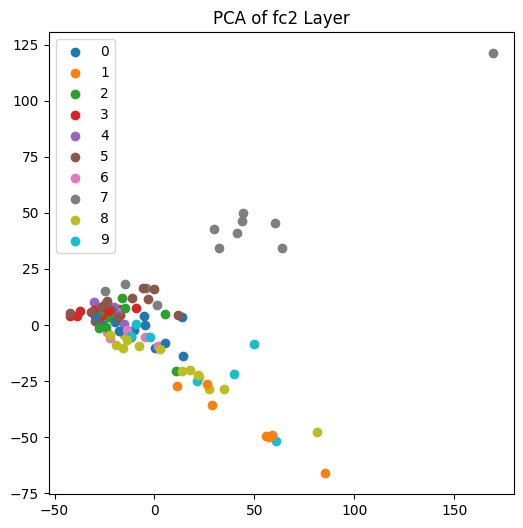

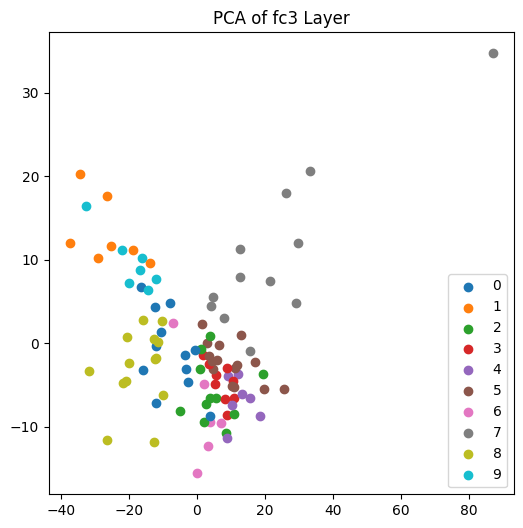

In [7]:
plot_activations_pca(models["model_no_reg"].model, train_loader, device)

#### Plot of t-SNE of Activations

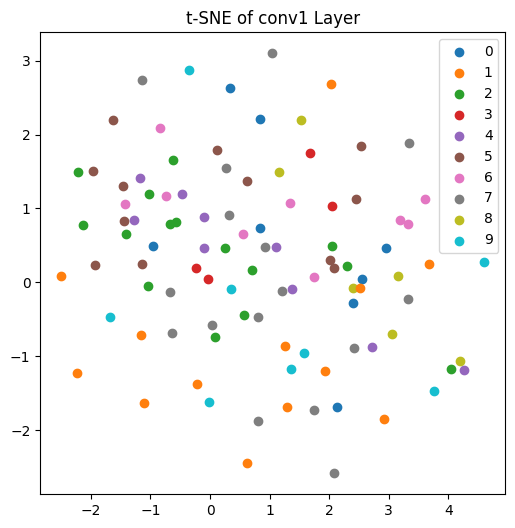

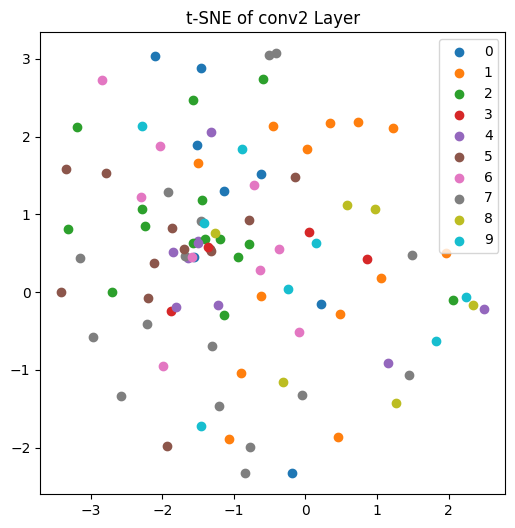

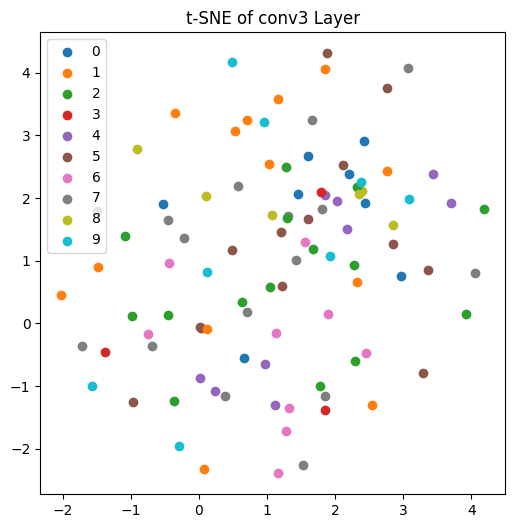

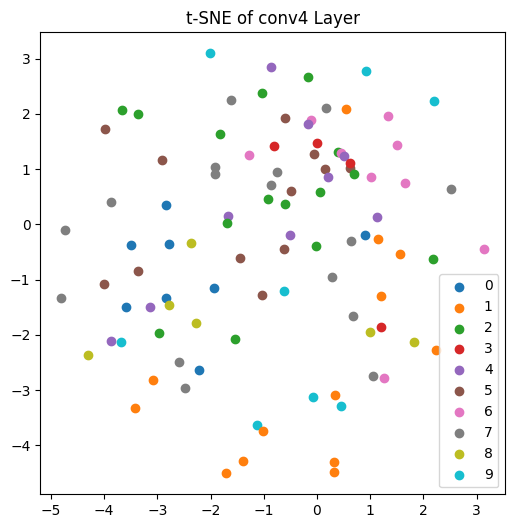

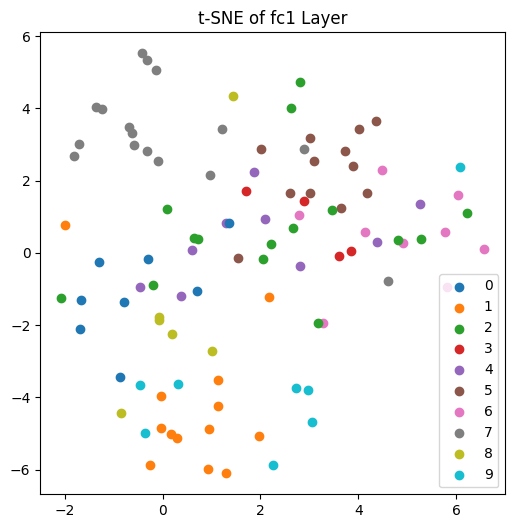

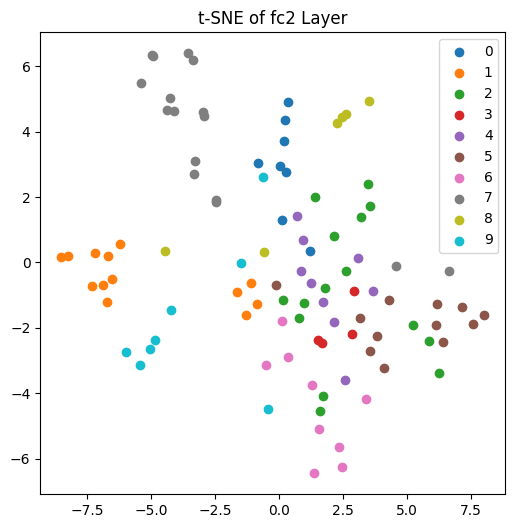

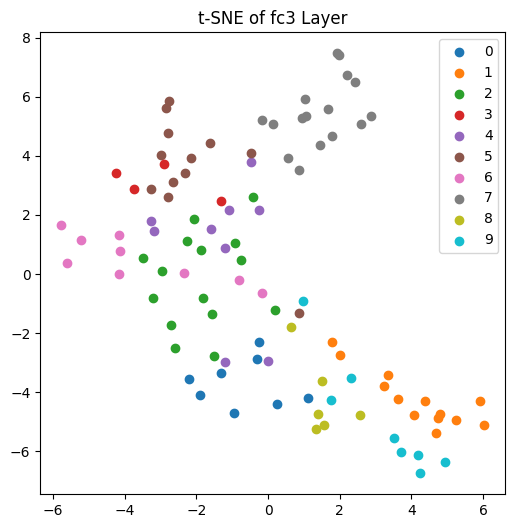

In [8]:
plot_activations_tsne(models["model_no_reg"].model, train_loader, device)

#### Plots of Saliency Maps

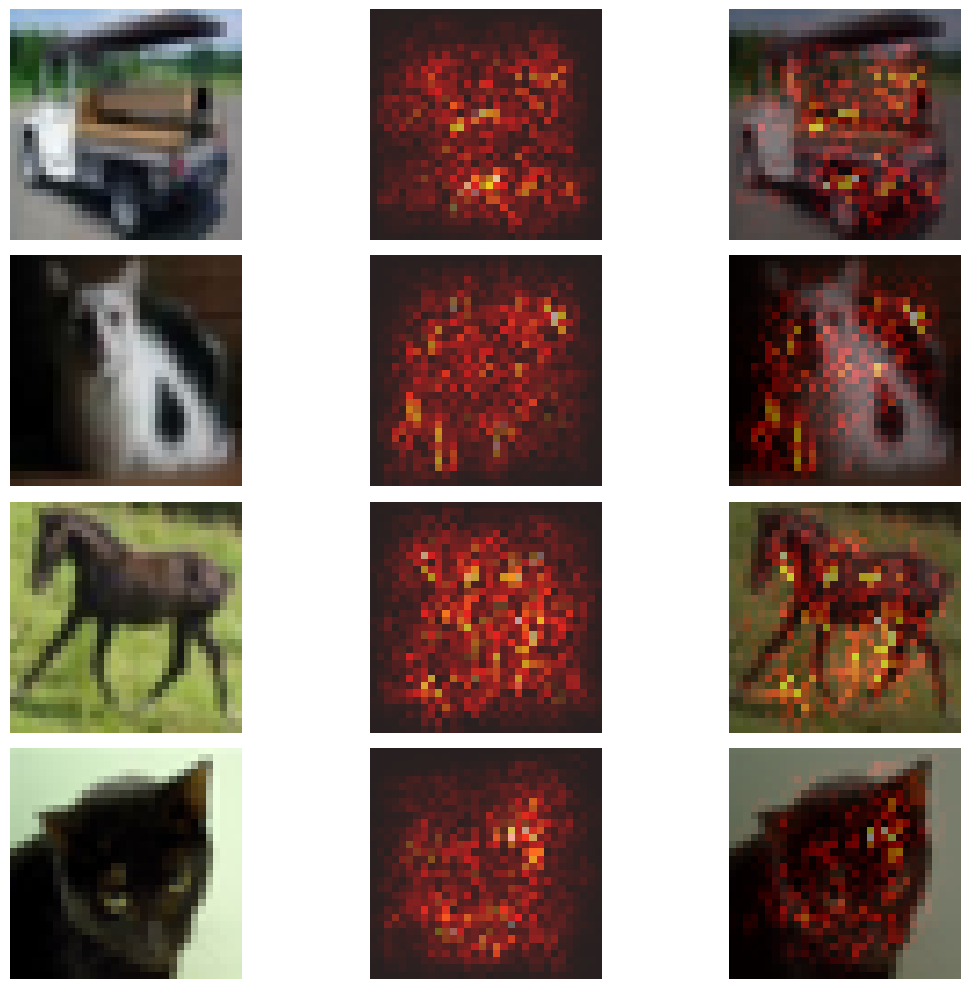

In [9]:
plot_saliency_maps(
    models["model_no_reg"].model, train_loader, num_images=12, dataset="cifar10"
)

#### Plots of Occlusion Sensitivity

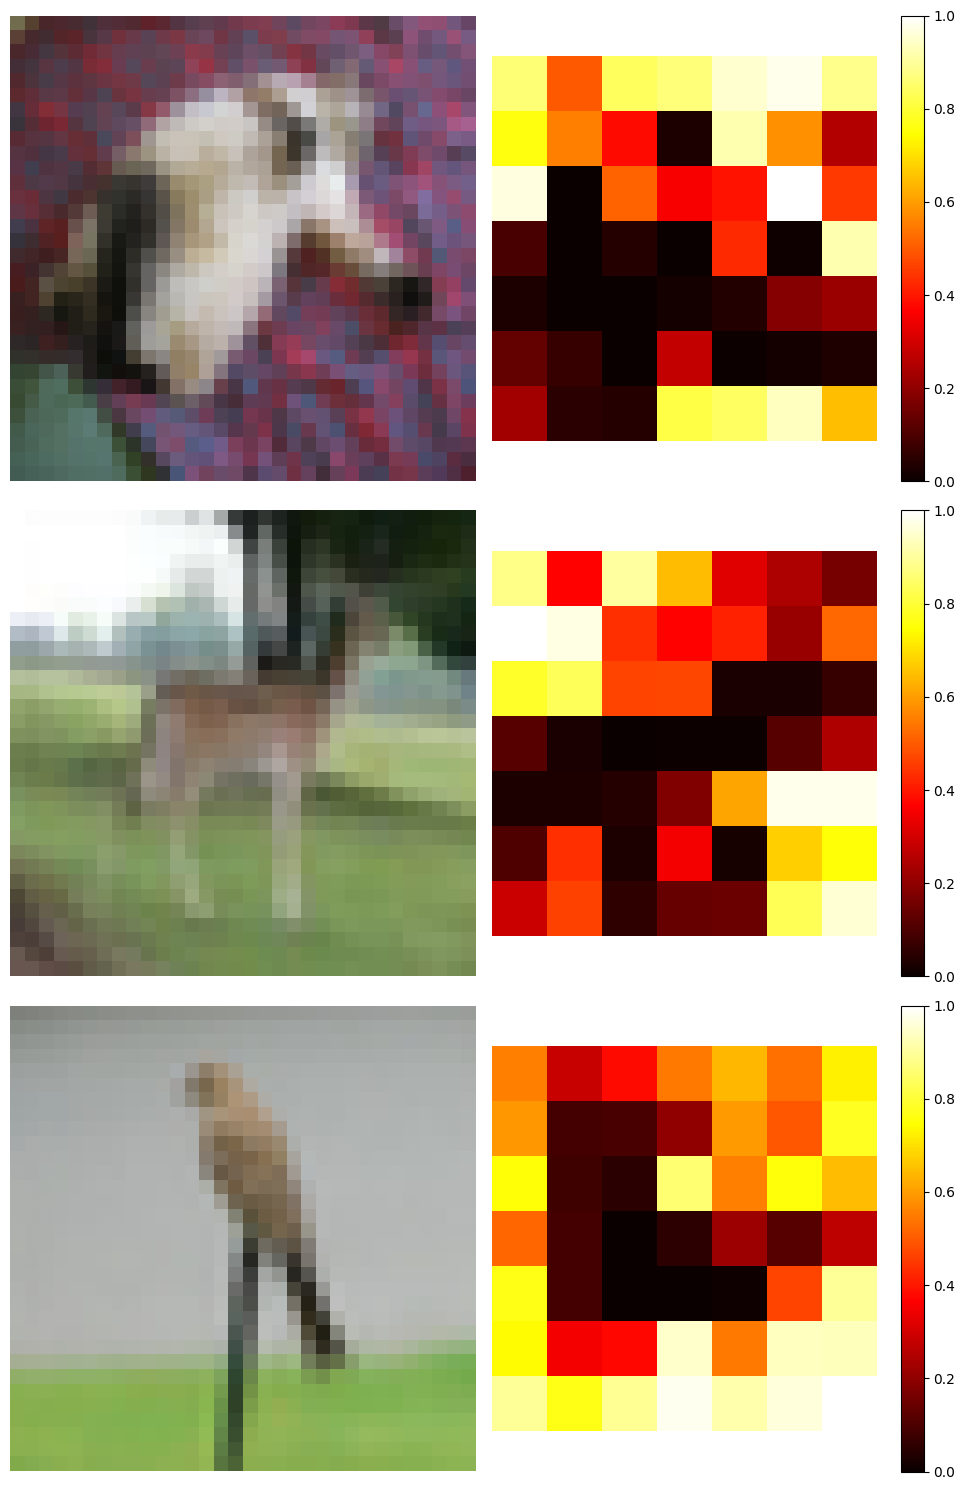

In [10]:
plot_occlusion_sensitivity(
    models["model_no_reg"].model,
    train_loader,
    num_images=3,
    occluder_size=8,
    stride=4,
    dataset="cifar10",
)

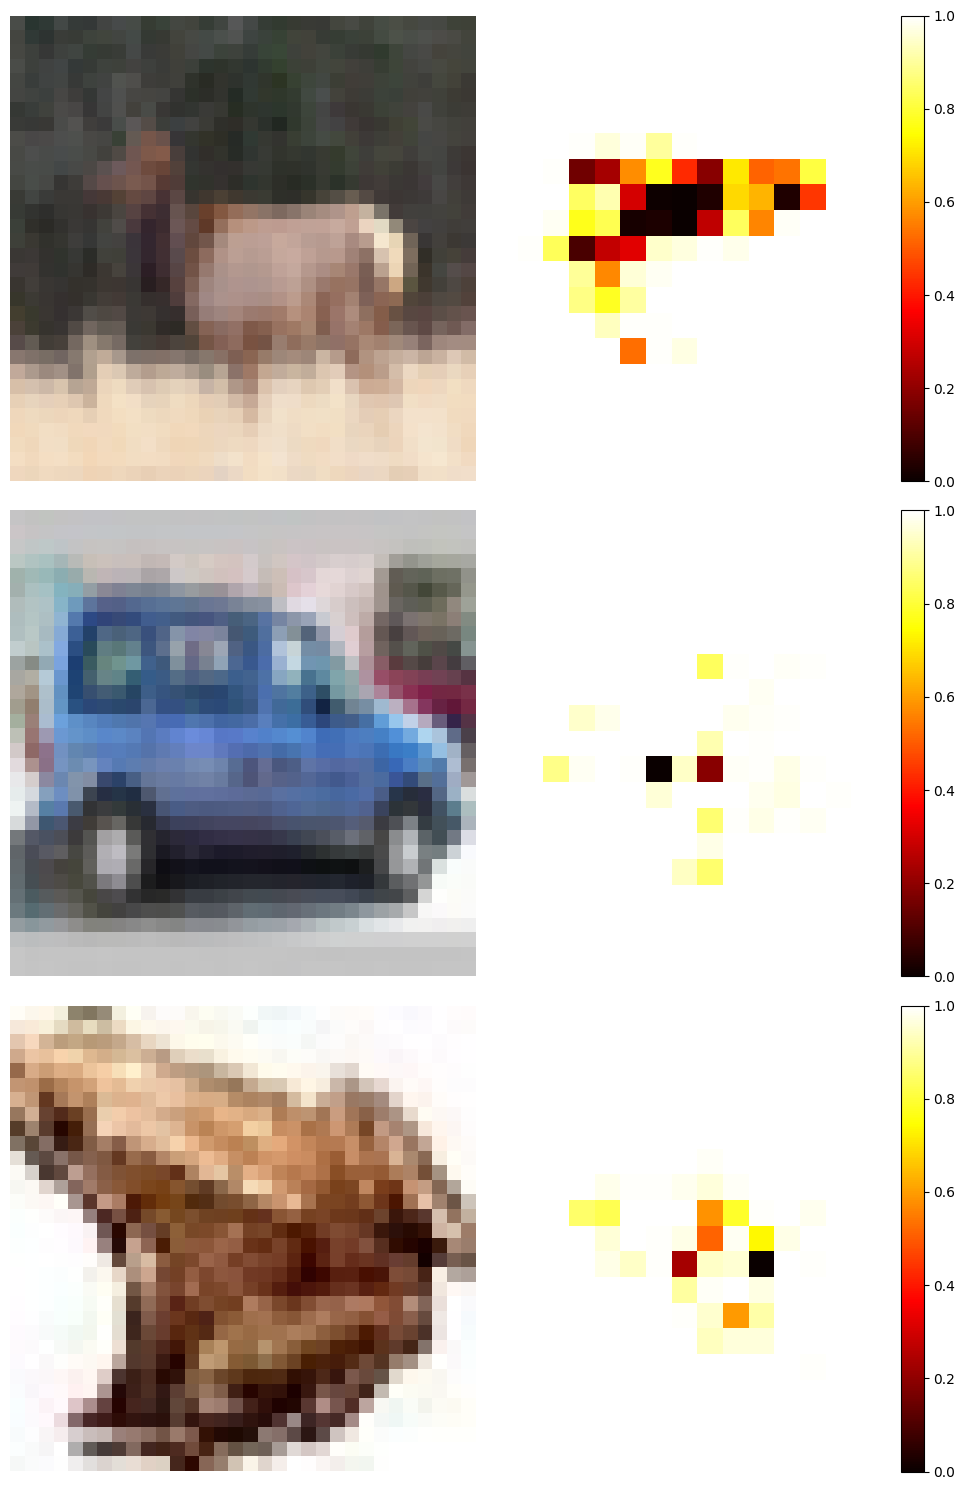

In [11]:
plot_occlusion_sensitivity(
    models["model_no_reg"].model,
    train_loader,
    num_images=3,
    occluder_size=4,
    stride=2,
    dataset="cifar10",
)

### L1 Regularization

#### Plot of Losses and Accuracies

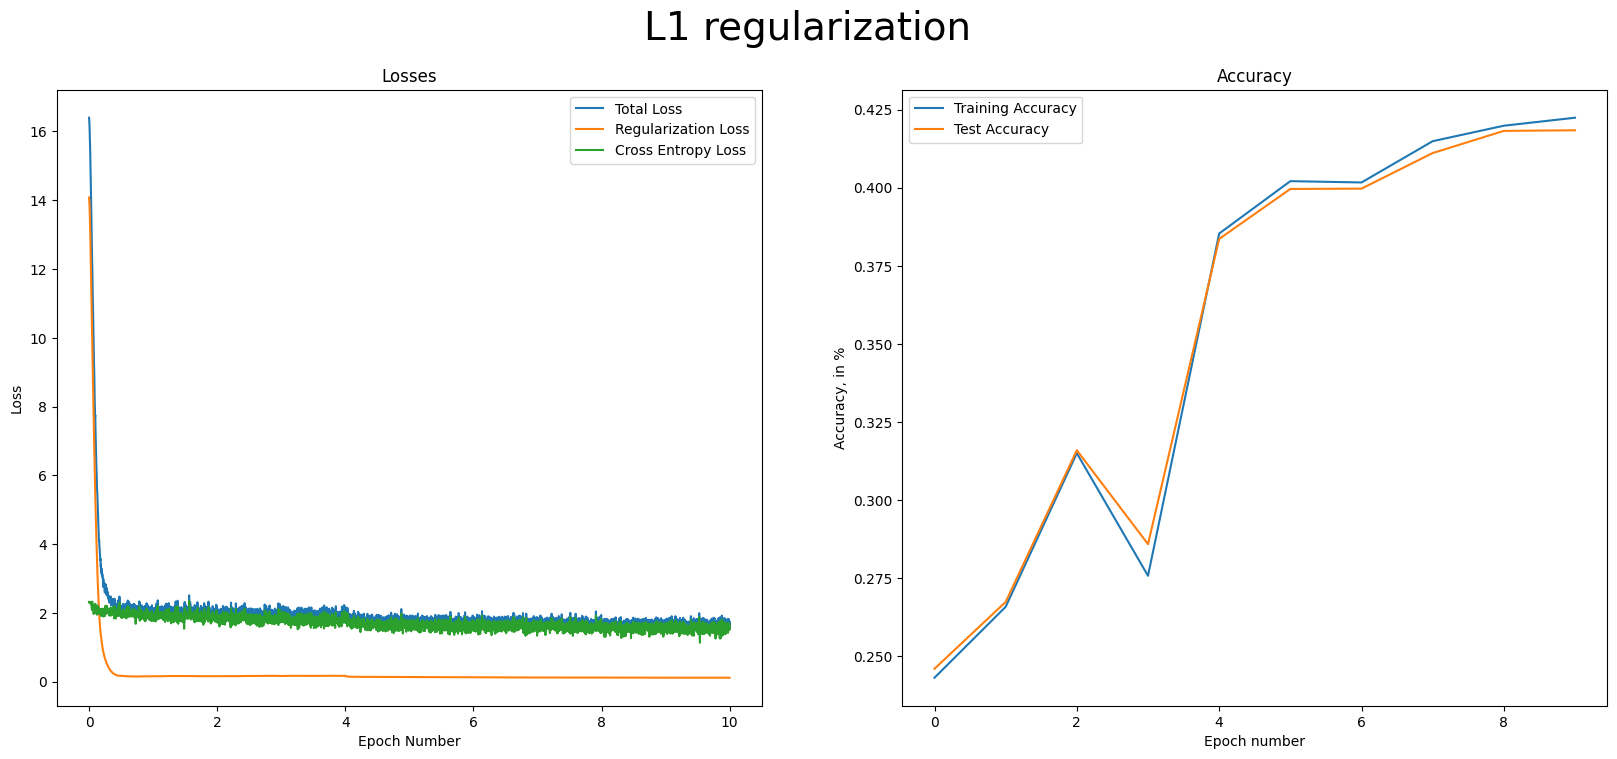

In [14]:
plot_reg_results(models, model_name="model_l1", title="L1 regularization")

#### Plot of Weight Distributions

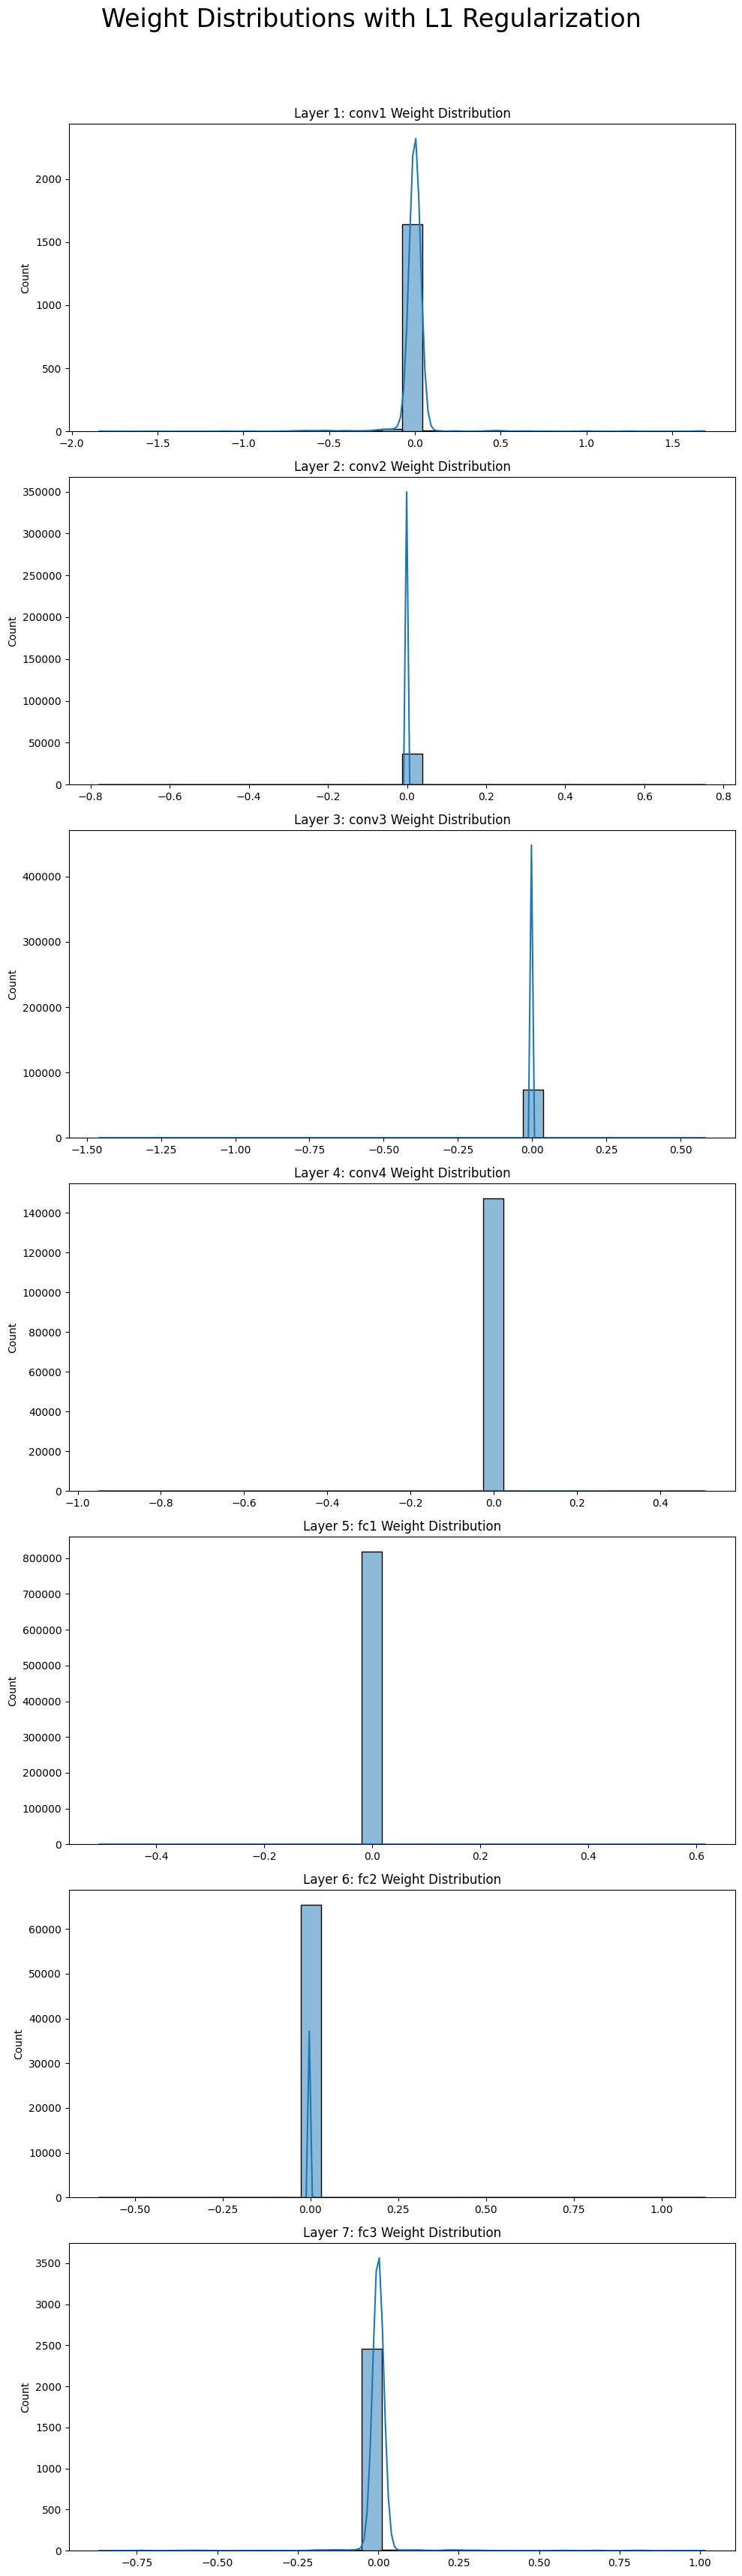

In [15]:
plot_weight_distributions(
    models["model_l1"].model, title="Weight Distributions with L1 Regularization"
)

#### Plots of Activation Maps

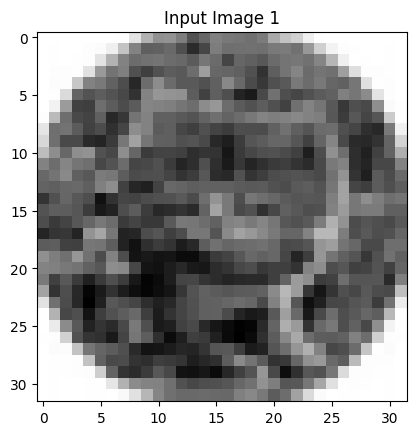

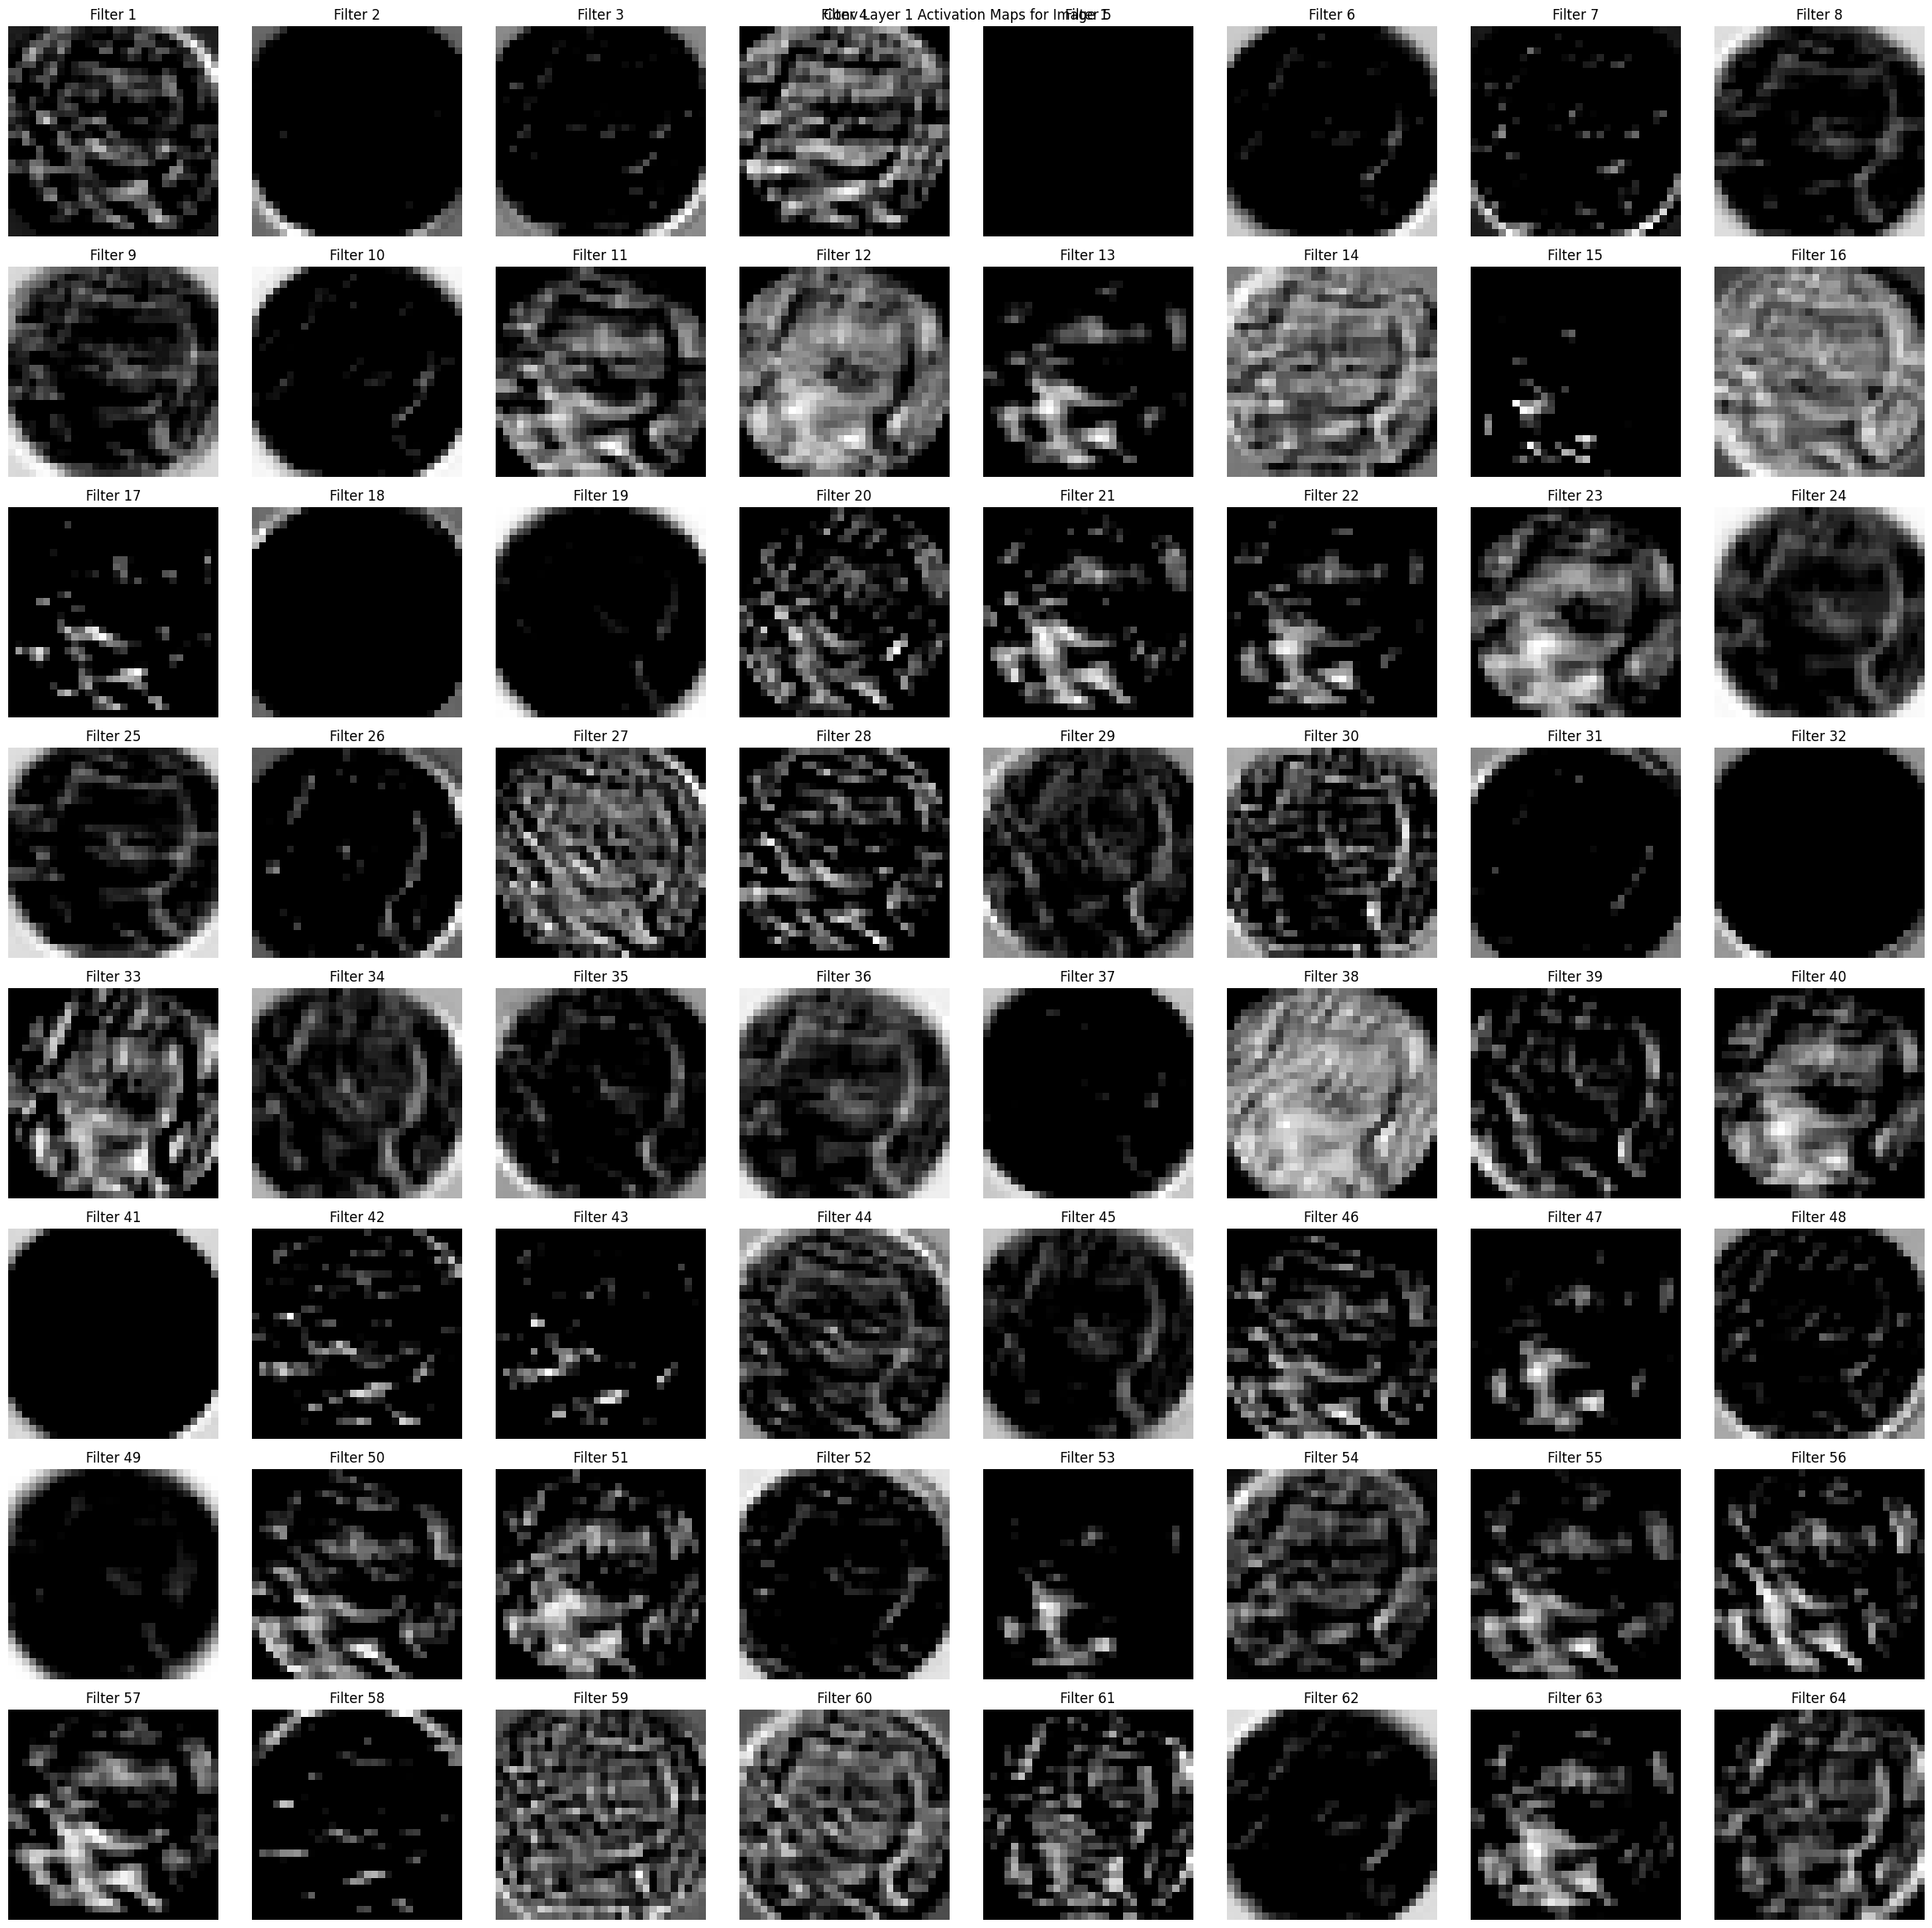

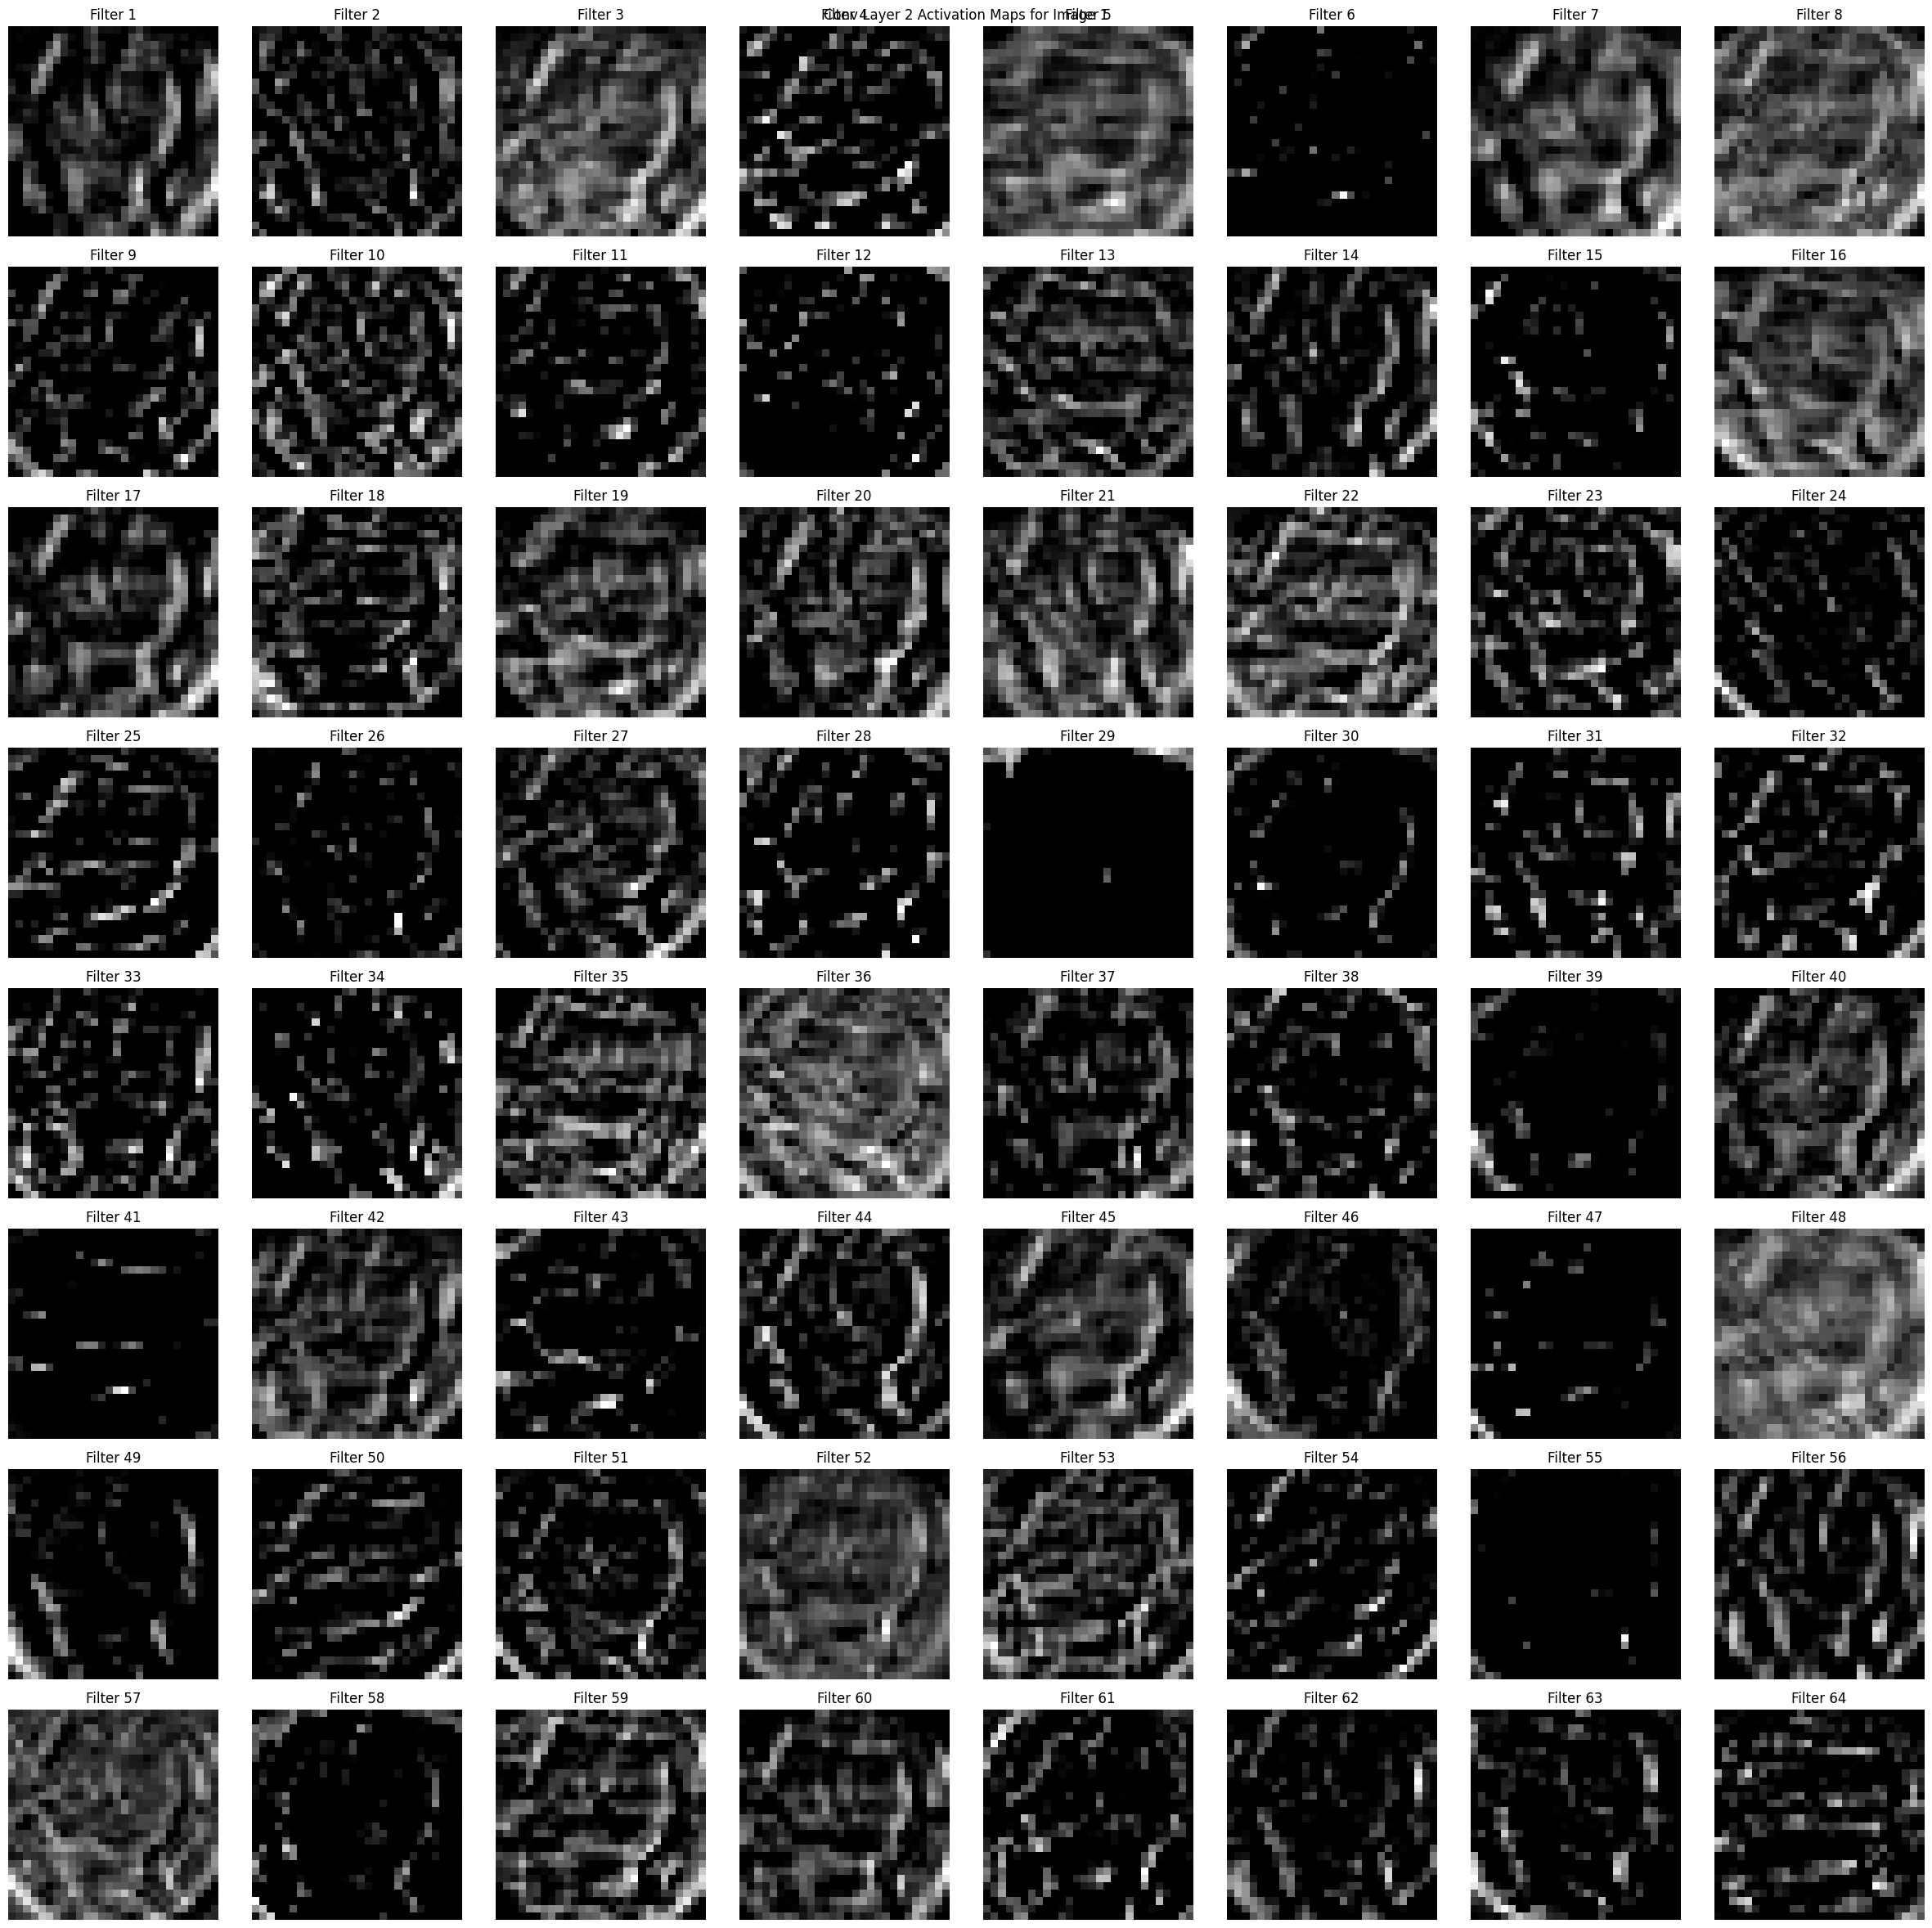

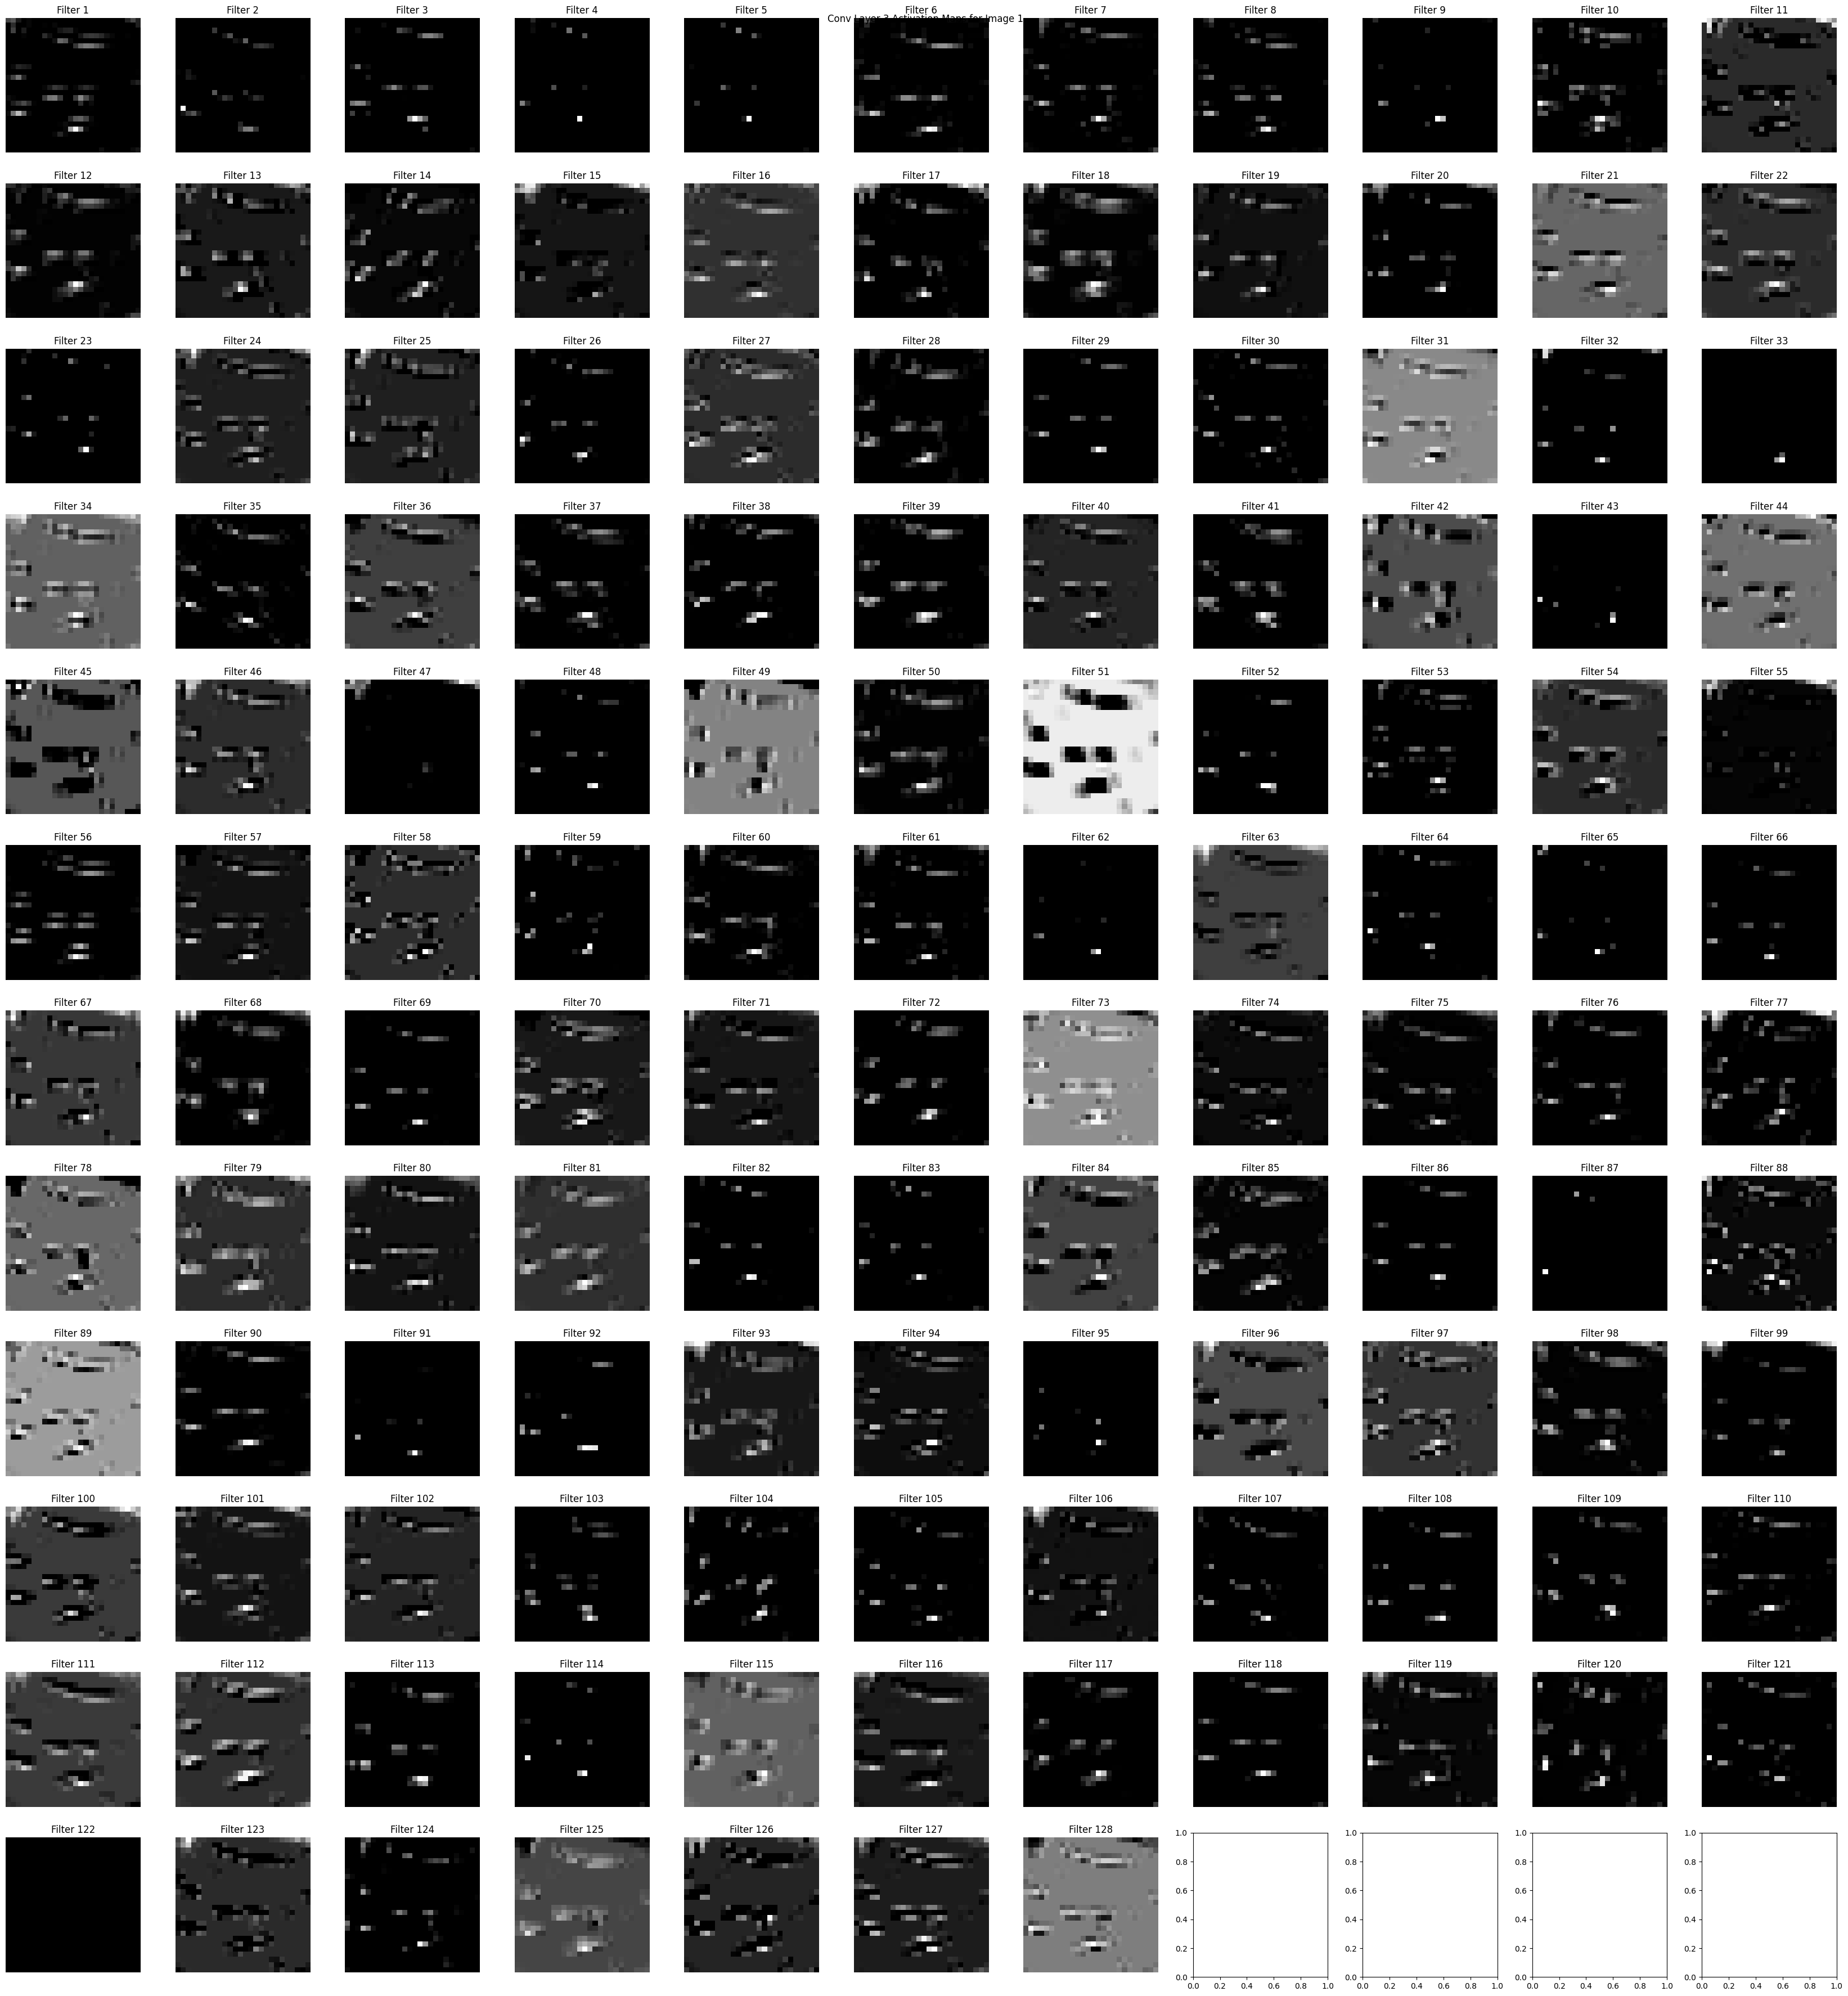

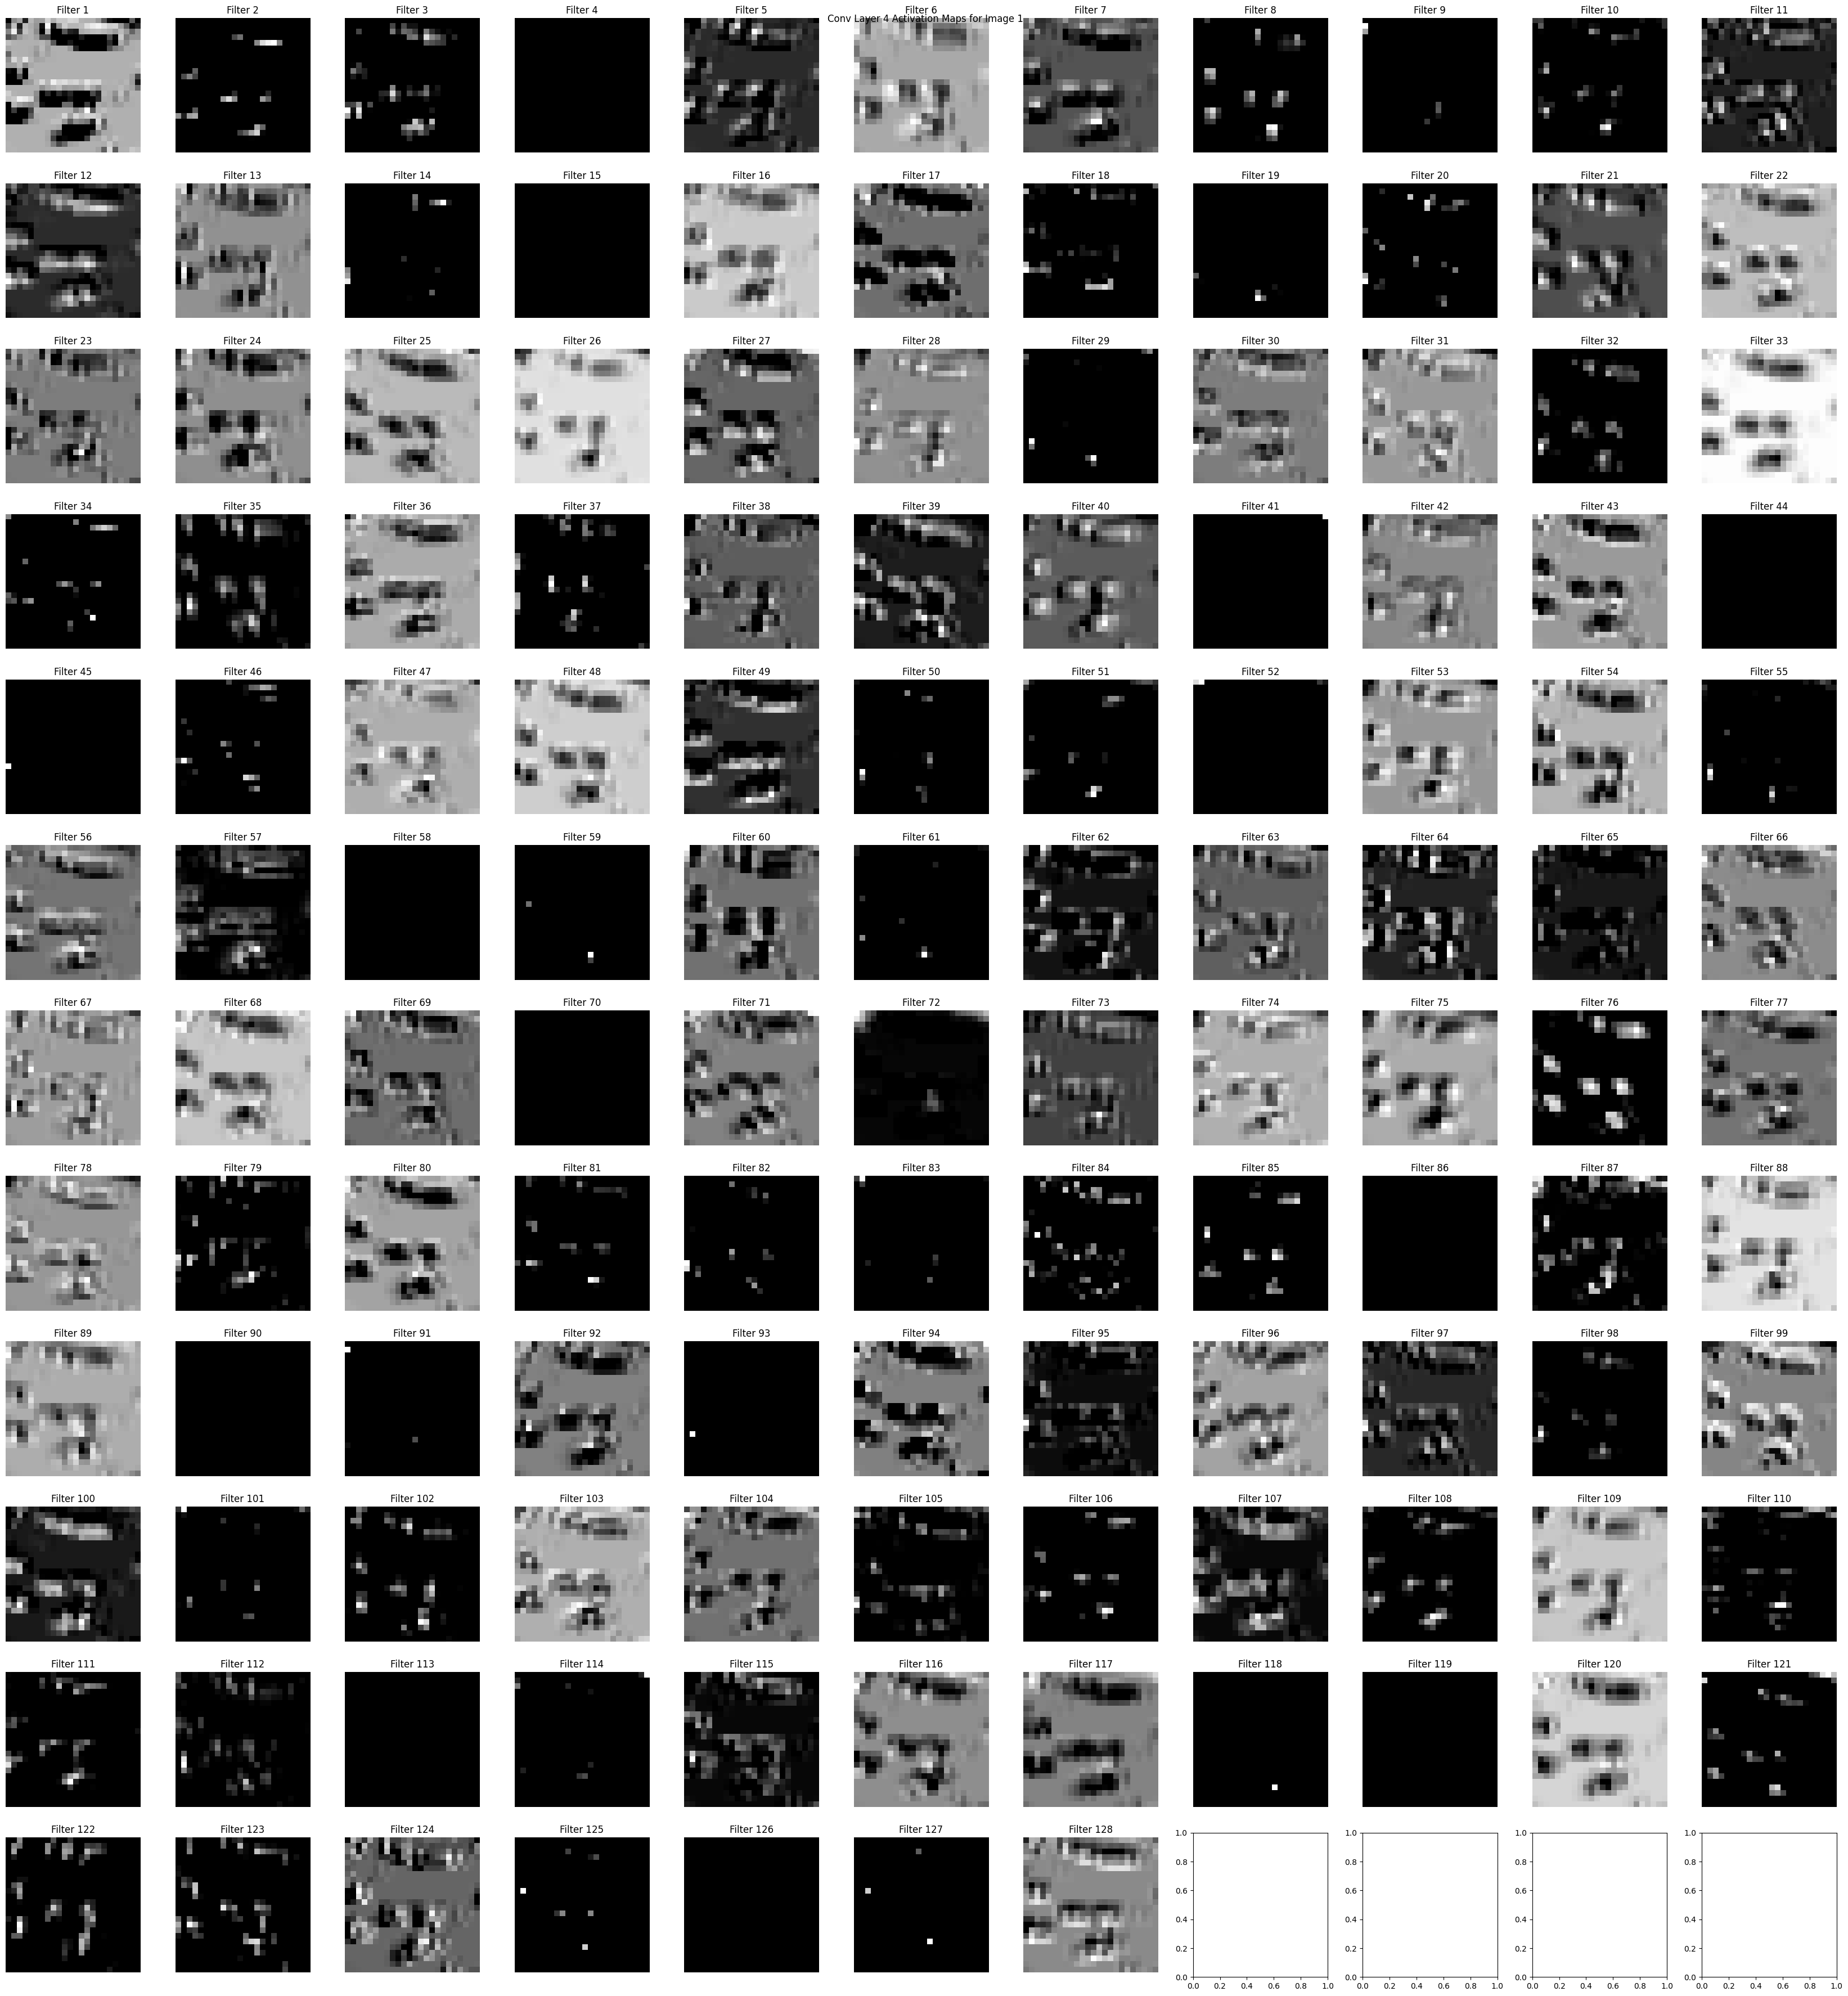

In [16]:
plot_activation_maps(models["model_l1"].model, train_loader, num_images=1, dataset="cifar10")

#### Plot of PCA of Activations

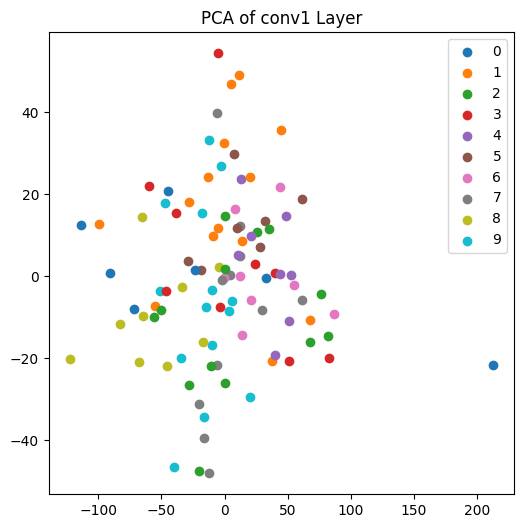

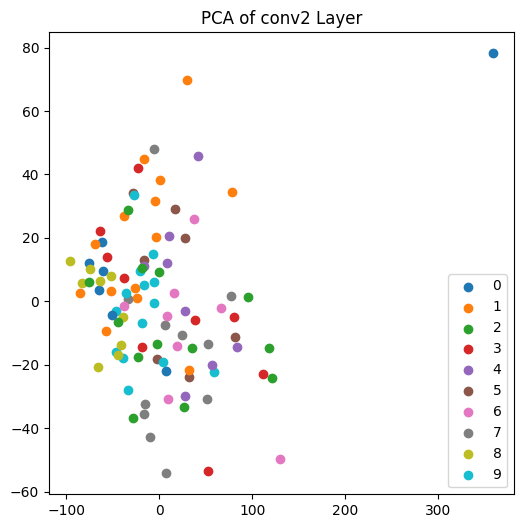

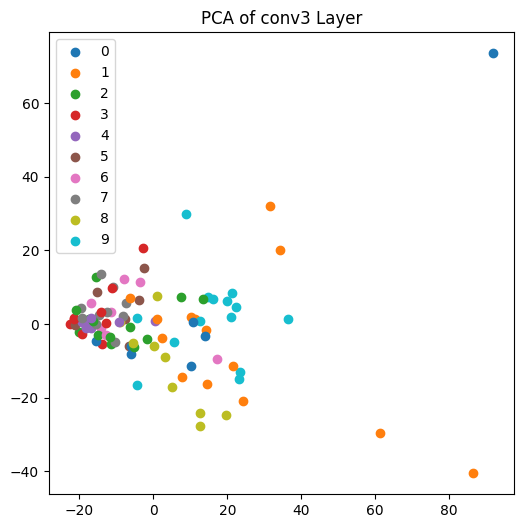

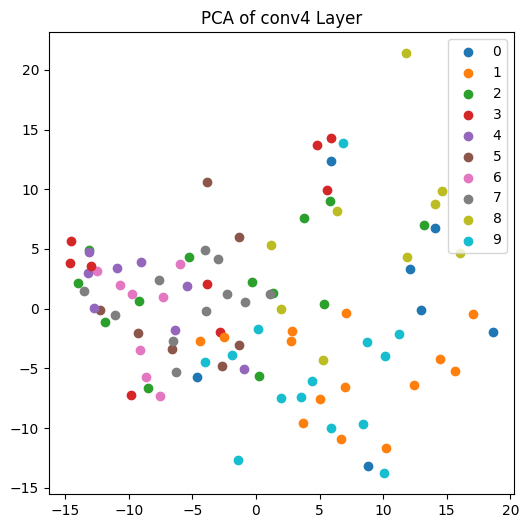

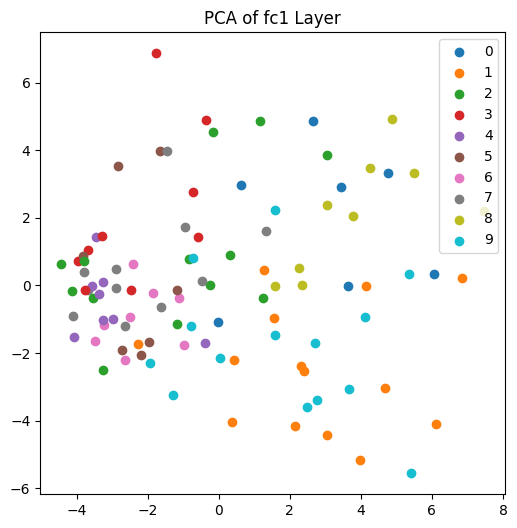

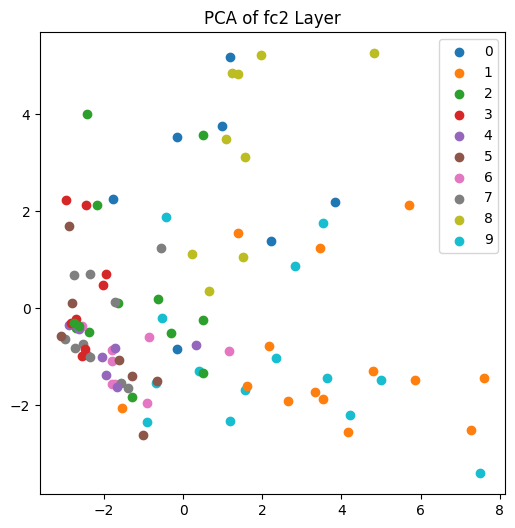

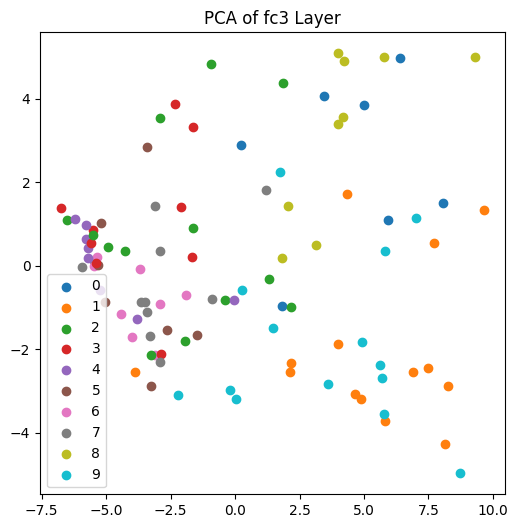

In [19]:
plot_activations_pca(models["model_l1"].model, train_loader, device)

#### Plot of t-SNE of Activations

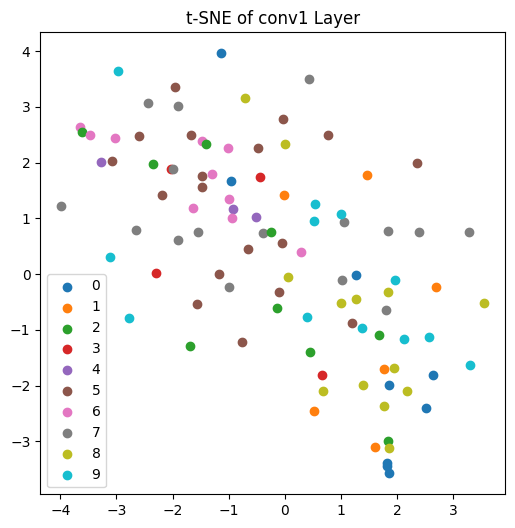

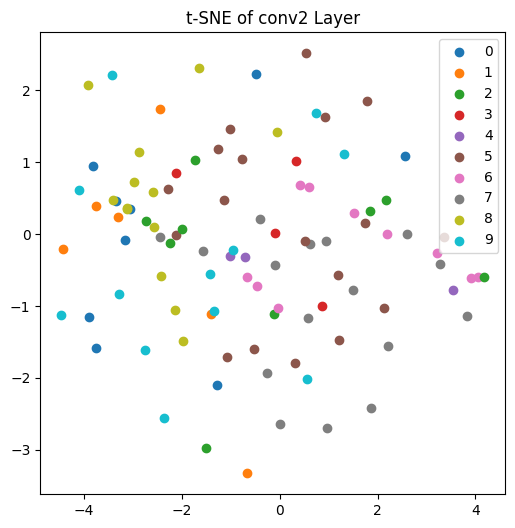

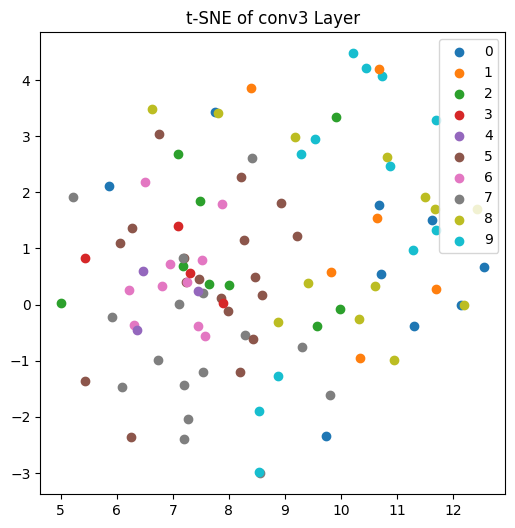

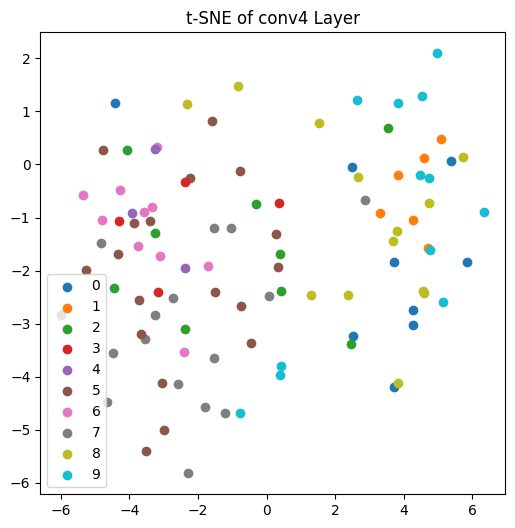

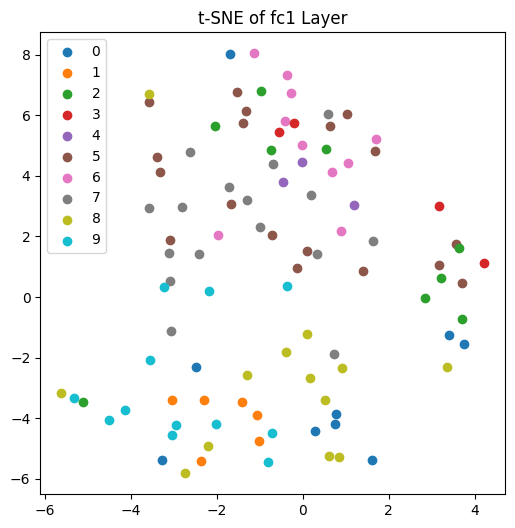

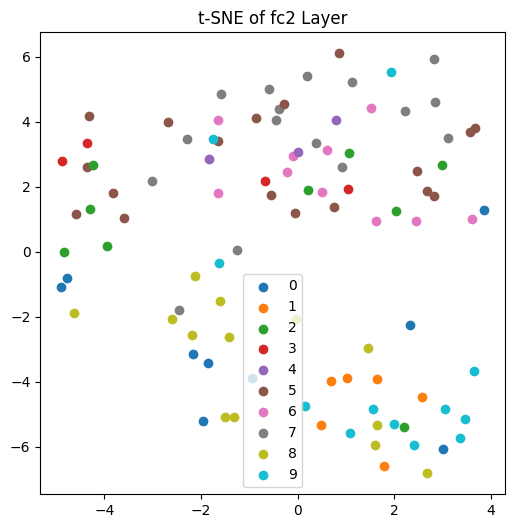

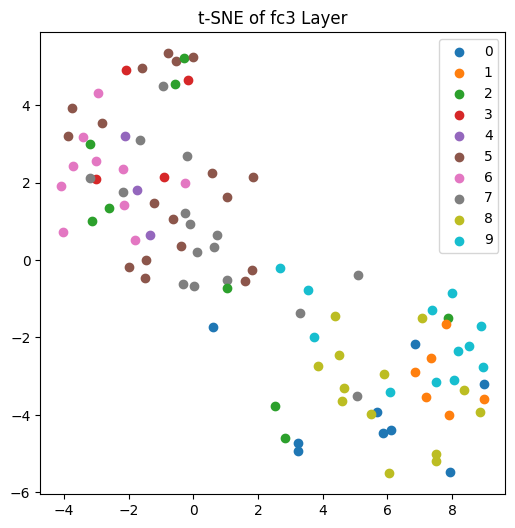

In [20]:
plot_activations_tsne(models["model_l1"].model, train_loader, device)

#### Plots of Saliency Maps

In [21]:
plot_saliency_maps(models["model_l1"].model, train_loader, num_images=9)

#### Plots of Occlusion Sensitivity

In [ ]:
plot_occlusion_sensitivity(
    models["model_l1"].model, train_loader, num_images=3, occluder_size=8, stride=4
)

In [ ]:
plot_occlusion_sensitivity(
    models["model_l1"].model, train_loader, num_images=3, occluder_size=4, stride=2
)

### L2 Regularization

#### Plot of Losses and Accuracies

In [ ]:
plot_reg_results(models, model_name="model_l2", title="L2 regularization")

#### Plot of Weight Distributions

In [ ]:
plot_weight_distributions(
    models["model_l2"].model, title="Weight Distributions with L2 Regularization"
)

#### Plots of Activation Maps

In [ ]:
plot_activation_maps(models["model_l2"].model, train_loader, num_images=1, dataset="cifar10")

#### Plot of PCA of Activations

In [ ]:
plot_activations_pca(models["model_l2"].model, train_loader, device)

#### Plot t-SNE of Activations

In [ ]:
plot_activations_tsne(models["model_l2"].model, train_loader, device)

#### Plots of Saliency Maps

In [ ]:
plot_saliency_maps(models["model_l2"].model, train_loader, num_images=9)

#### Plots of Occlusion Sensitivity

In [ ]:
plot_occlusion_sensitivity(
    models["model_l2"].model, train_loader, num_images=3, occluder_size=8, stride=4
)

In [ ]:
plot_occlusion_sensitivity(
    models["model_l2"].model, train_loader, num_images=3, occluder_size=4, stride=2
)

### Elastic Net Regularization (L1 and L2)

#### Plot of Losses and Accuracies

In [ ]:
plot_reg_results(models, model_name="model_l1_l2", title="L1 and L2 regularization")

#### Plot of Weight Distributions

In [ ]:
plot_weight_distributions(
    models["model_l1_l2"].model,
    title="Weight Distributions with Elastic Net Regularization",
)

#### Plots of Activation Maps

In [ ]:
plot_activation_maps(models["model_l1_l2"].model, train_loader, num_images=1, dataset="cifar10")

#### Plot of PCA of Activations

In [ ]:
plot_activations_pca(models["model_l1_l2"].model, train_loader, device)

#### Plot of t-SNE of Activations

In [ ]:
plot_activations_tsne(models["model_l1_l2"].model, train_loader, device)

#### Plots of Saliency Maps

In [ ]:
plot_saliency_maps(models["model_l1_l2"].model, train_loader, num_images=9)

#### Plots of Occlusion Sensitivity

In [ ]:
plot_occlusion_sensitivity(
    models["model_l1_l2"].model, train_loader, num_images=3, occluder_size=8, stride=4
)

In [ ]:
plot_occlusion_sensitivity(
    models["model_l1_l2"].model, train_loader, num_images=3, occluder_size=4, stride=2
)

### Soft SVB Regularization

#### Plot of Losses and Accuracies

In [ ]:
plot_reg_results(models, model_name="model_soft_svb", title="Soft SVB regularization")

#### Plots of Activation Maps

In [ ]:
plot_activation_maps(models["model_soft_svb"].model, train_loader, num_images=1, dataset="cifar10")

#### Plot of PCA of Activations

In [ ]:
plot_activations_pca(models["model_soft_svb"].model, train_loader, device)

#### Plot of t-SNE of Activations

In [ ]:
plot_activations_tsne(models["model_soft_svb"].model, train_loader, device)

#### Plots of Saliency Maps

In [ ]:
plot_saliency_maps(models["model_soft_svb"].model, train_loader, num_images=9)

#### Plots of Occlusion Sensitivity

In [ ]:
plot_occlusion_sensitivity(
    models["model_soft_svb"].model,
    train_loader,
    num_images=3,
    occluder_size=8,
    stride=4,
)

In [ ]:
plot_occlusion_sensitivity(
    models["model_soft_svb"].model,
    train_loader,
    num_images=3,
    occluder_size=4,
    stride=2,
)

### SVB Regularization

#### Plot of Losses and Accuracies

In [ ]:
plot_reg_results(models, model_name="model_svb", title="SVB regularization")

#### Plots of Activation Maps

In [ ]:
plot_activation_maps(models["model_svb"].model, train_loader, num_images=1, dataset="cifar10")

#### Plot of PCA of Activations

In [ ]:
plot_activations_pca(models["model_svb"].model, train_loader, device)

#### Plot of t-SNE of Activations

In [ ]:
plot_activations_tsne(models["model_svb"].model, train_loader, device)

#### Plots of Saliency Maps

In [ ]:
plot_saliency_maps(models["model_svb"].model, train_loader, num_images=9)

#### Plots of Occlusion Sensitivity

In [ ]:
plot_occlusion_sensitivity(
    models["model_svb"].model, train_loader, num_images=3, occluder_size=8, stride=4
)

In [ ]:
plot_occlusion_sensitivity(
    models["model_svb"].model, train_loader, num_images=3, occluder_size=4, stride=2
)

### Jacobi Regularization

#### Plot of Losses and Accuracies

In [ ]:
plot_reg_results(models, model_name="model_jacobi_reg", title="Jacobi regularization")

#### Plots of Activation Maps

In [ ]:
plot_activation_maps(models["model_jacobi_reg"].model, train_loader, num_images=1, dataset="cifar10")

#### Plot of PCA of Activations

In [ ]:
plot_activations_pca(models["model_jacobi_reg"].model, train_loader, device)

#### Plot of t-SNE of Activations

In [ ]:
plot_activations_tsne(models["model_jacobi_reg"].model, train_loader, device)

#### Plots of Saliency Maps

In [ ]:
plot_saliency_maps(models["model_jacobi_reg"].model, train_loader, num_images=9)

#### Plots of Occlusion Sensitivity

In [ ]:
plot_occlusion_sensitivity(
    models["model_jacobi_reg"].model,
    train_loader,
    num_images=3,
    occluder_size=8,
    stride=4,
)

In [ ]:
plot_occlusion_sensitivity(
    models["model_jacobi_reg"].model,
    train_loader,
    num_images=3,
    occluder_size=4,
    stride=2,
)

### Jacobi Determinant Regularization

#### Plot of Losses and Accuracies

In [ ]:
plot_reg_results(
    models, model_name="model_jacobi_det_reg", title="Jacobi Determinant Regularization"
)

#### Plots of Activation Maps

In [ ]:
plot_activation_maps(models["model_jacobi_det_reg"].model, train_loader, num_images=1, dataset="cifar10")

#### Plot of PCA of Activations

In [ ]:
plot_activations_pca(models["model_jacobi_det_reg"].model, train_loader, device)

#### Plot of t-SNE of Activations

In [ ]:
plot_activations_tsne(models["model_jacobi_det_reg"].model, train_loader, device)

#### Plots of Saliency Maps

In [ ]:
plot_saliency_maps(models["model_jacobi_det_reg"].model, train_loader, num_images=9)

#### Plots of Occlusion Sensitivity

In [ ]:
plot_occlusion_sensitivity(
    models["model_jacobi_det_reg"].model,
    train_loader,
    num_images=3,
    occluder_size=8,
    stride=4,
)

In [ ]:
plot_occlusion_sensitivity(
    models["model_jacobi_det_reg"].model,
    train_loader,
    num_images=3,
    occluder_size=4,
    stride=2,
)

### Dropout Regularization

#### Plot of Losses and Accuracies

In [ ]:
plot_results(models, model_name="model_dropout", title="Dropout Regularization")

#### Plots of Activation Maps

In [ ]:
plot_activation_maps(models["model_dropout"].model, train_loader, num_images=1, dataset="cifar10")

#### Plot of PCA of Activations

In [ ]:
plot_activations_pca(models["model_dropout"].model, train_loader, device)

#### Plot of t-SNE of Activations

In [ ]:
plot_activations_tsne(models["model_dropout"].model, train_loader, device)

#### Plots of Saliency Maps

In [ ]:
plot_saliency_maps(models["model_dropout"].model, train_loader, num_images=9)

#### Plots of Occlusion Sensitivity

In [ ]:
plot_occlusion_sensitivity(
    models["model_dropout"].model, train_loader, num_images=3, occluder_size=8, stride=4
)

In [ ]:
plot_occlusion_sensitivity(
    models["model_dropout"].model, train_loader, num_images=3, occluder_size=4, stride=2
)

### Confidence Penalty Regularization

#### Plot of Losses and Accuracies

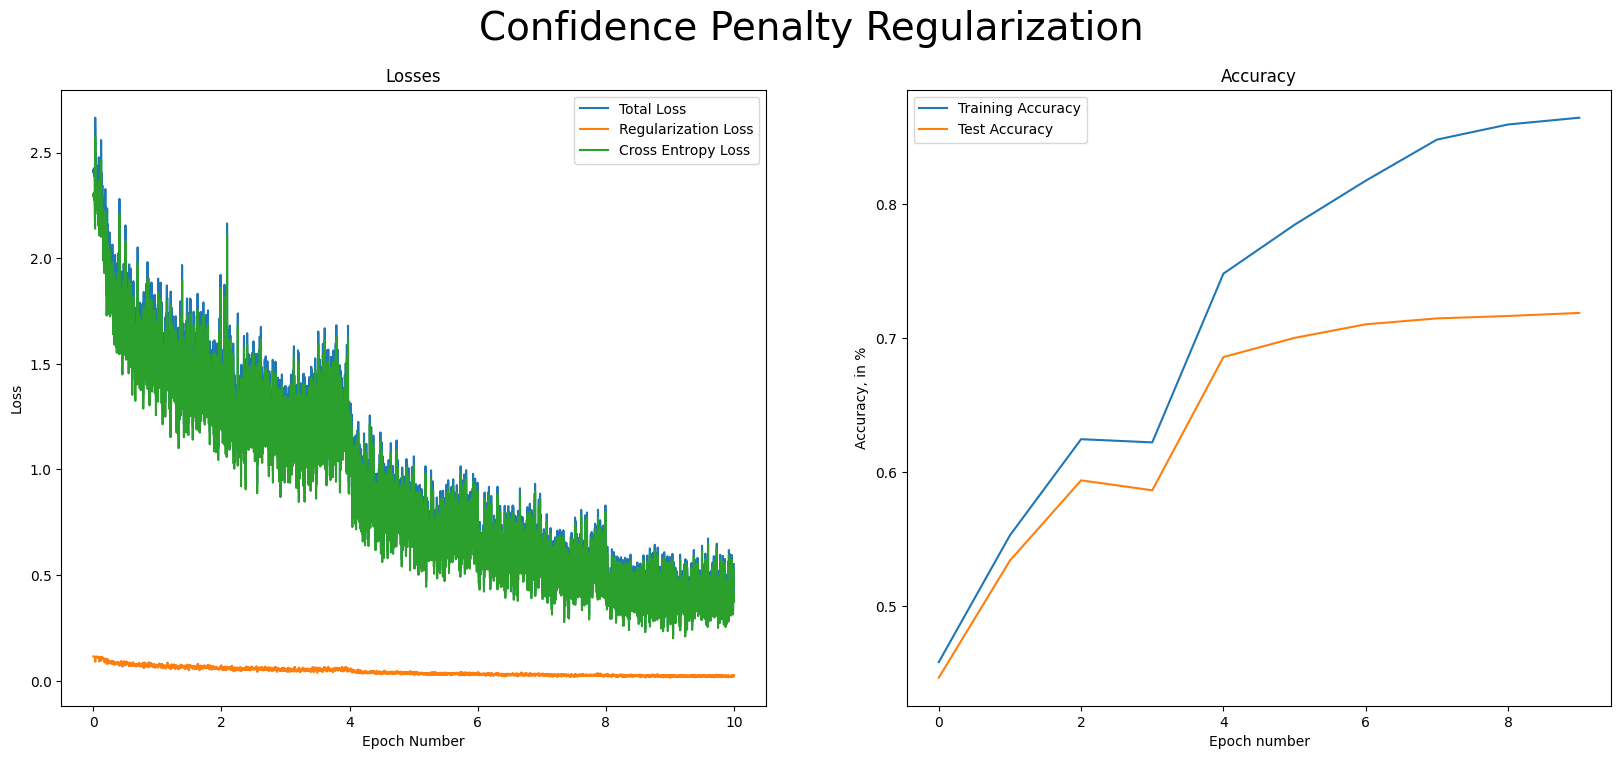

In [5]:
plot_reg_results(
    models, model_name="model_conf_penalty", title="Confidence Penalty Regularization"
)

#### Plots of Activation Maps

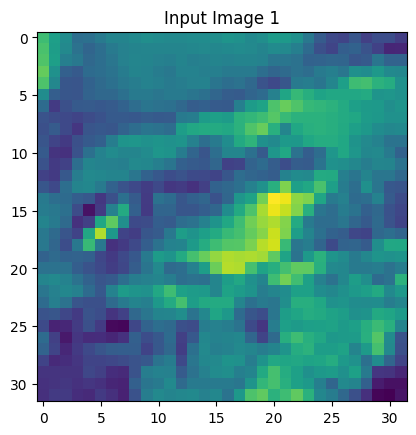

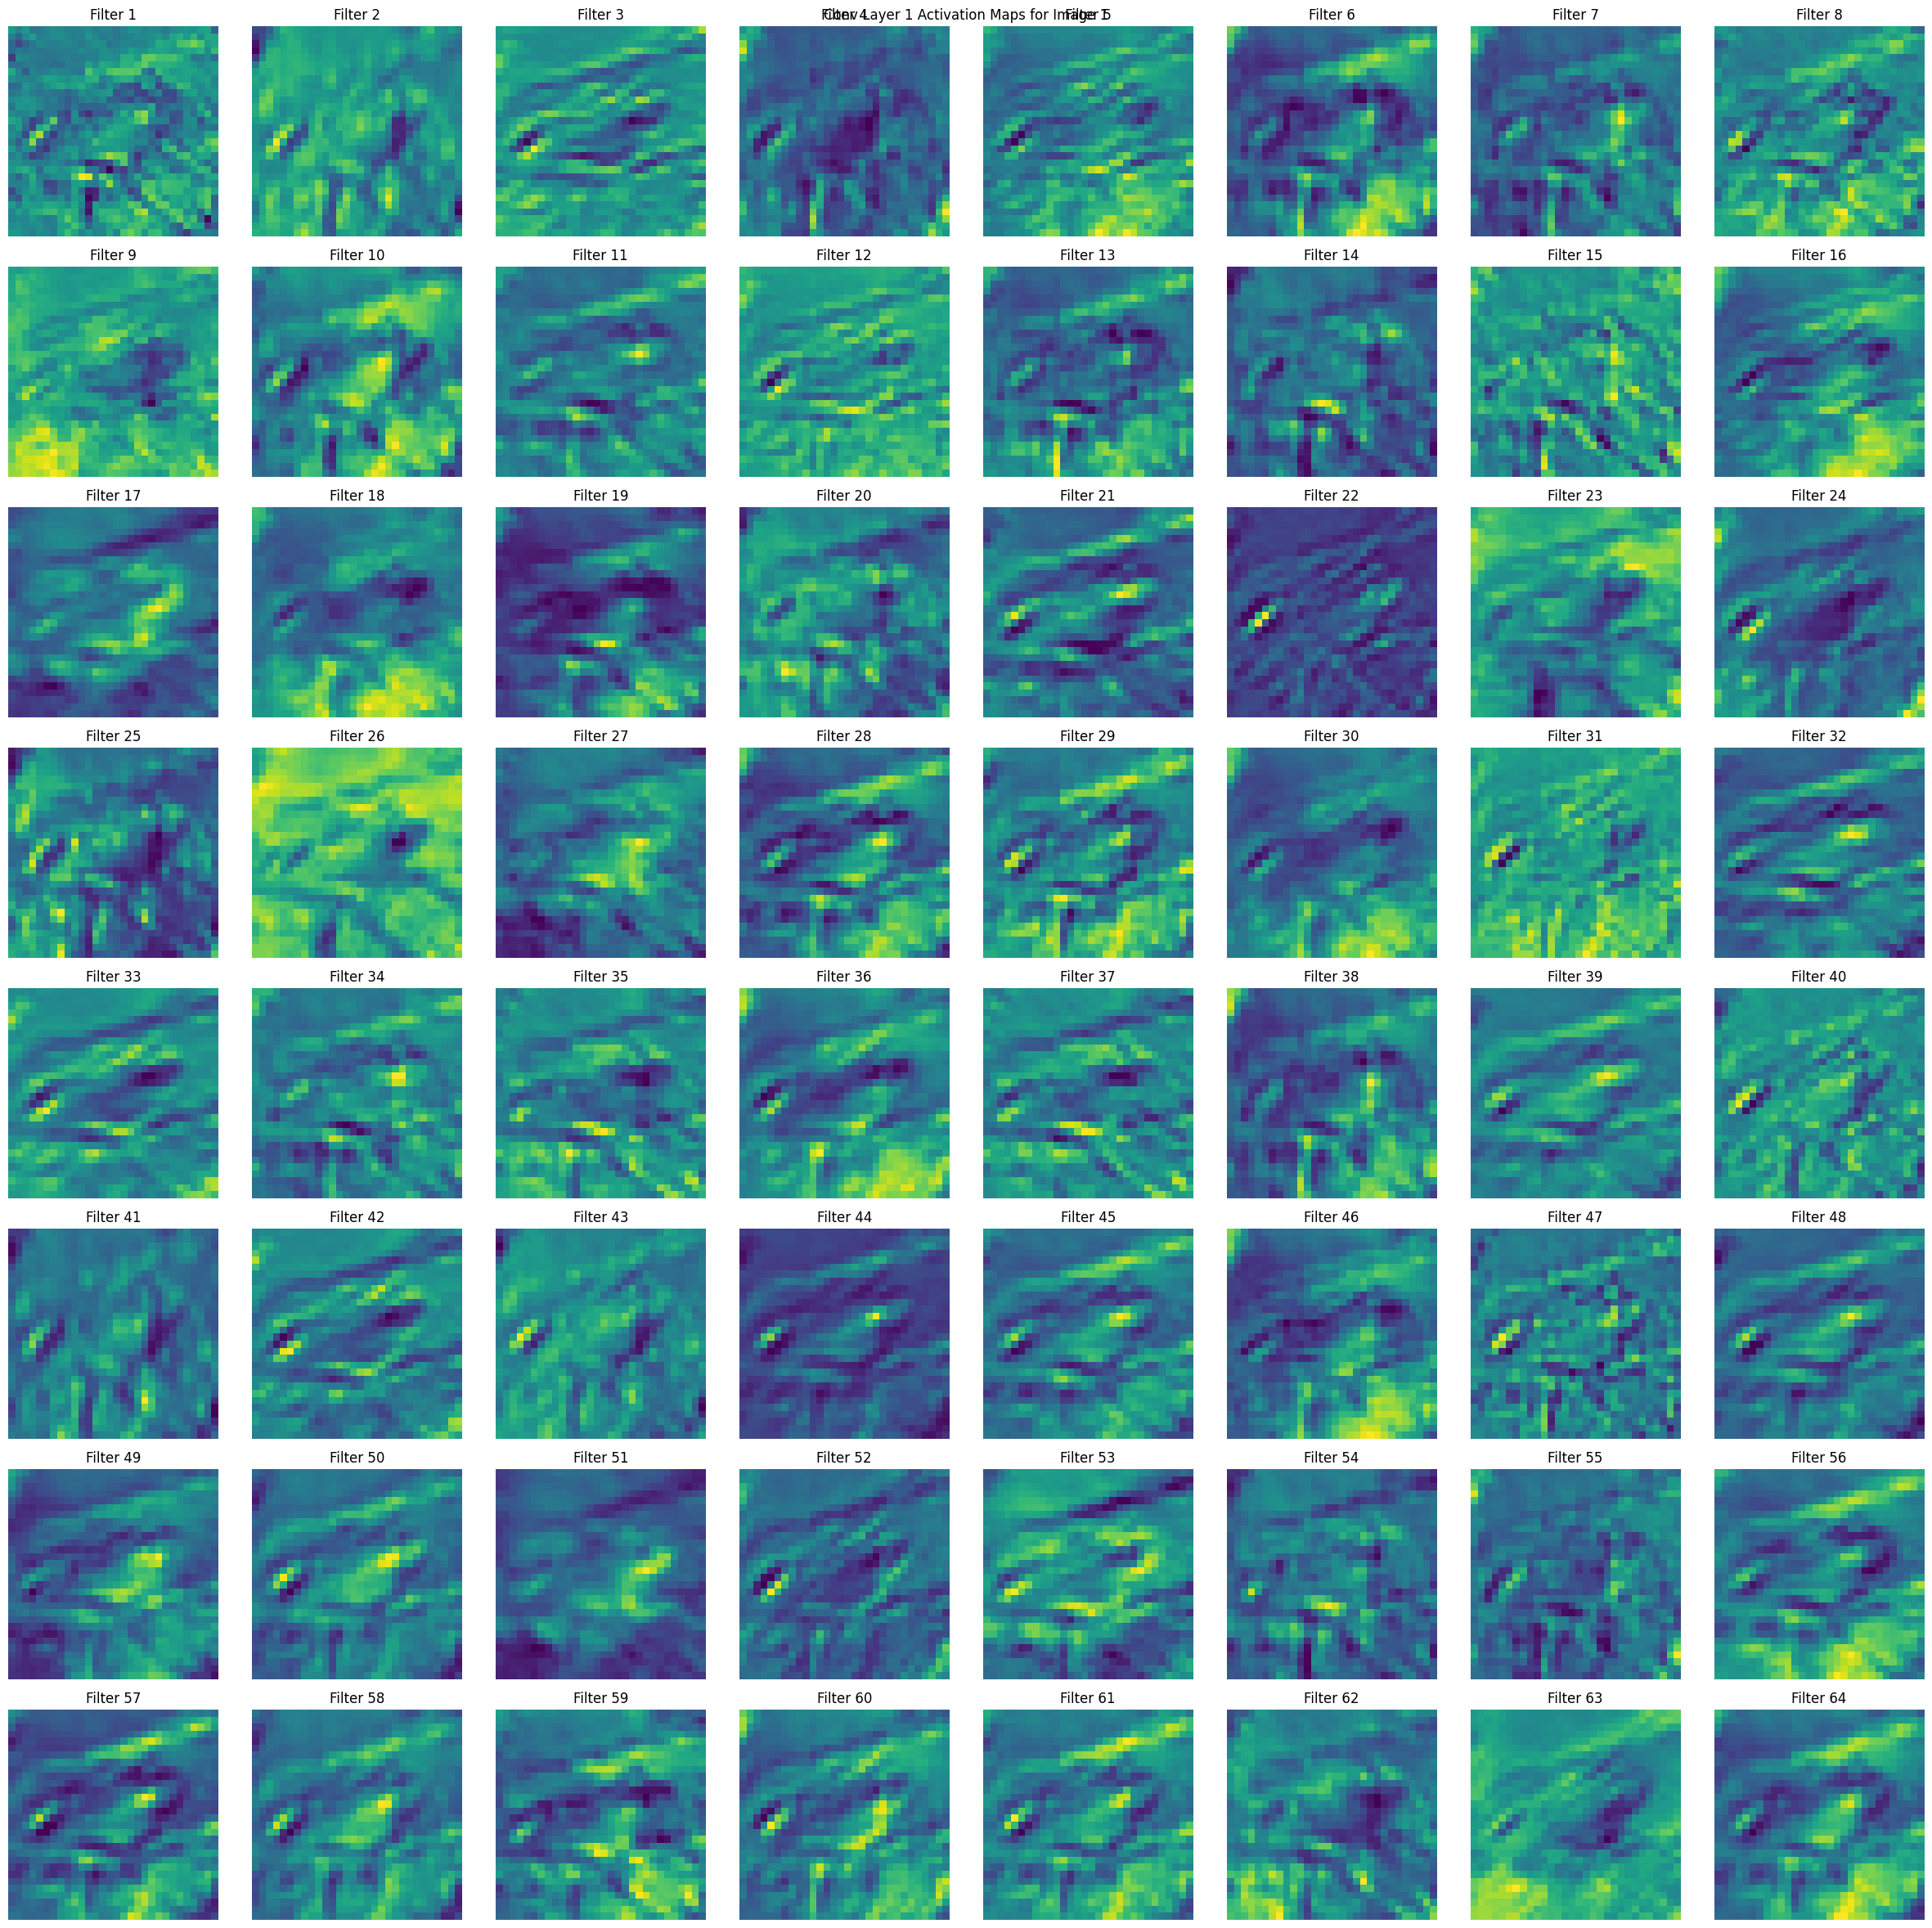

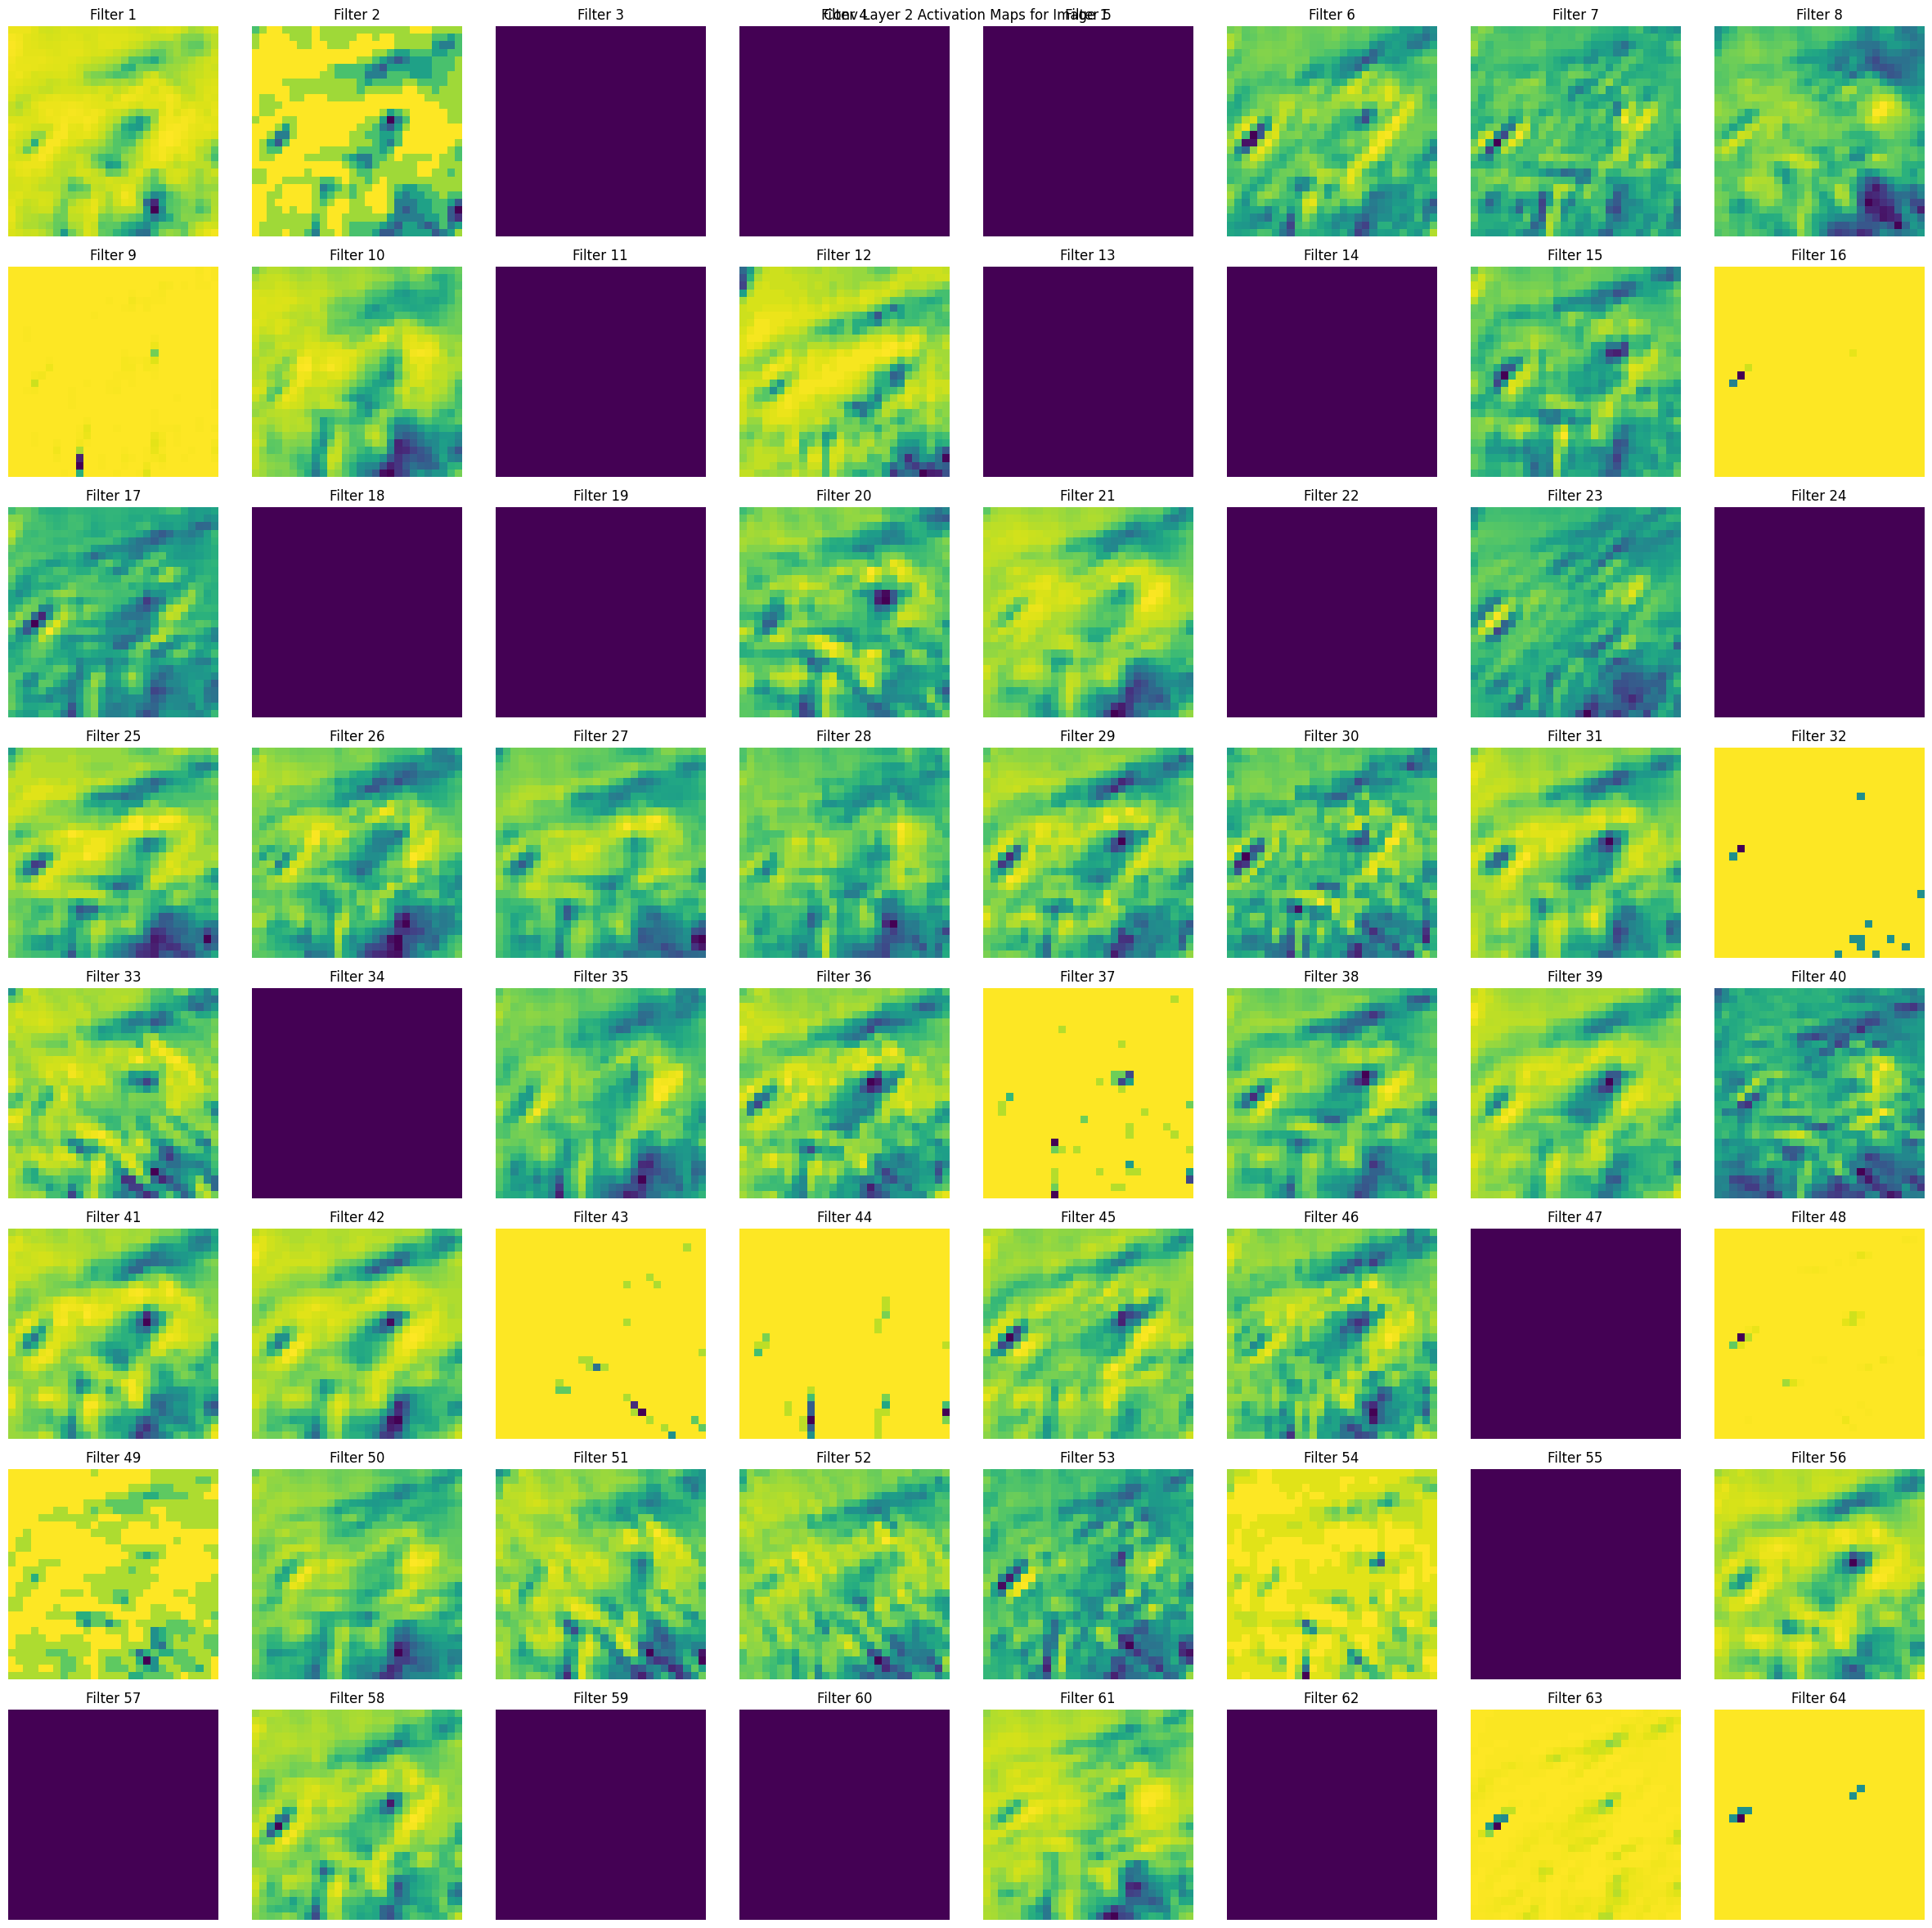

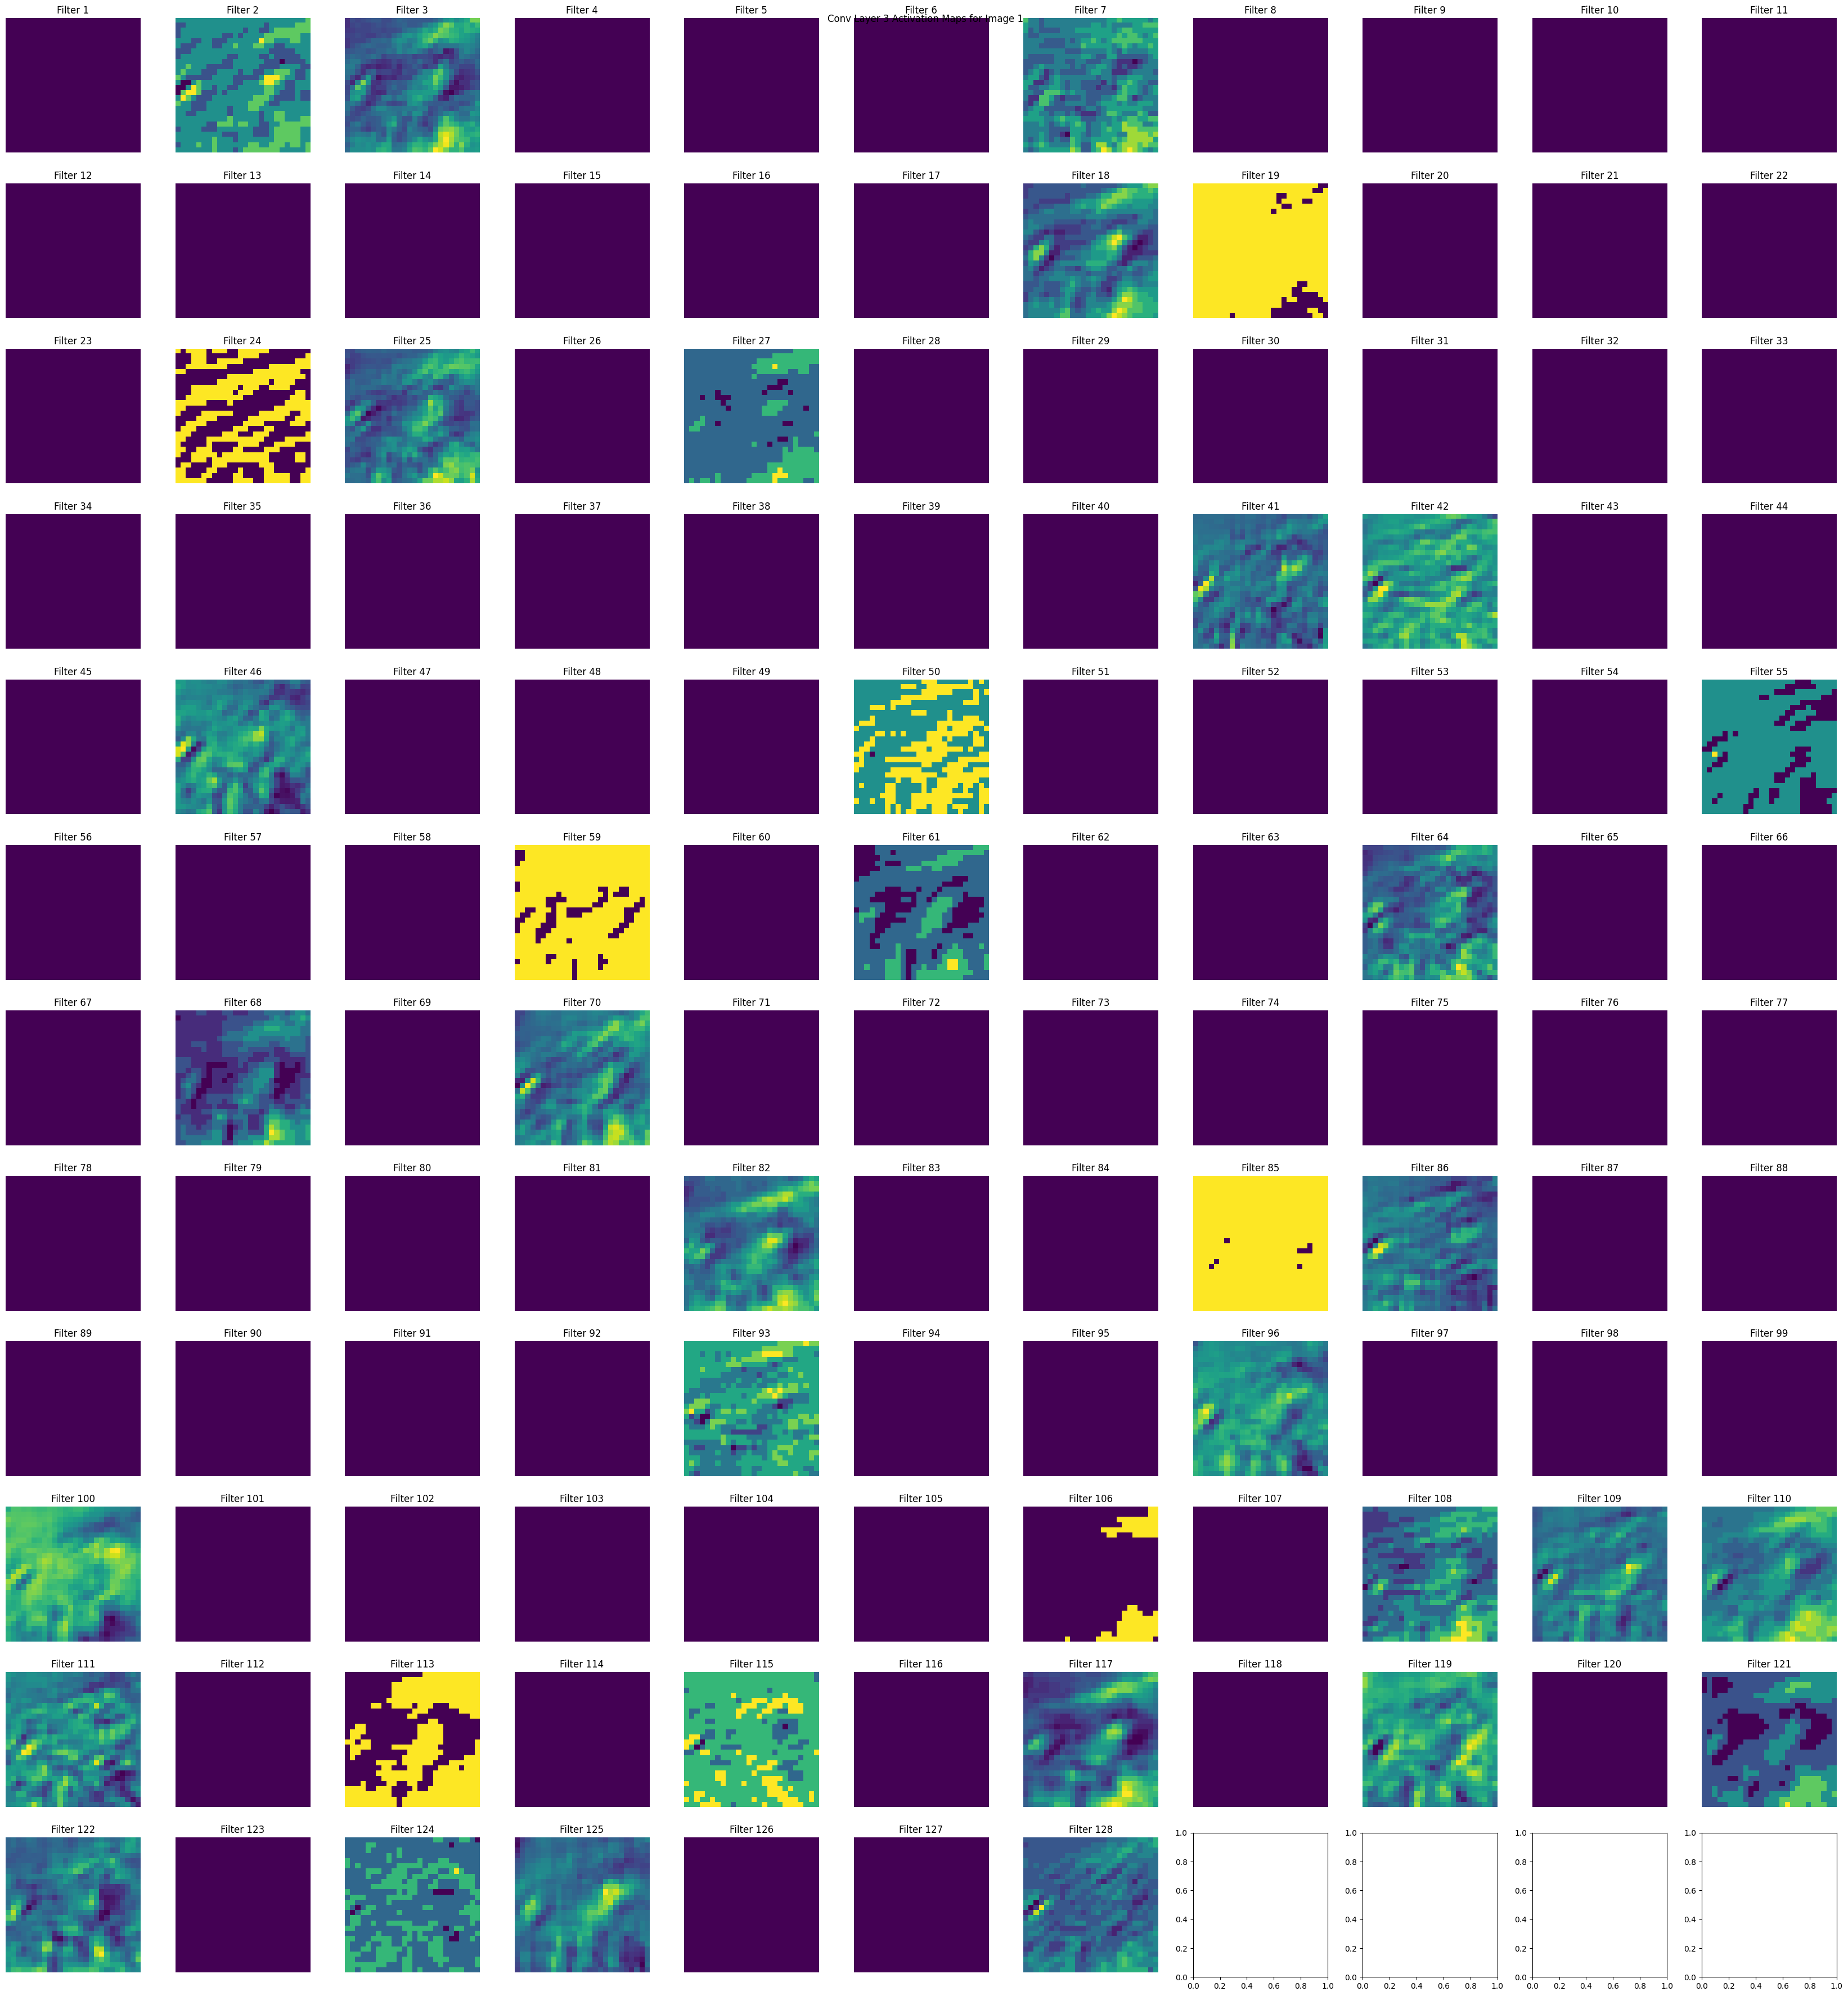

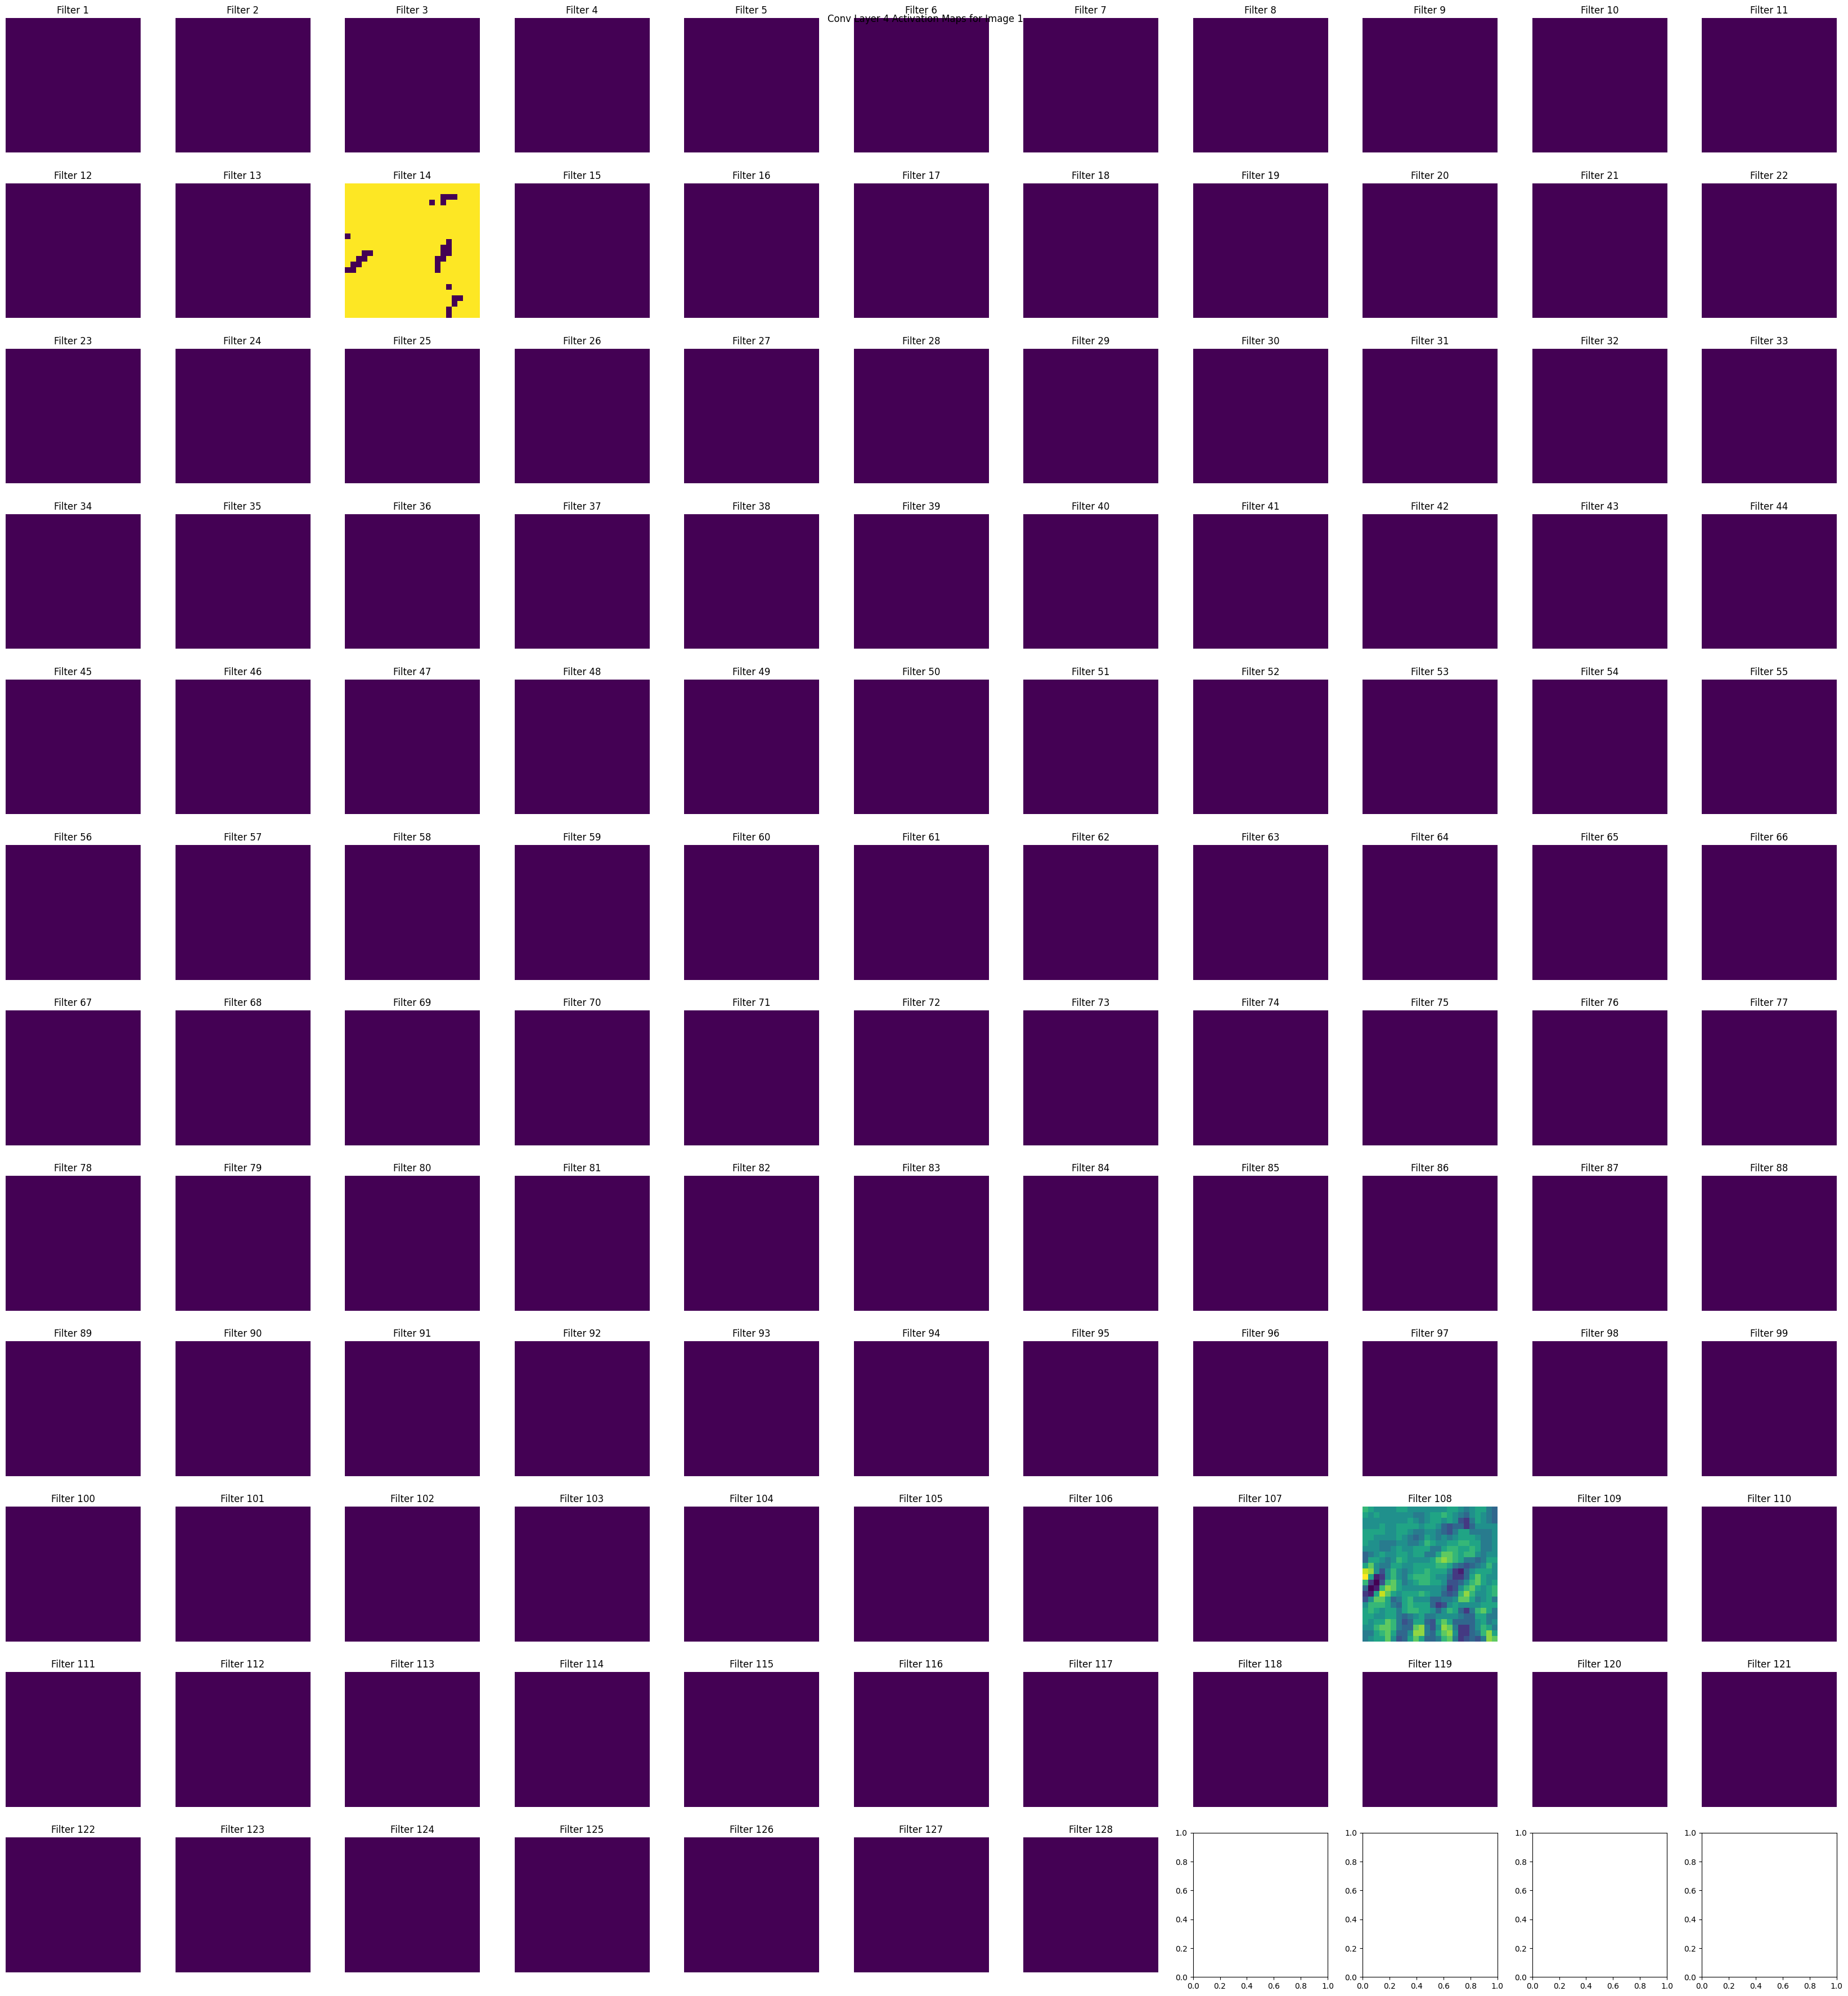

In [6]:
plot_activation_maps(models["model_conf_penalty"].model, train_loader, num_images=1, dataset="cifar10")

#### Plot of Predicted Scores

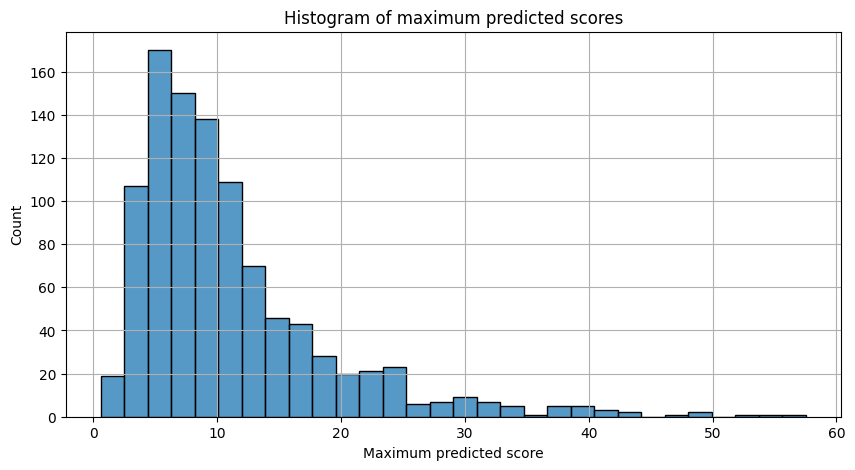

In [7]:
plot_max_predicted_scores(
    models["model_conf_penalty"].model, train_loader, num_batches=10
)

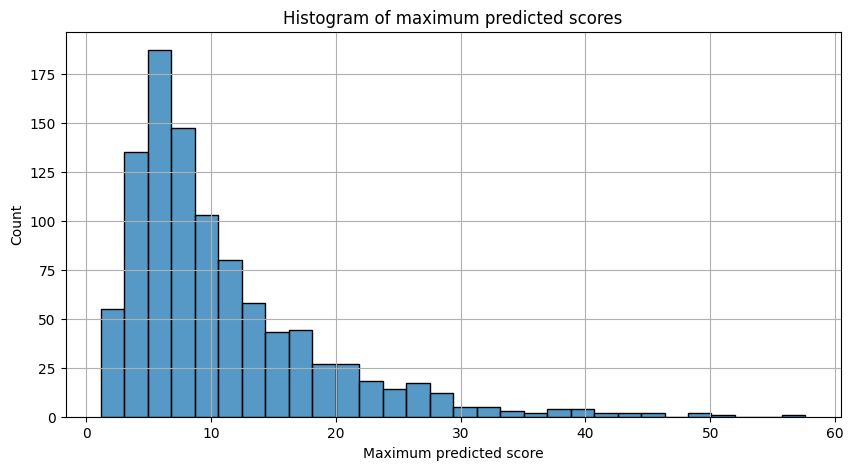

In [8]:
plot_max_predicted_scores(
    models["model_conf_penalty"].model, test_loader, num_batches=10
)

#### Plot of PCA of Activations

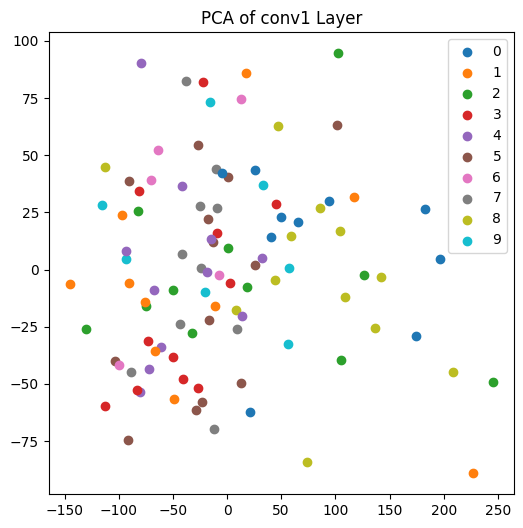

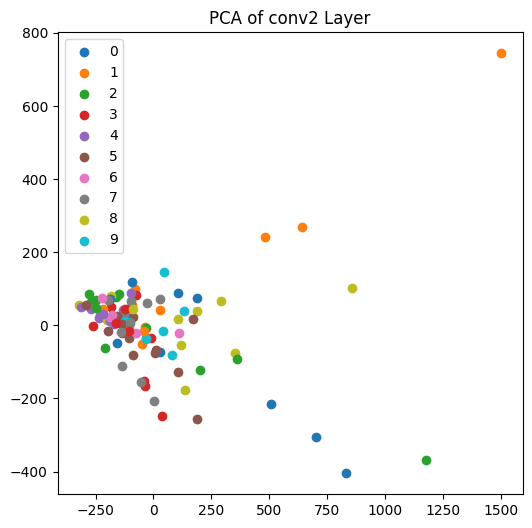

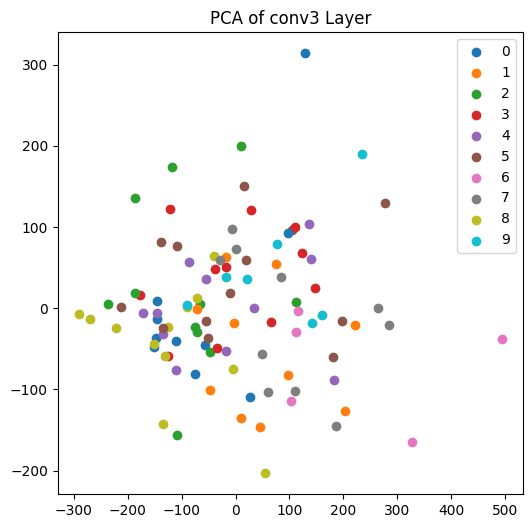

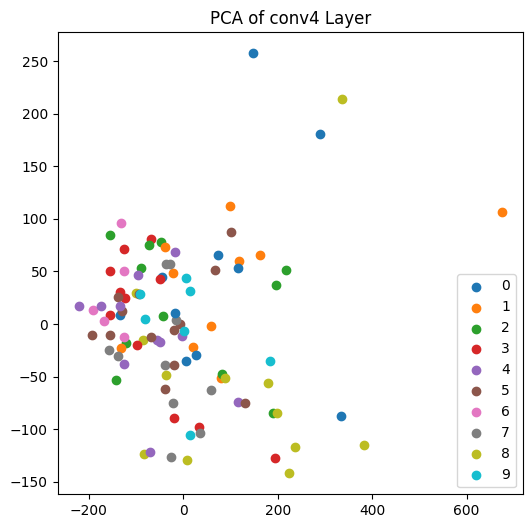

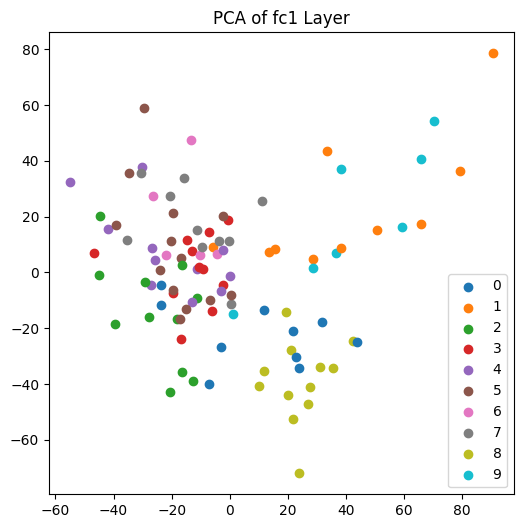

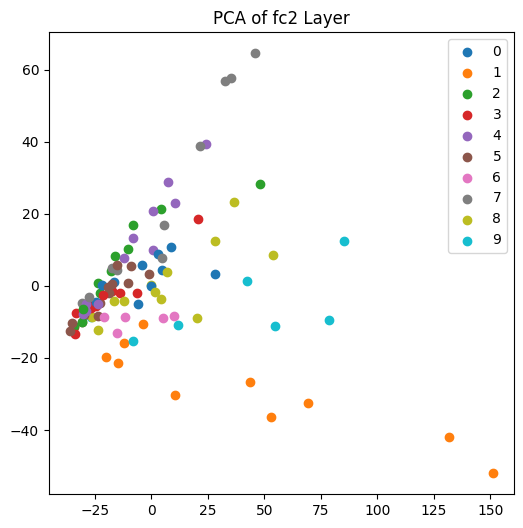

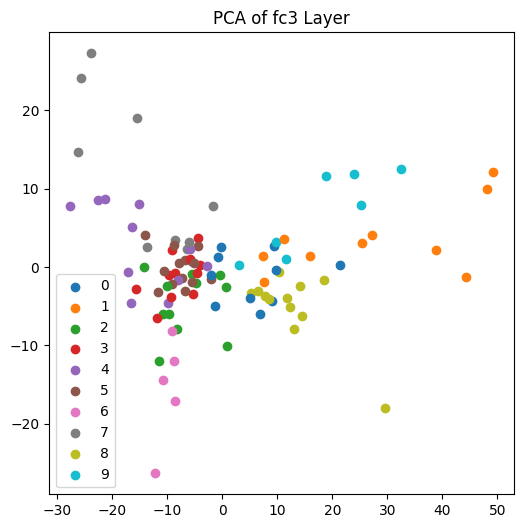

In [9]:
plot_activations_pca(models["model_conf_penalty"].model, train_loader, device)

#### Plot of t-SNE of Activations

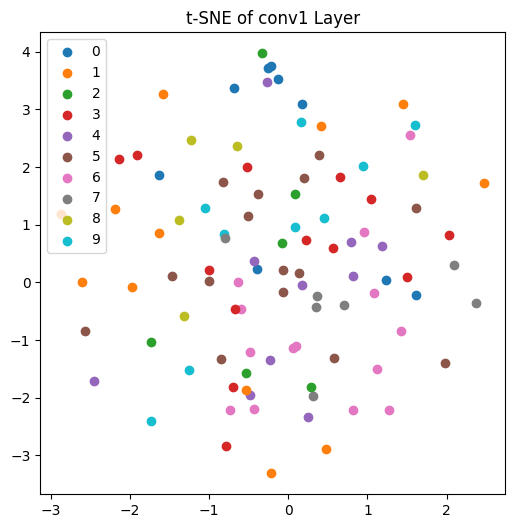

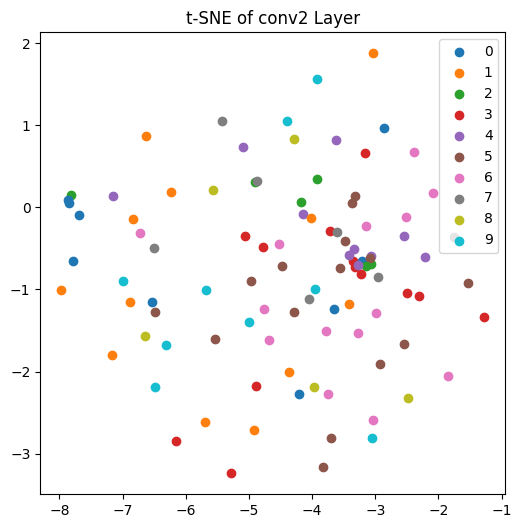

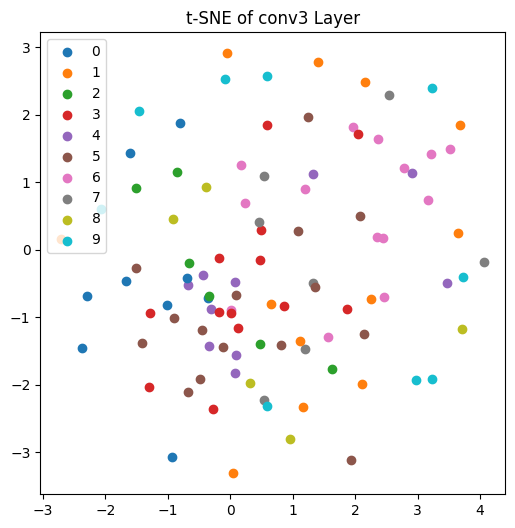

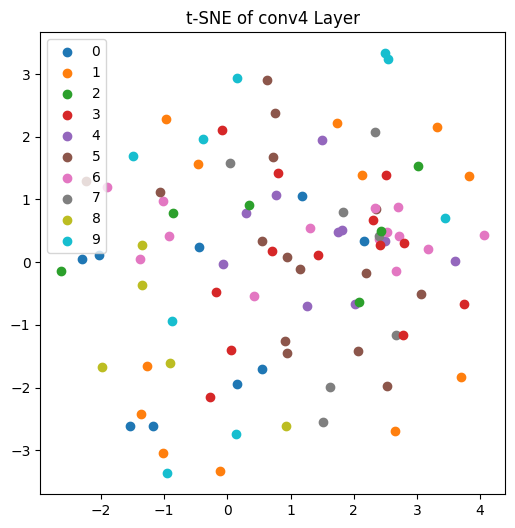

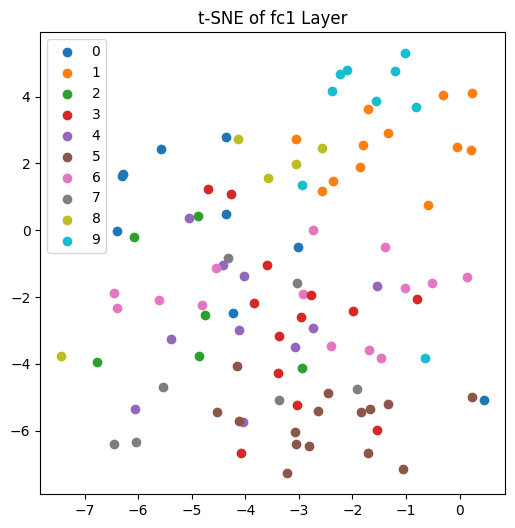

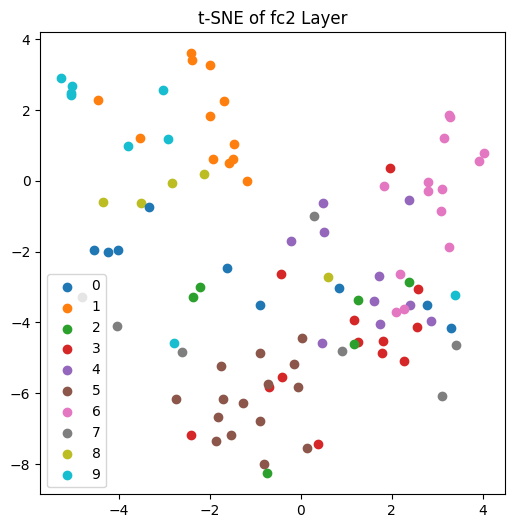

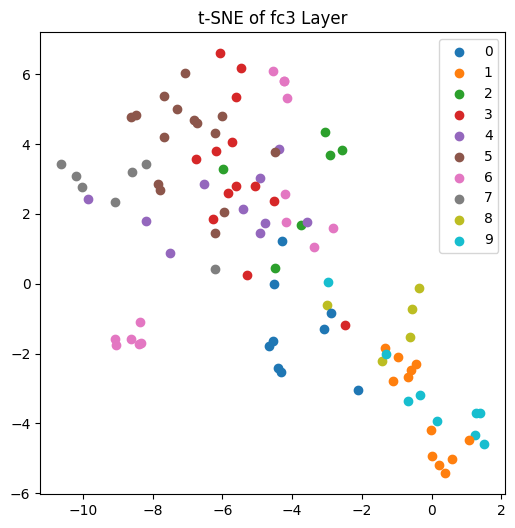

In [10]:
plot_activations_tsne(models["model_conf_penalty"].model, train_loader, device)

#### Plots of Saliency Maps

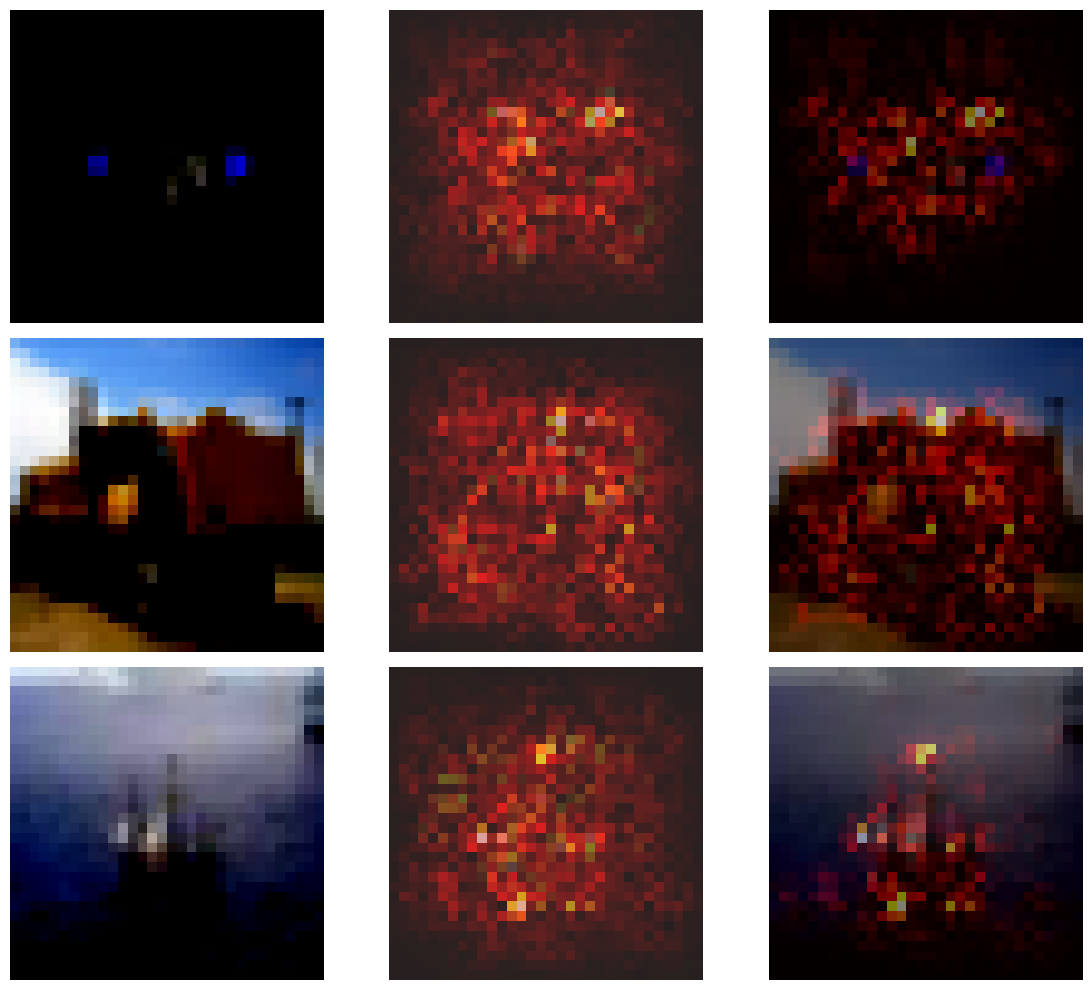

In [11]:
plot_saliency_maps(models["model_conf_penalty"].model, train_loader, num_images=9)

#### Plots of Occlusion Sensitivity

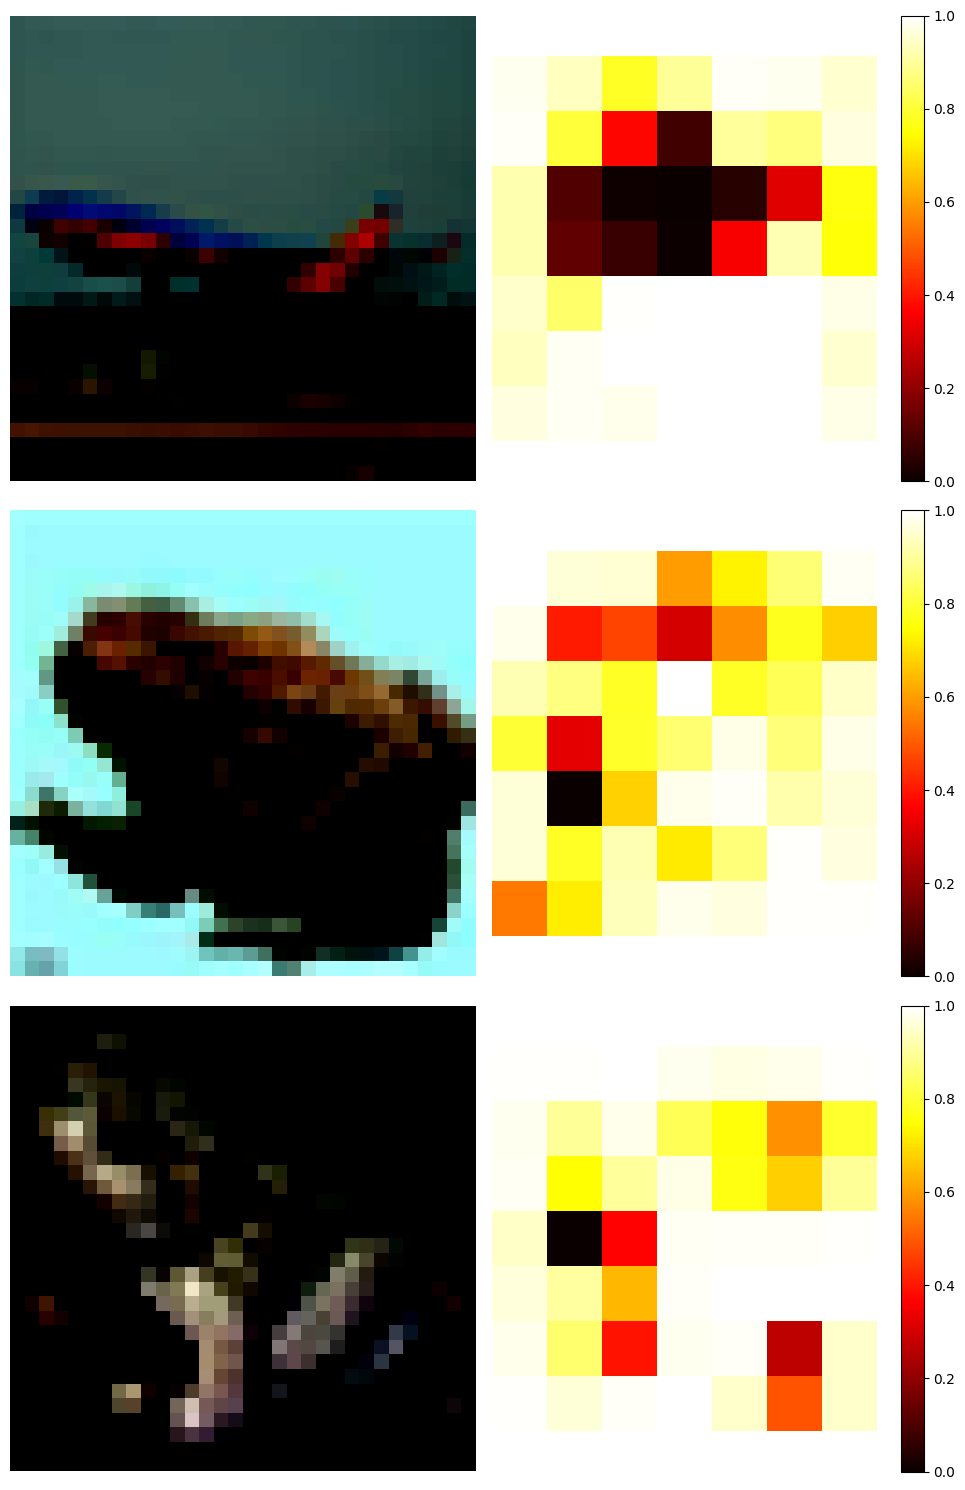

In [12]:
plot_occlusion_sensitivity(
    models["model_conf_penalty"].model,
    train_loader,
    num_images=3,
    occluder_size=8,
    stride=4,
)

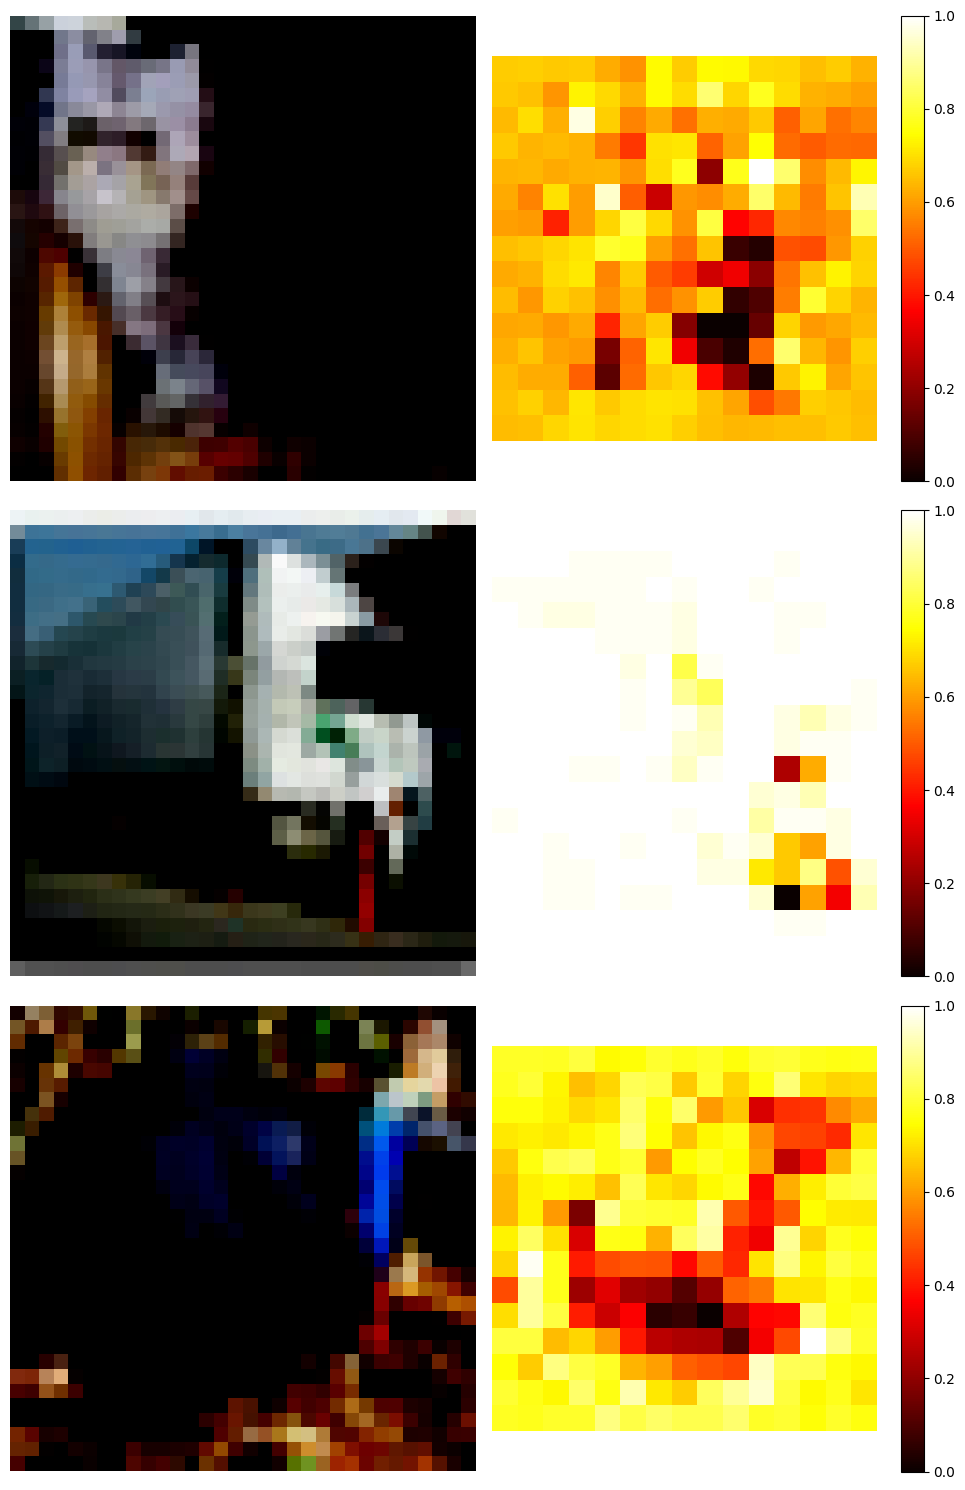

In [13]:
plot_occlusion_sensitivity(
    models["model_conf_penalty"].model,
    train_loader,
    num_images=3,
    occluder_size=4,
    stride=2,
)

### Label Smoothing Regularization

#### Plot of Losses and Accuracies

In [ ]:
plot_results(
    models, model_name="model_label_smoothing", title="Label Smoothing Regularization"
)

#### Plots of Activation Maps

In [ ]:
plot_activation_maps(models["model_label_smoothing"].model, train_loader, num_images=1, dataset="cifar10")

#### Plot of Predicted Scores

In [1]:
plot_max_predicted_scores(
    models["model_label_smoothing"].model, train_loader, num_batches=10
)

NameError: name 'plot_max_predicted_scores' is not defined

In [ ]:
plot_max_predicted_scores(
    models["model_label_smoothing"].model, test_loader, num_batches=10
)

#### Plot of PCA of Activations

In [ ]:
plot_activations_pca(models["model_label_smoothing"].model, train_loader, device)

#### Plot of t-SNE of Activations

In [ ]:
plot_activations_tsne(models["model_label_smoothing"].model, train_loader, device)

#### Plots of Saliency Maps

In [ ]:
plot_saliency_maps(models["model_label_smoothing"].model, train_loader, num_images=9)

#### Plots of Occlusion Sensitivity

In [ ]:
plot_occlusion_sensitivity(
    models["model_label_smoothing"].model,
    train_loader,
    num_images=3,
    occluder_size=8,
    stride=4,
)

In [ ]:
plot_occlusion_sensitivity(
    models["model_label_smoothing"].model,
    train_loader,
    num_images=3,
    occluder_size=4,
    stride=2,
)

### Noise Injection to Inputs

#### Plot of Losses and Accuracies

In [ ]:
plot_results(
    models, model_name="model_noise_inject_inputs", title="Noise Injection to Inputs"
)

#### Plot of Weight Distributions

In [ ]:
plot_weight_distributions(
    models["model_noise_inject_inputs"].model,
    title="Weight Distributions with Noise Injection (to inputs) Regularization",
)

#### Plots of Activation Maps

In [ ]:
plot_activation_maps(
    models["model_noise_inject_inputs"].model, train_loader, num_images=1, dataset="cifar10"
)

#### Plot of PCA of Activations

In [ ]:
plot_activations_pca(models["model_noise_inject_inputs"].model, train_loader, device)

#### Plot of t-SNE of Activations

In [ ]:
plot_activations_tsne(models["model_noise_inject_inputs"].model, train_loader, device)

#### Plots of Saliency Maps

In [ ]:
plot_saliency_maps(
    models["model_noise_inject_inputs"].model, train_loader, num_images=9
)

#### Plots of Occlusion Sensitivity

In [ ]:
plot_occlusion_sensitivity(
    models["model_noise_inject_inputs"].model,
    train_loader,
    num_images=3,
    occluder_size=8,
    stride=4,
)

In [ ]:
plot_occlusion_sensitivity(
    models["model_noise_inject_inputs"].model,
    train_loader,
    num_images=3,
    occluder_size=4,
    stride=2,
)

### Noise Injection to Weights of First Convolutional Layer

#### Plot of Losses and Accuracies

In [ ]:
plot_results(
    models,
    model_name="model_noise_inject_weights",
    title="Noise Injection to Weights of First Conv. Layer)",
)

#### Plots of Activation Maps

In [ ]:
plot_activation_maps(
    models["model_noise_inject_weights"].model, train_loader, num_images=1, dataset="cifar10"
)

#### Plot of PCA of Activations

In [ ]:
plot_activations_pca(models["model_noise_inject_weights"].model, train_loader, device)

#### Plot of t-SNE of Activations

In [ ]:
plot_activations_tsne(models["model_noise_inject_weights"].model, train_loader, device)

#### Plots of Saliency Maps

In [ ]:
plot_saliency_maps(
    models["model_noise_inject_weights"].model, train_loader, num_images=9
)

#### Plots of Occlusion Sensitivity

In [ ]:
plot_occlusion_sensitivity(
    models["model_noise_inject_weights"].model,
    train_loader,
    num_images=3,
    occluder_size=8,
    stride=4,
)

In [ ]:
plot_occlusion_sensitivity(
    models["model_noise_inject_weights"].model,
    train_loader,
    num_images=3,
    occluder_size=4,
    stride=2,
)

###